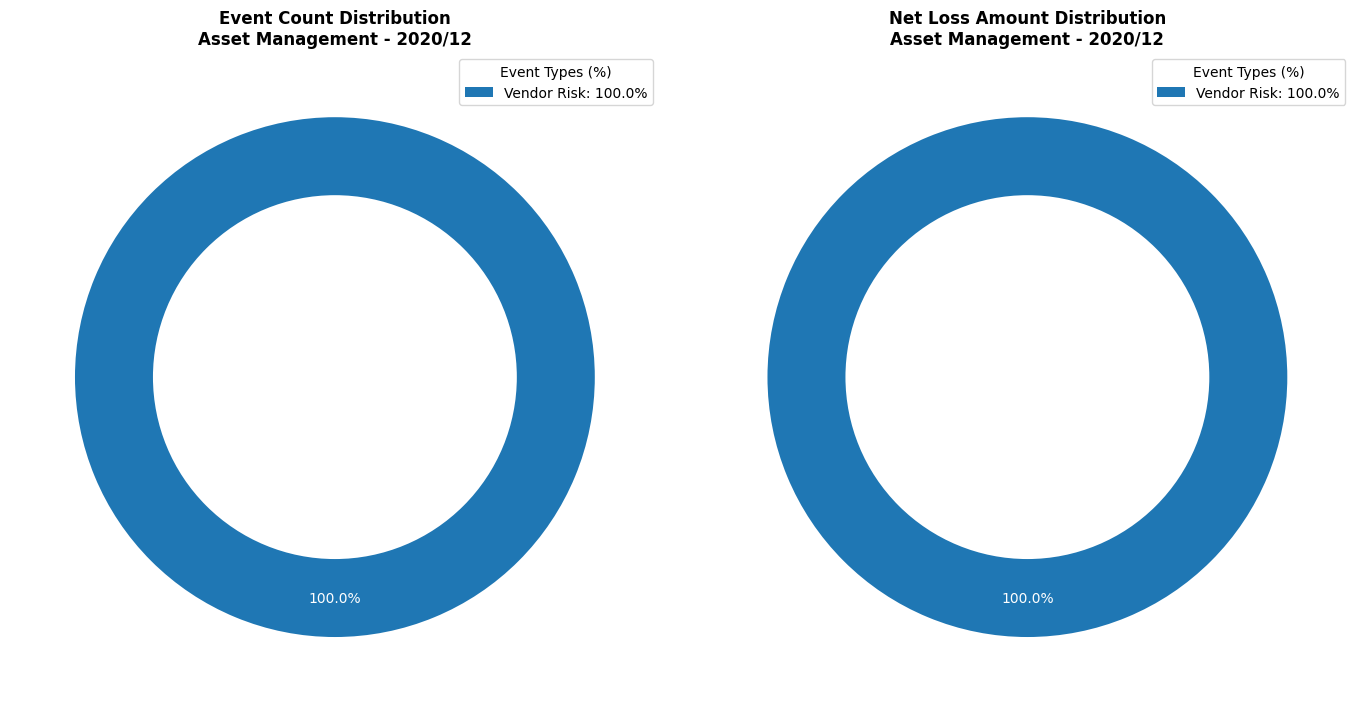

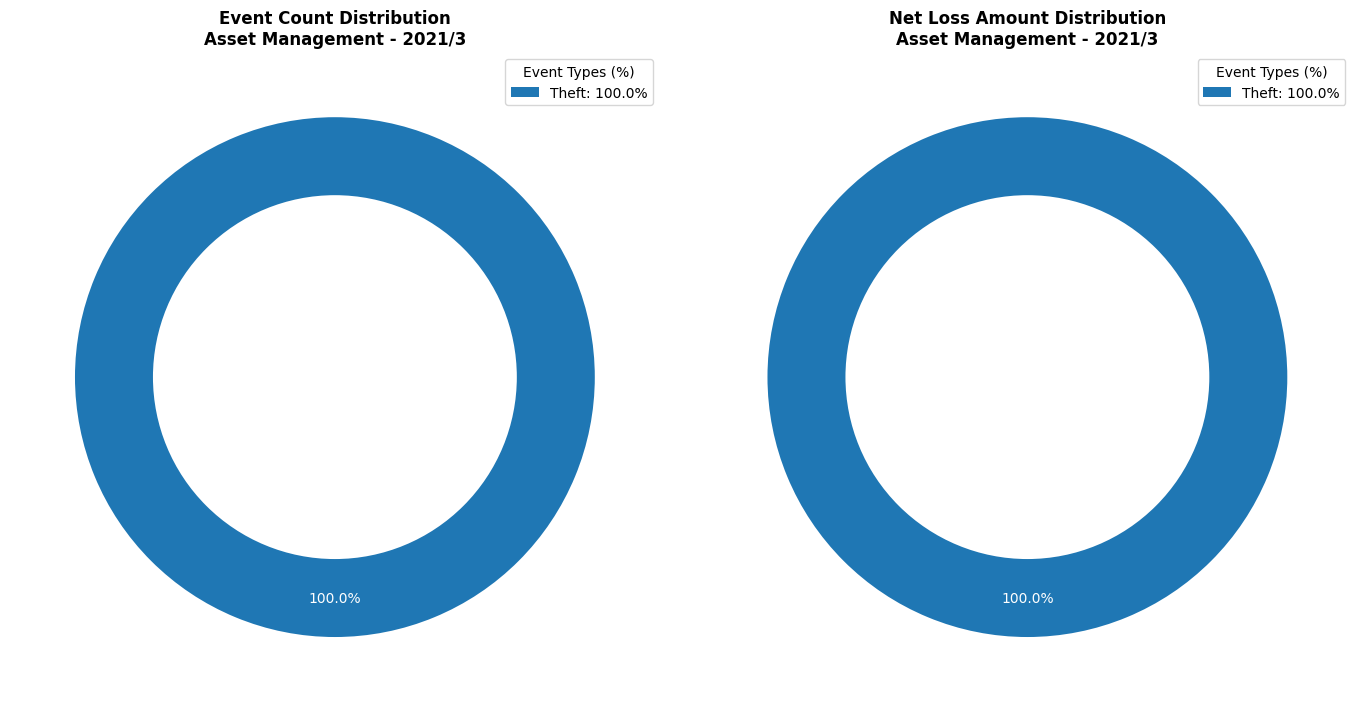

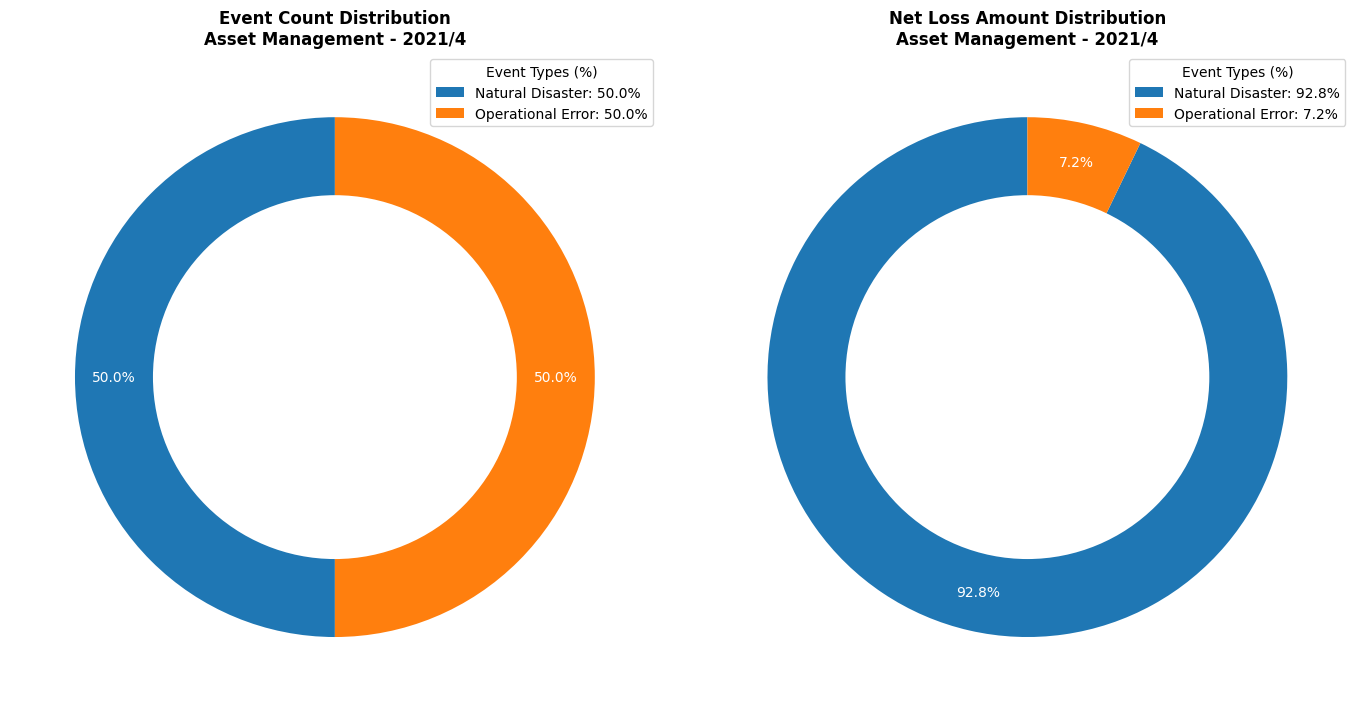

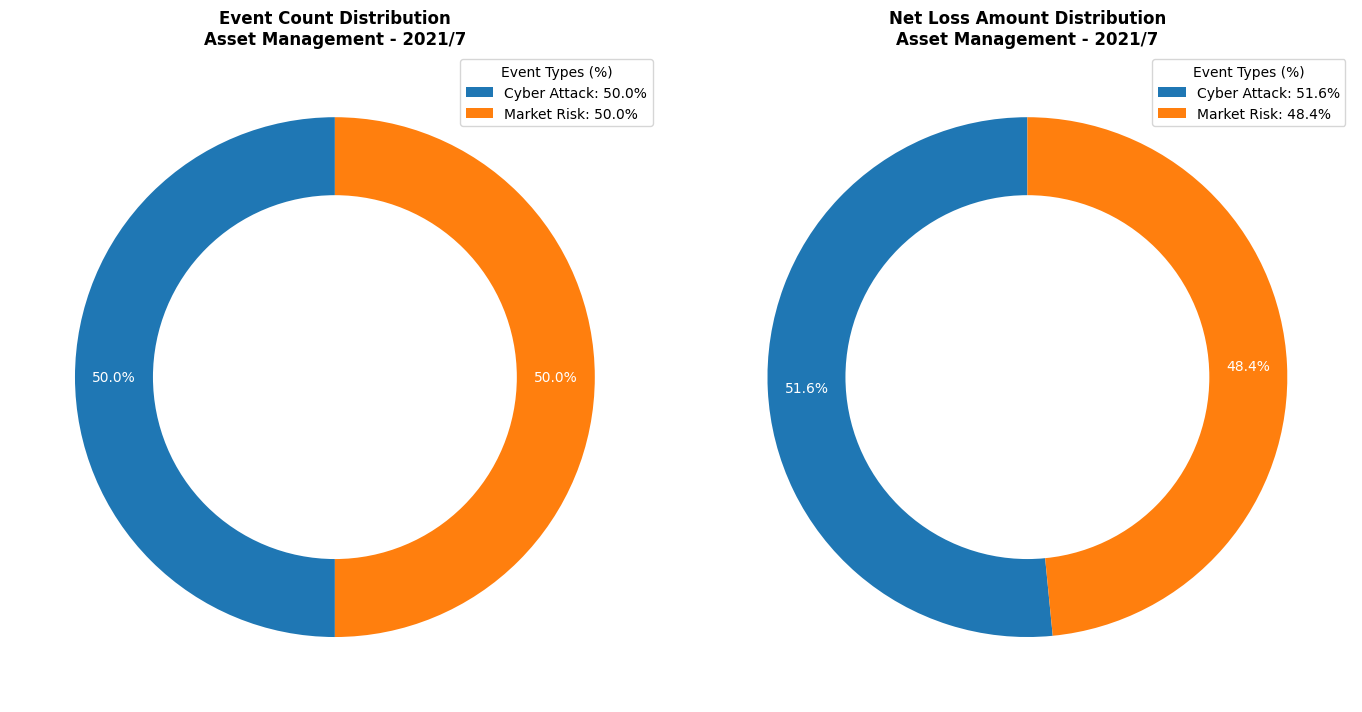

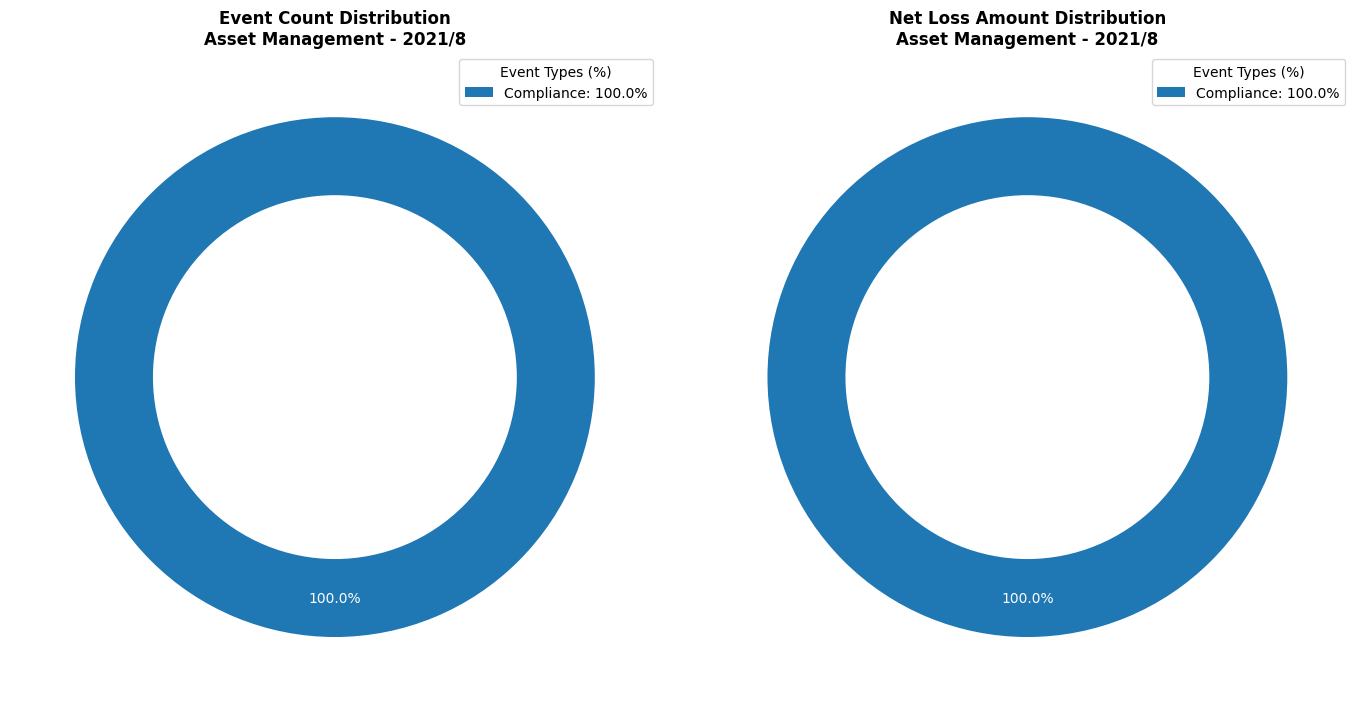

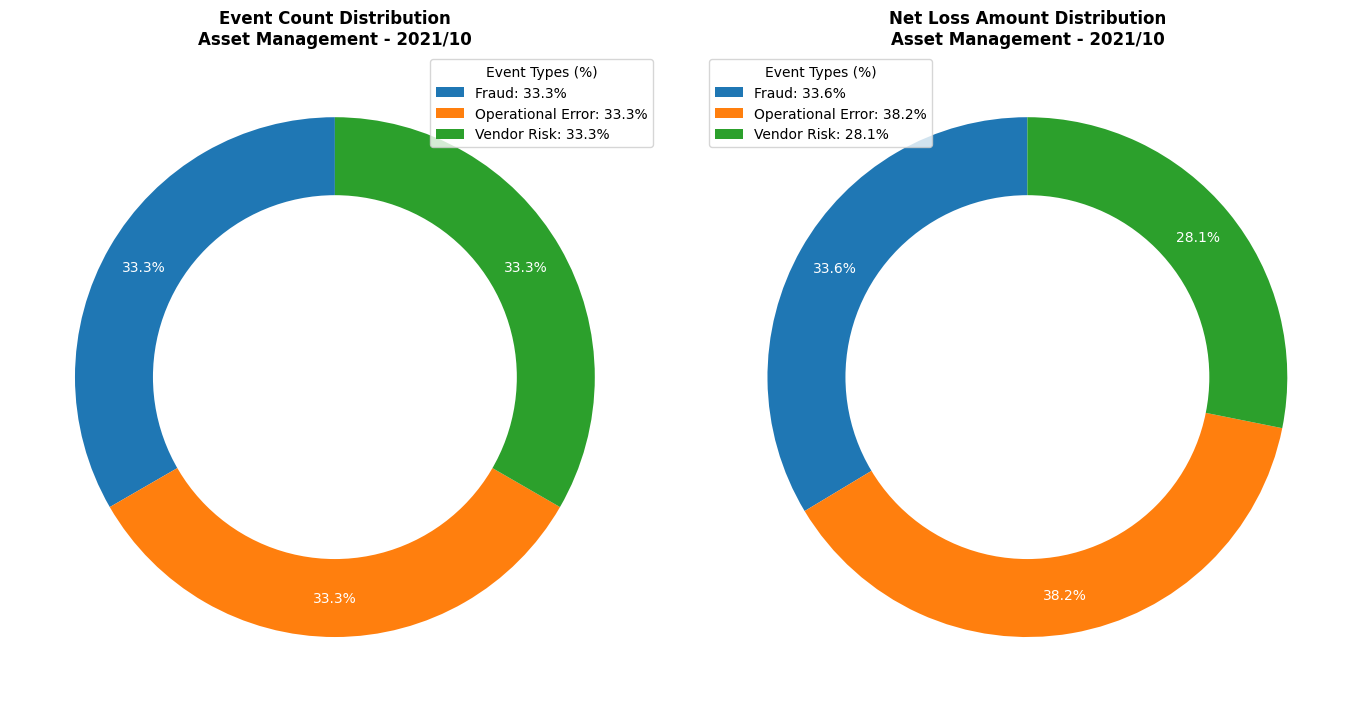

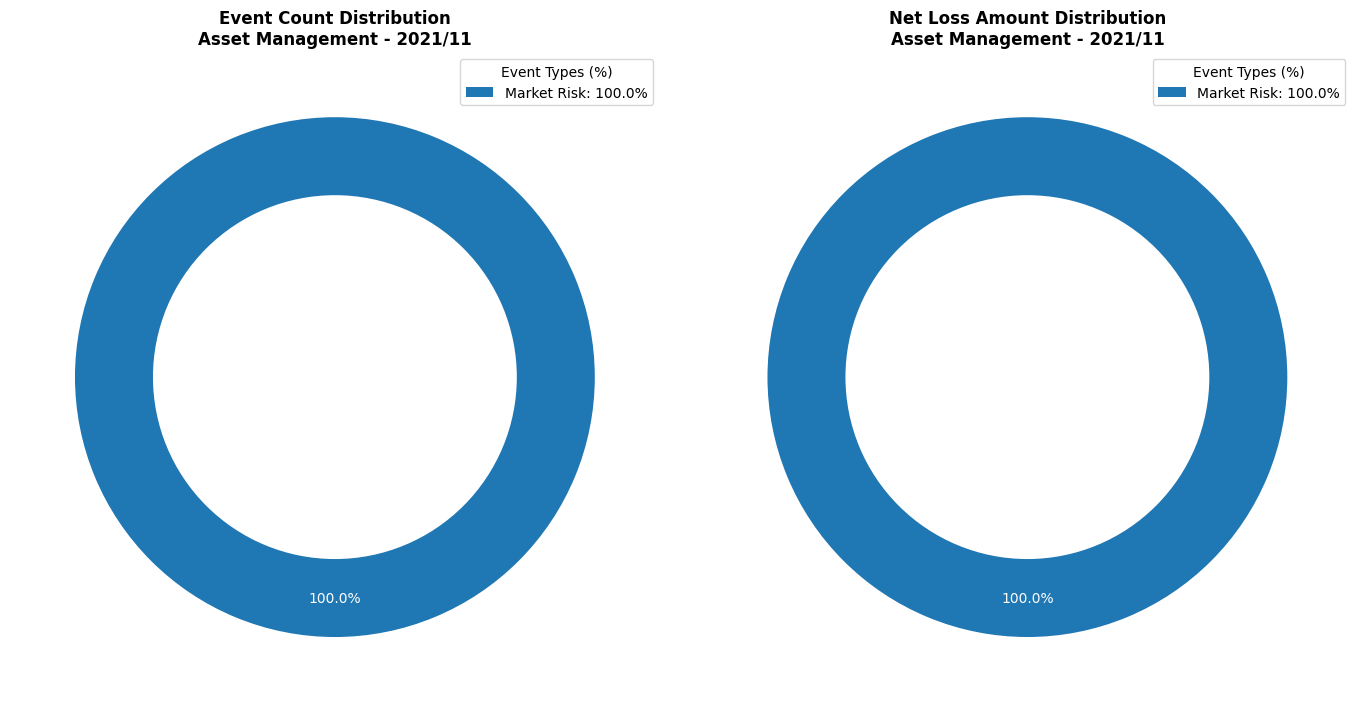

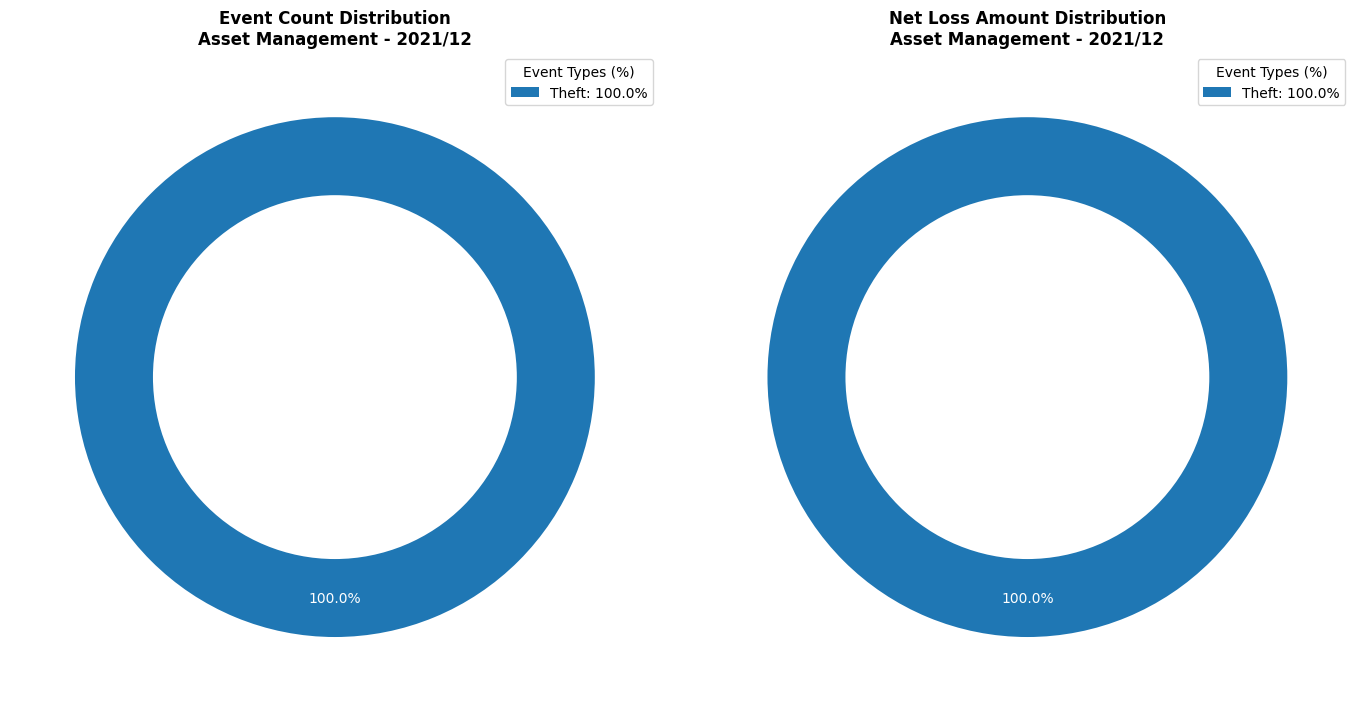

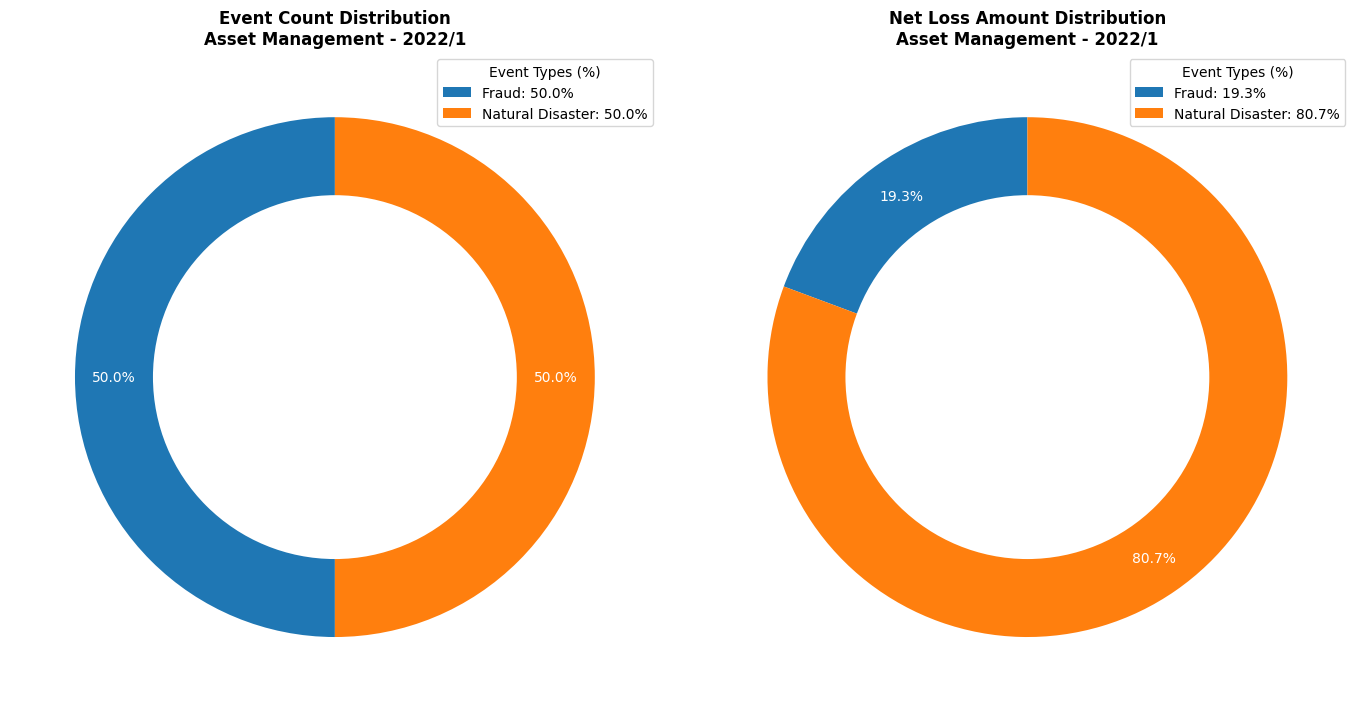

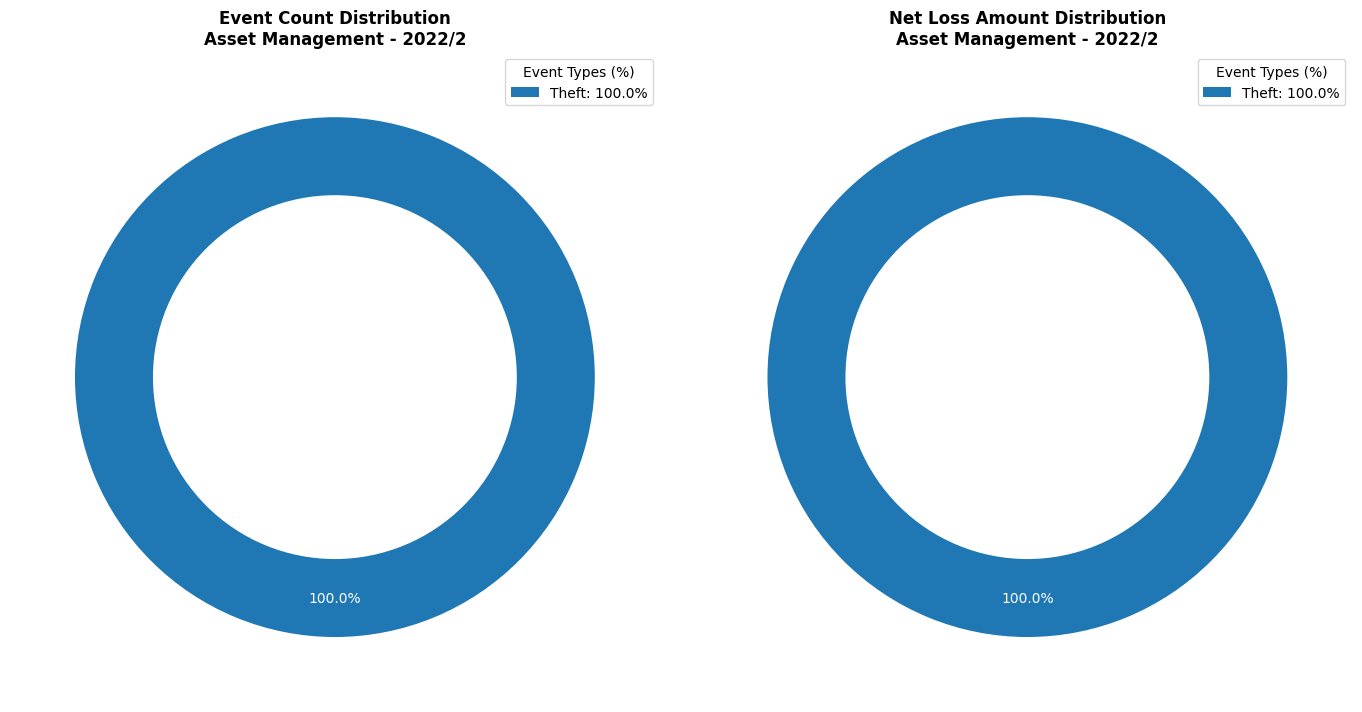

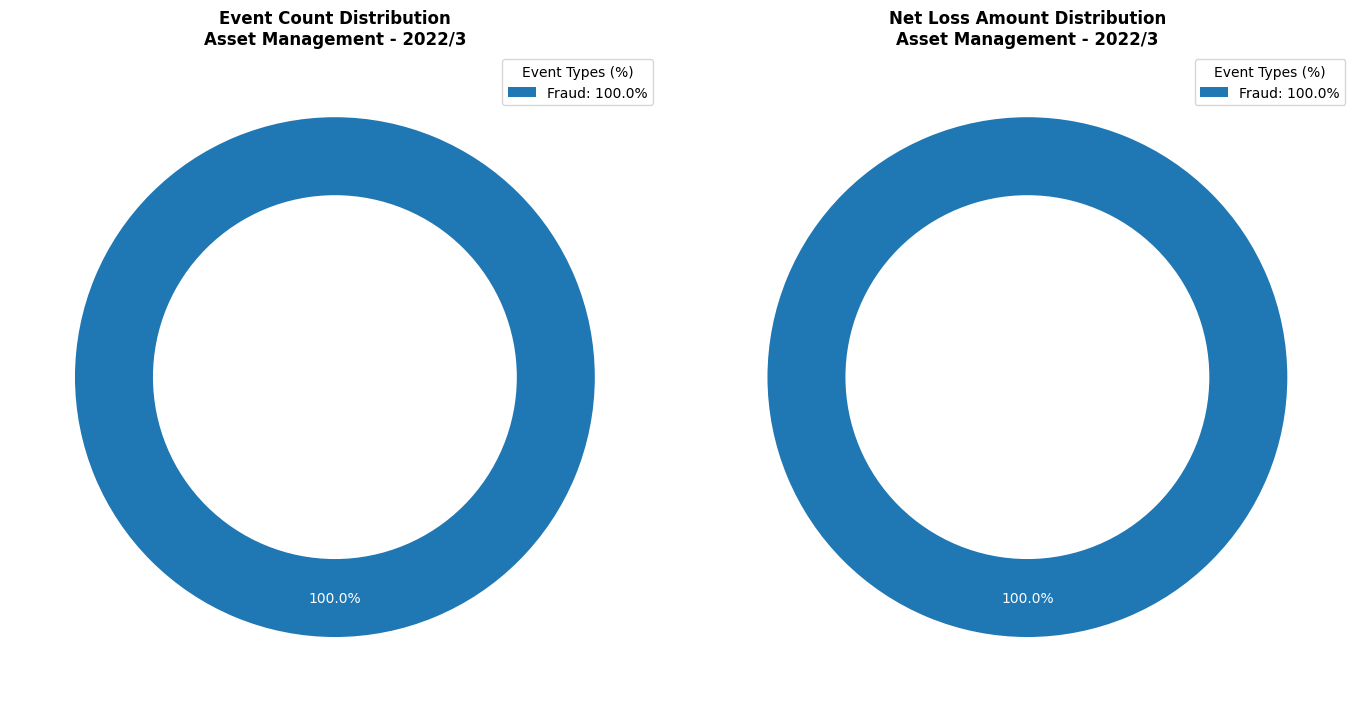

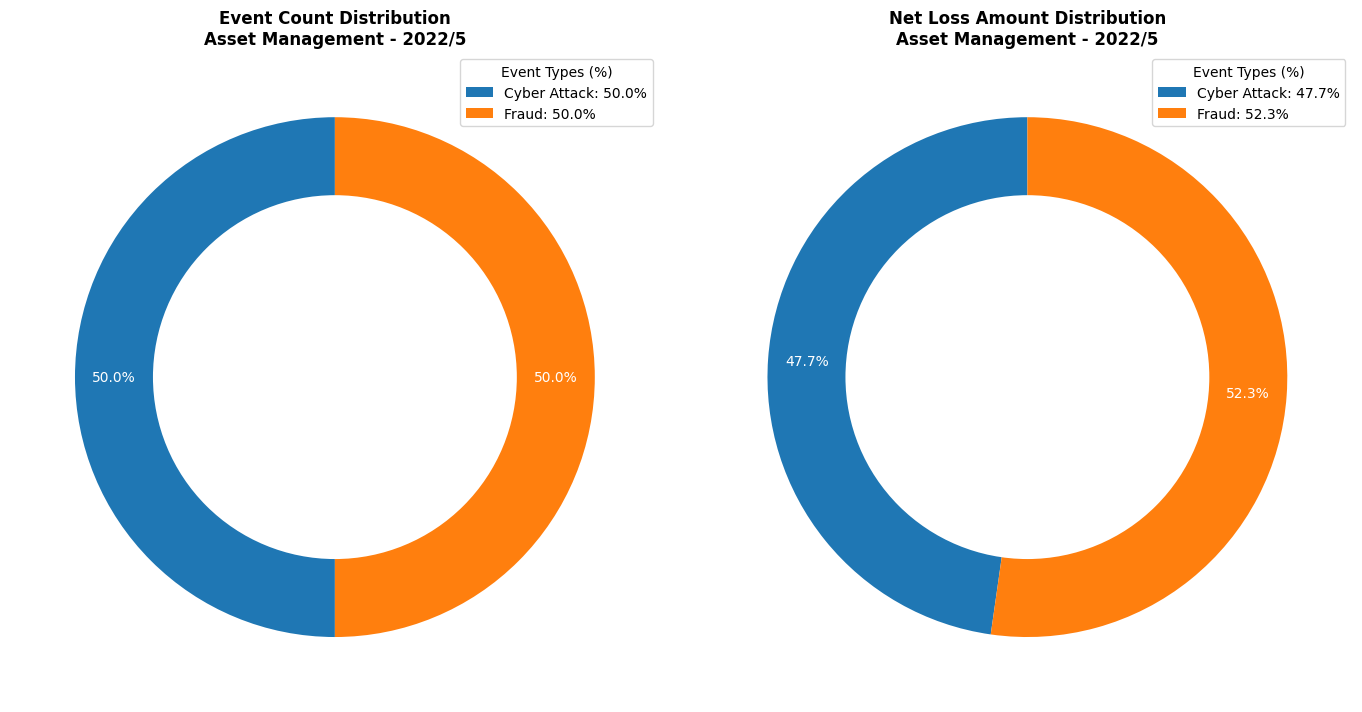

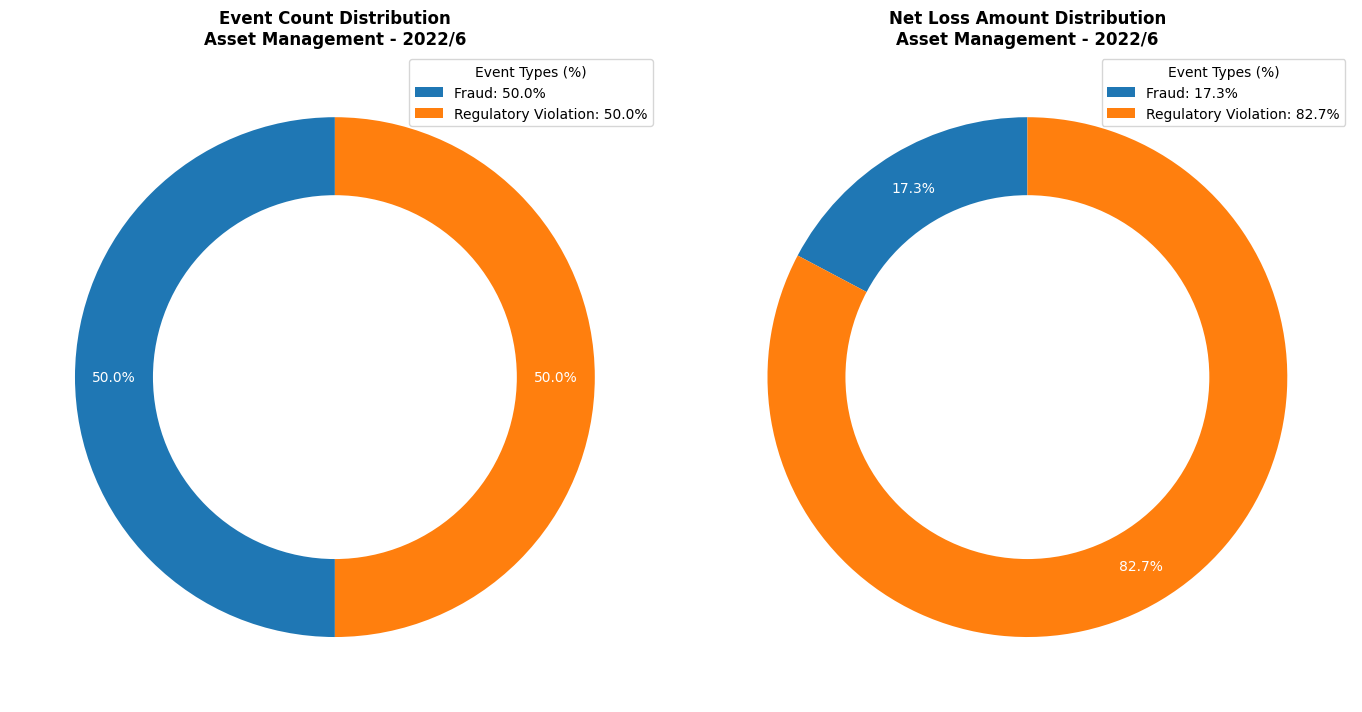

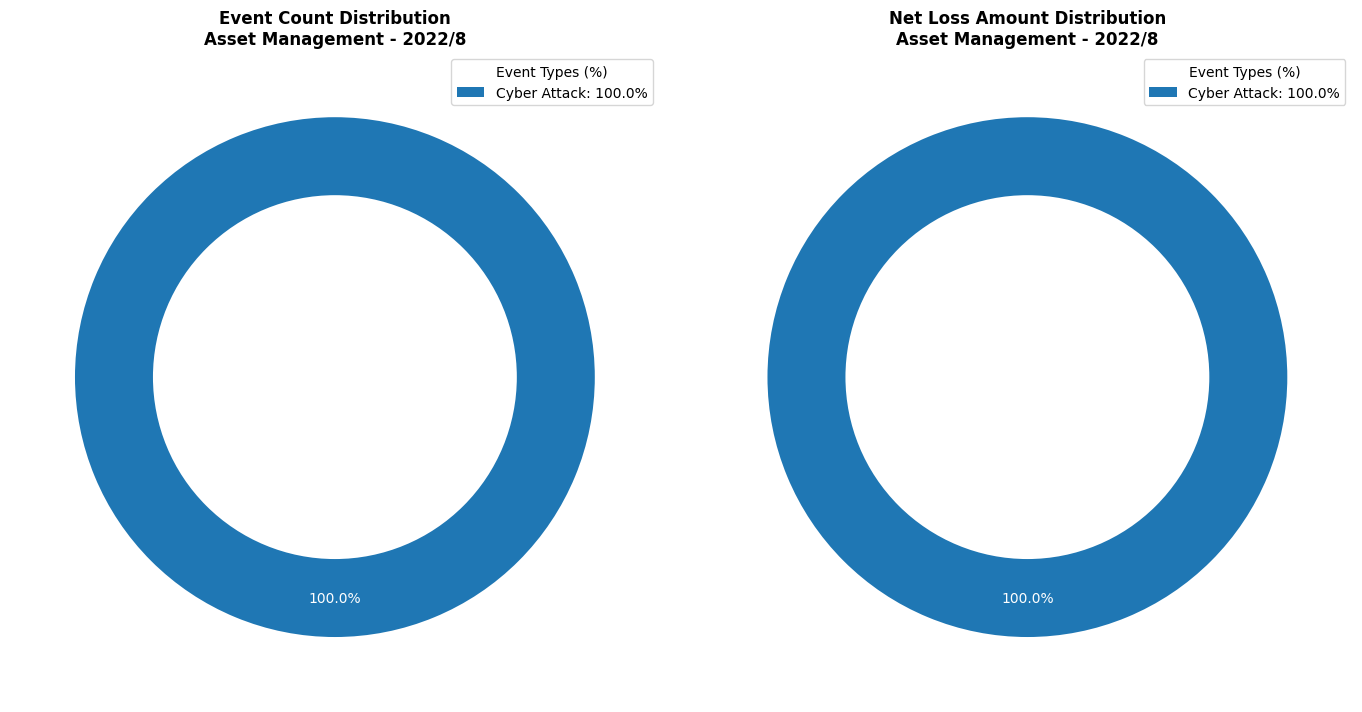

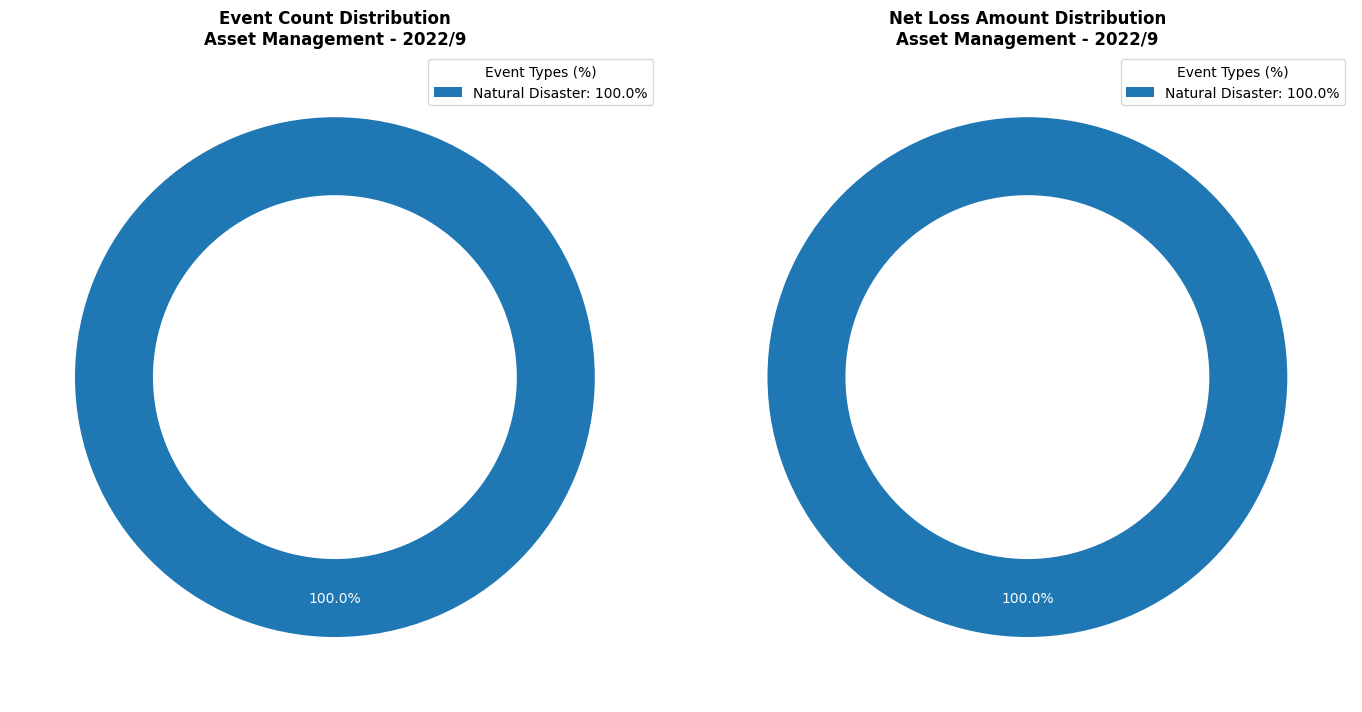

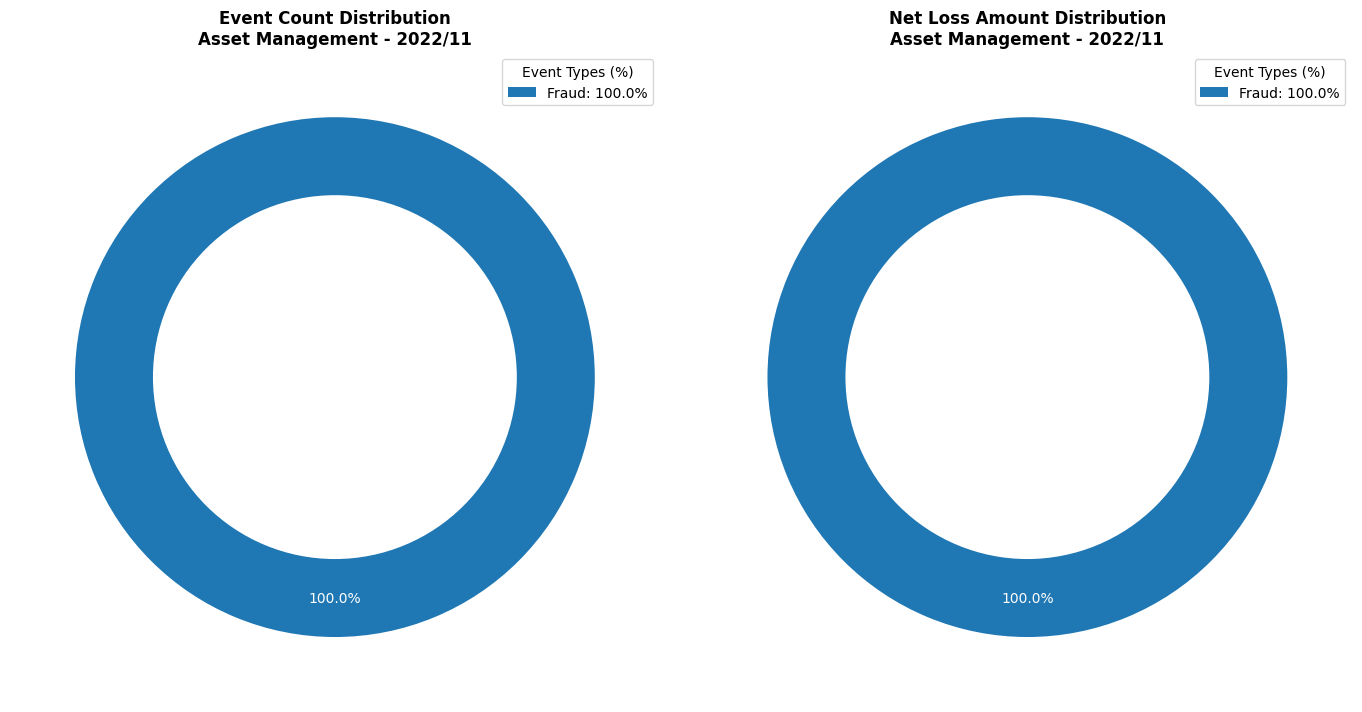

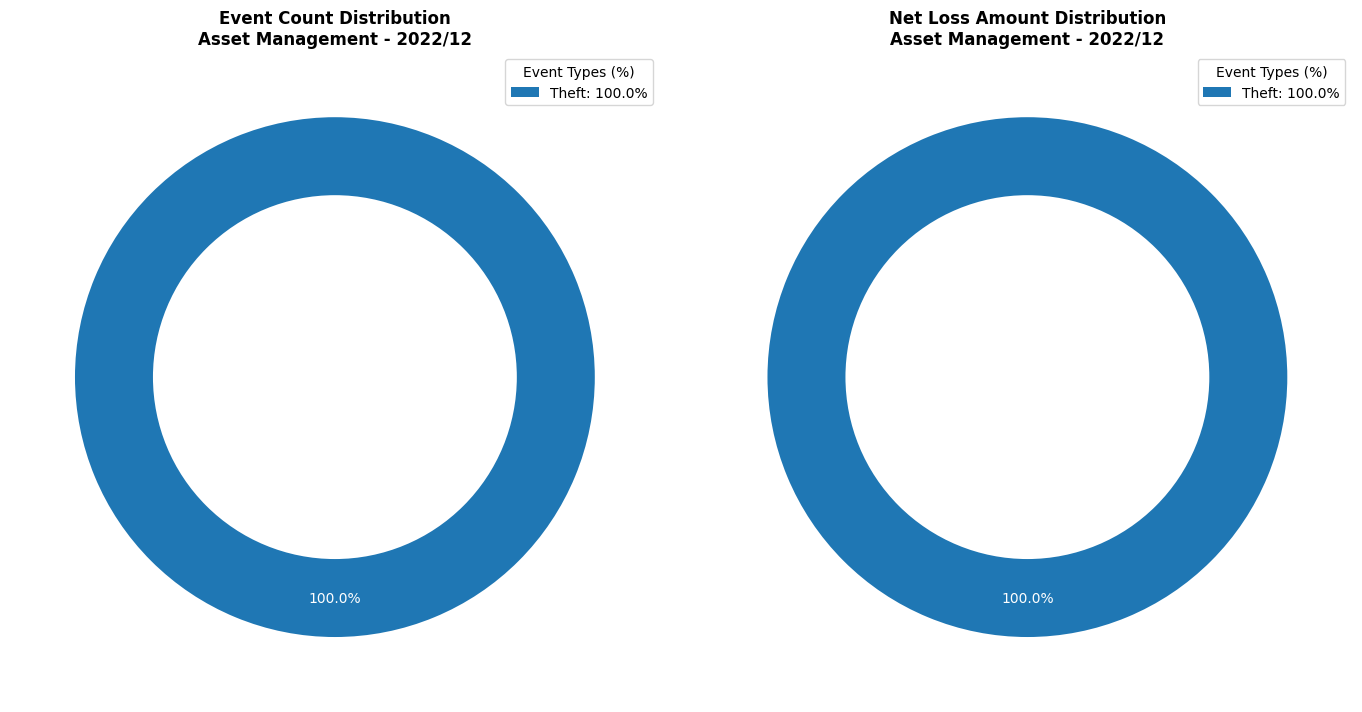

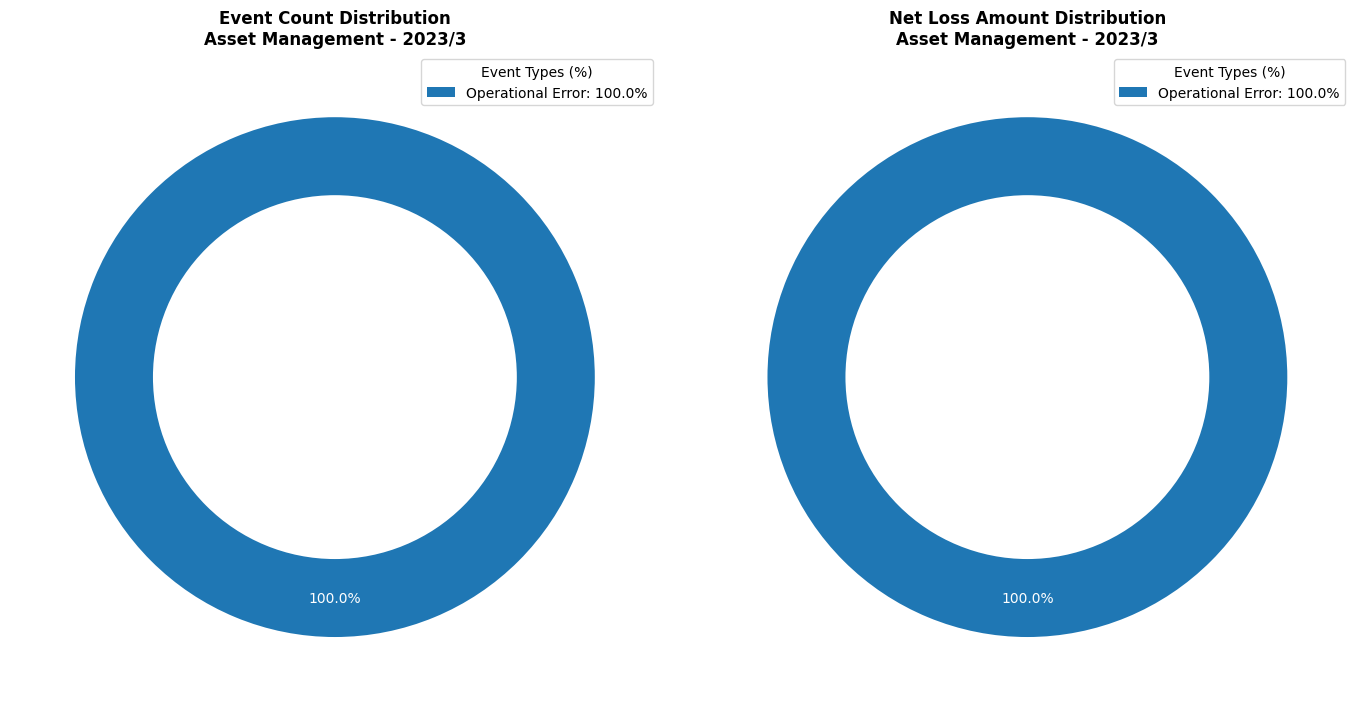

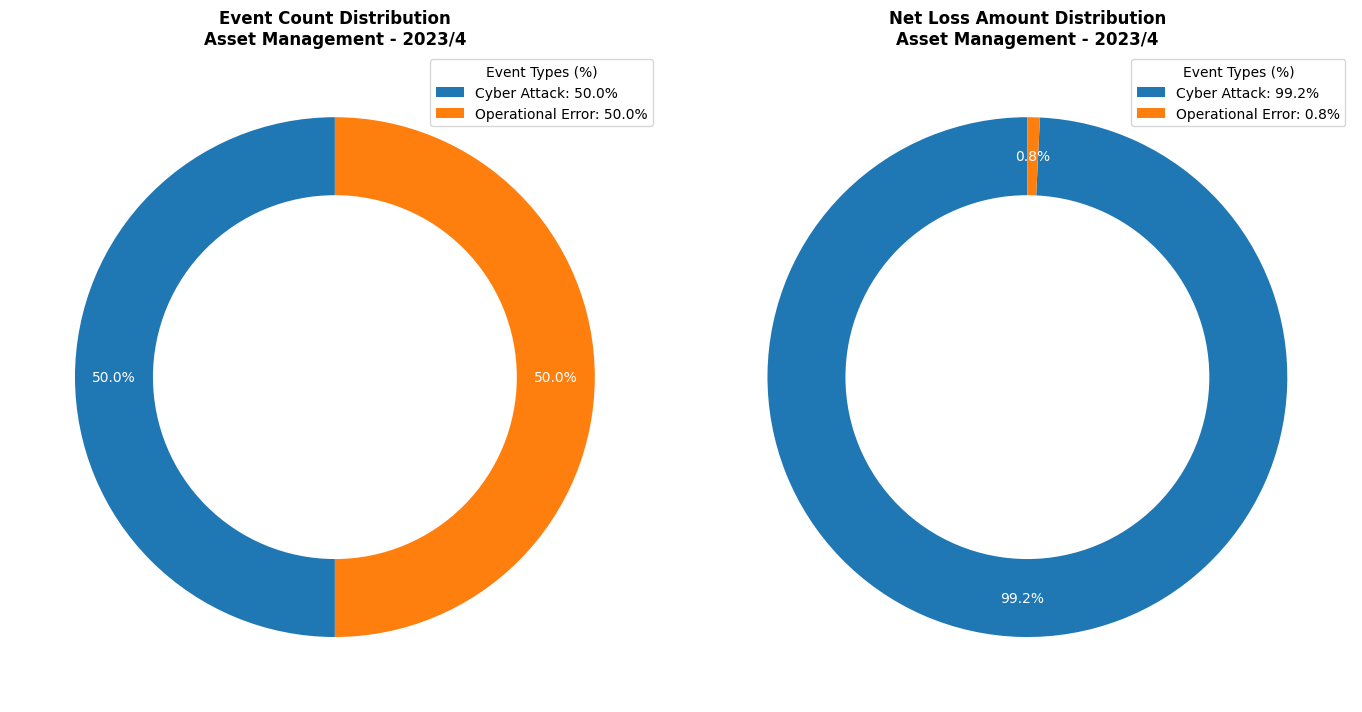

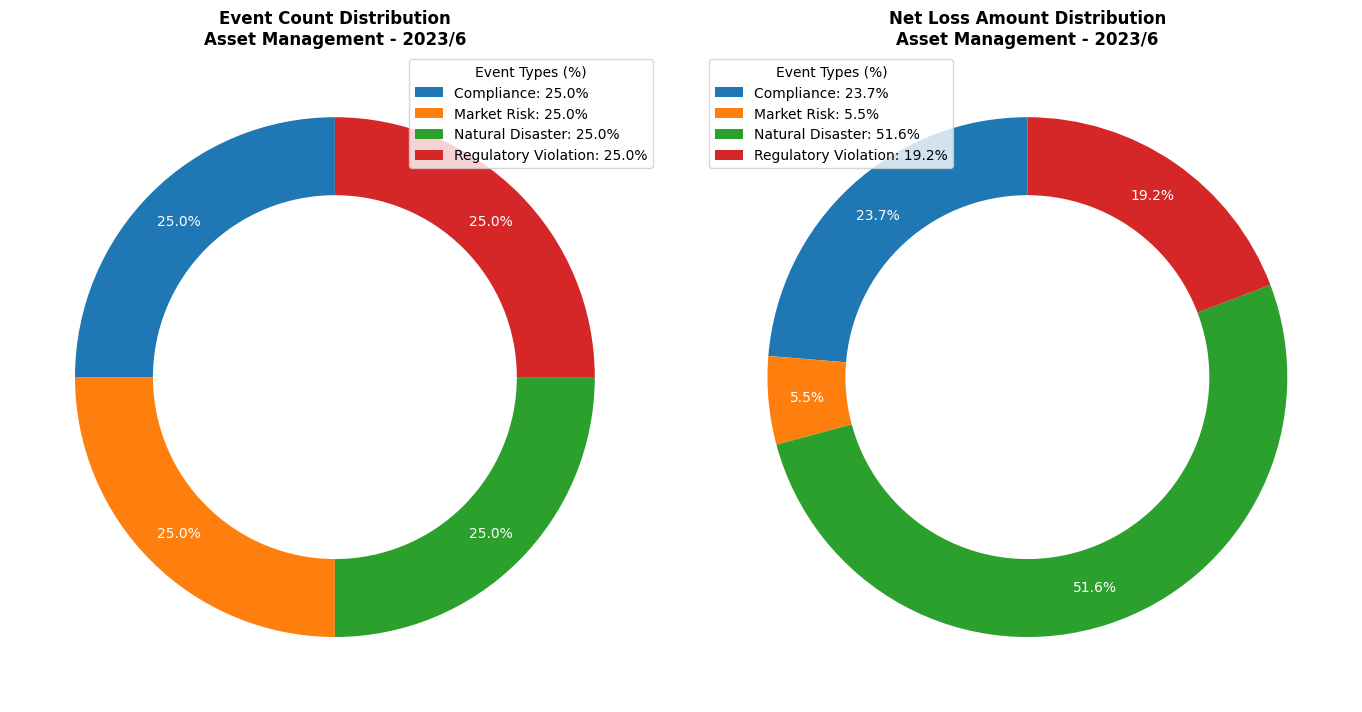

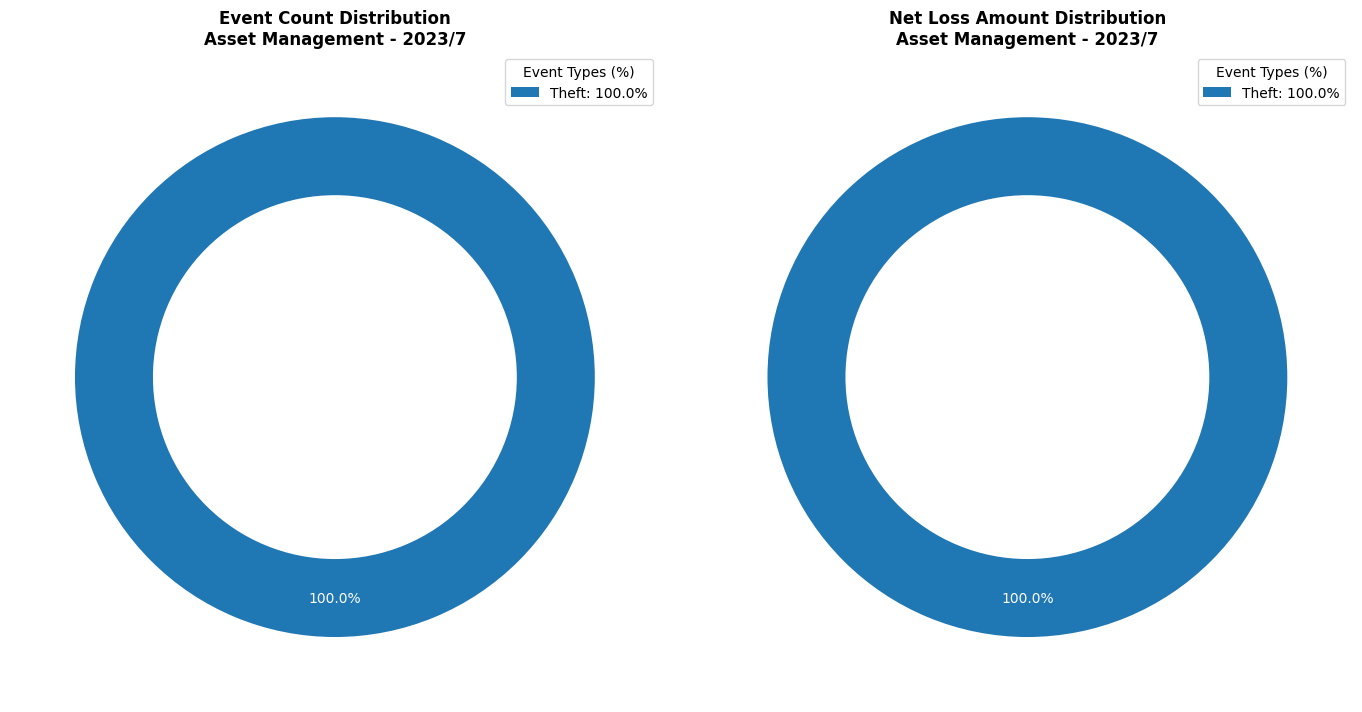

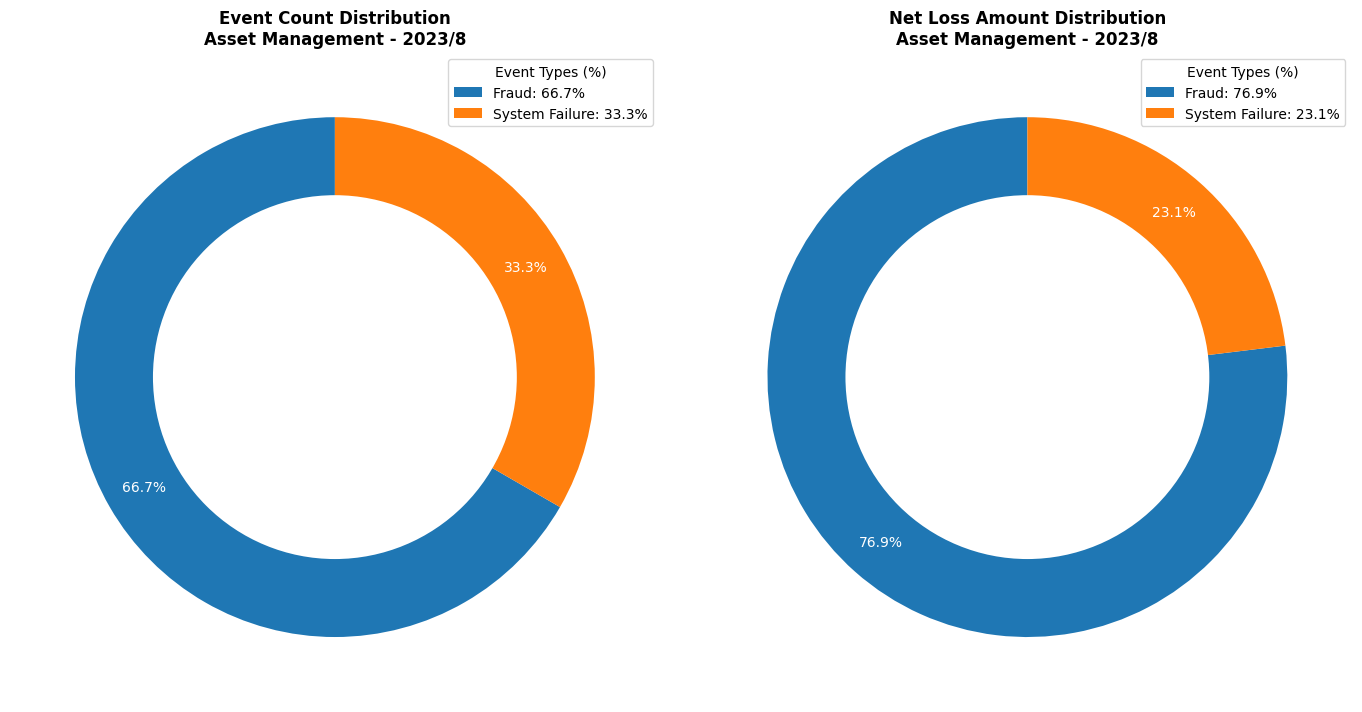

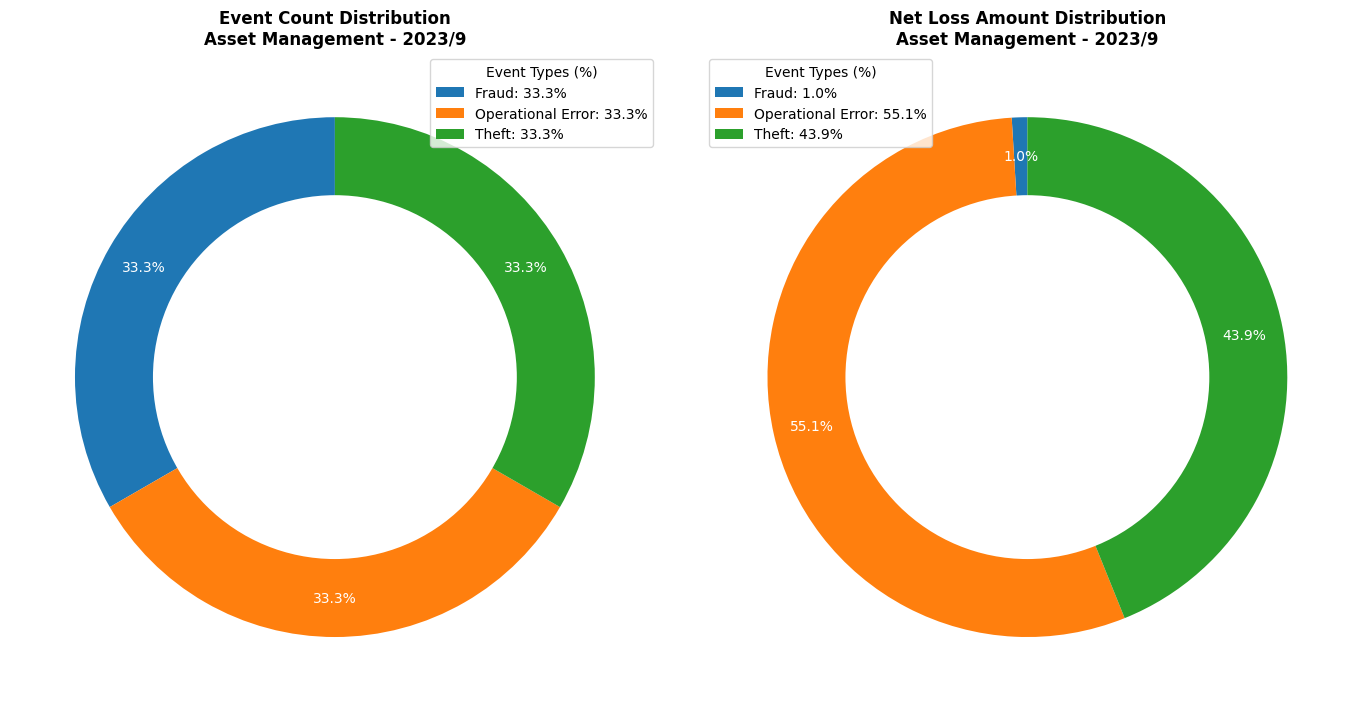

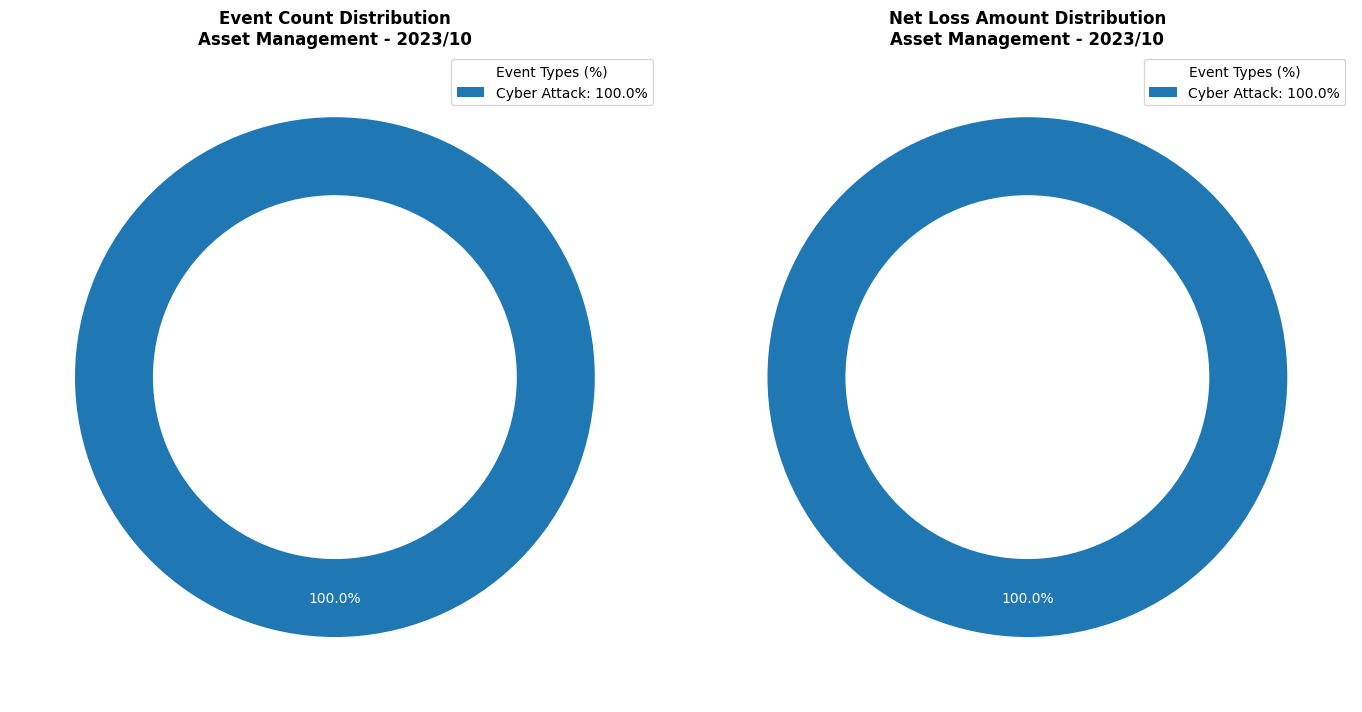

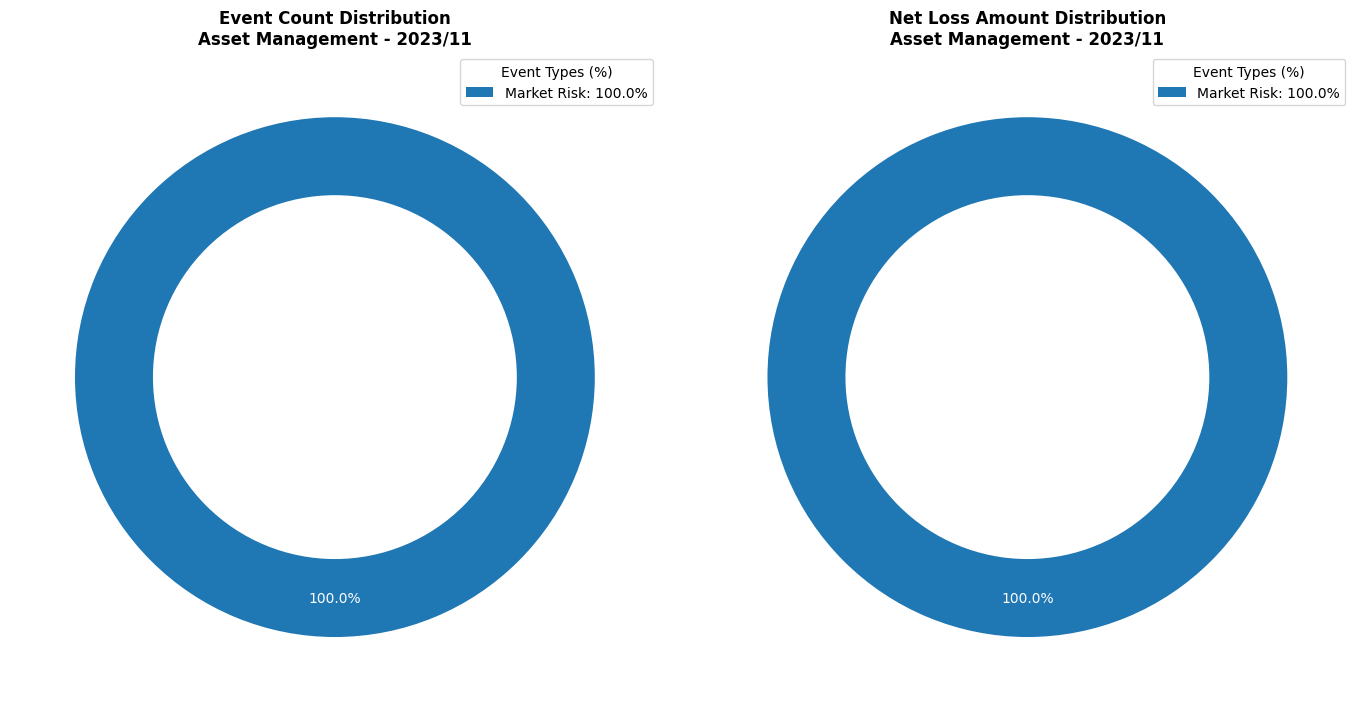

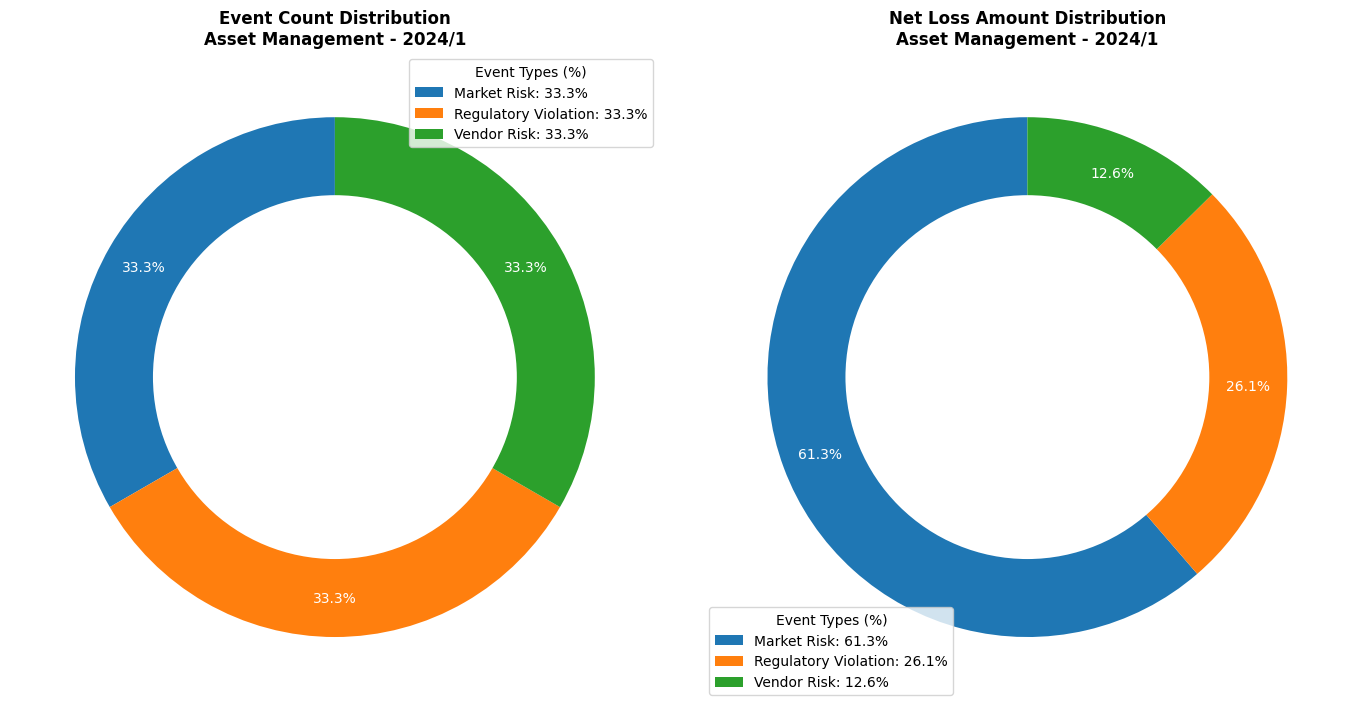

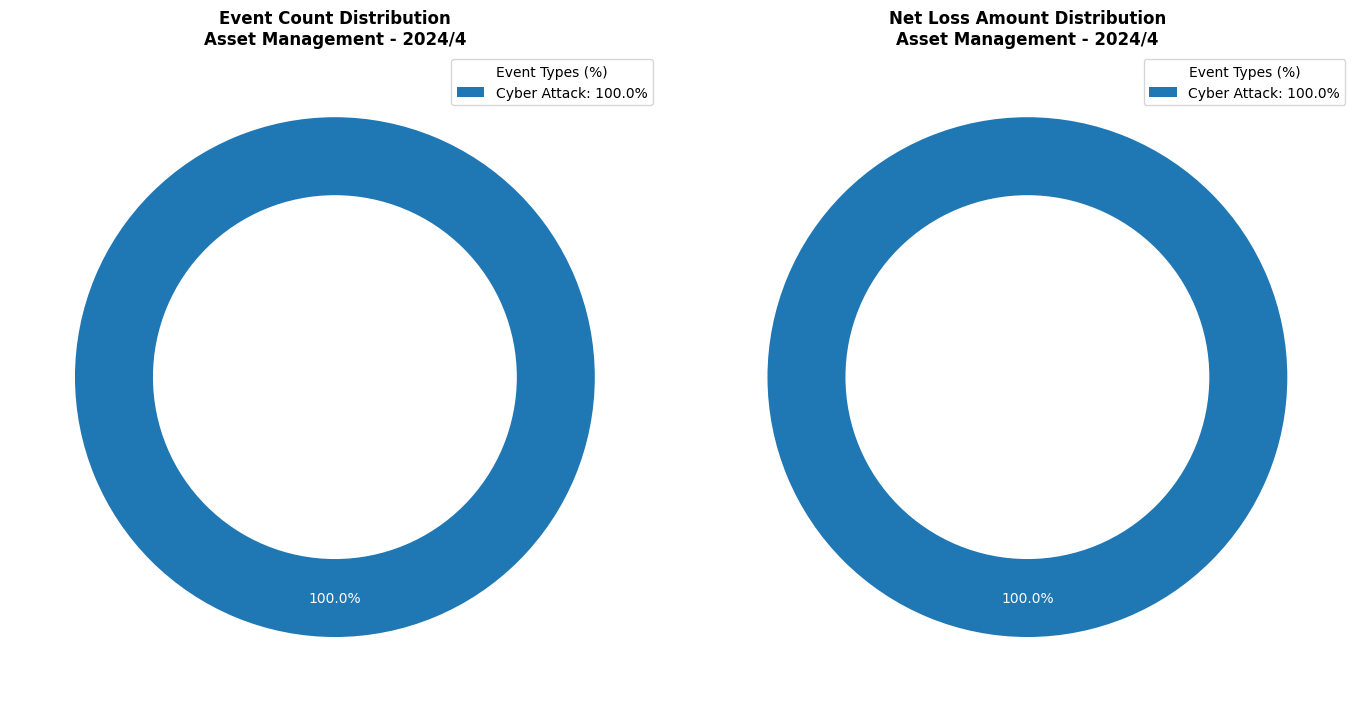

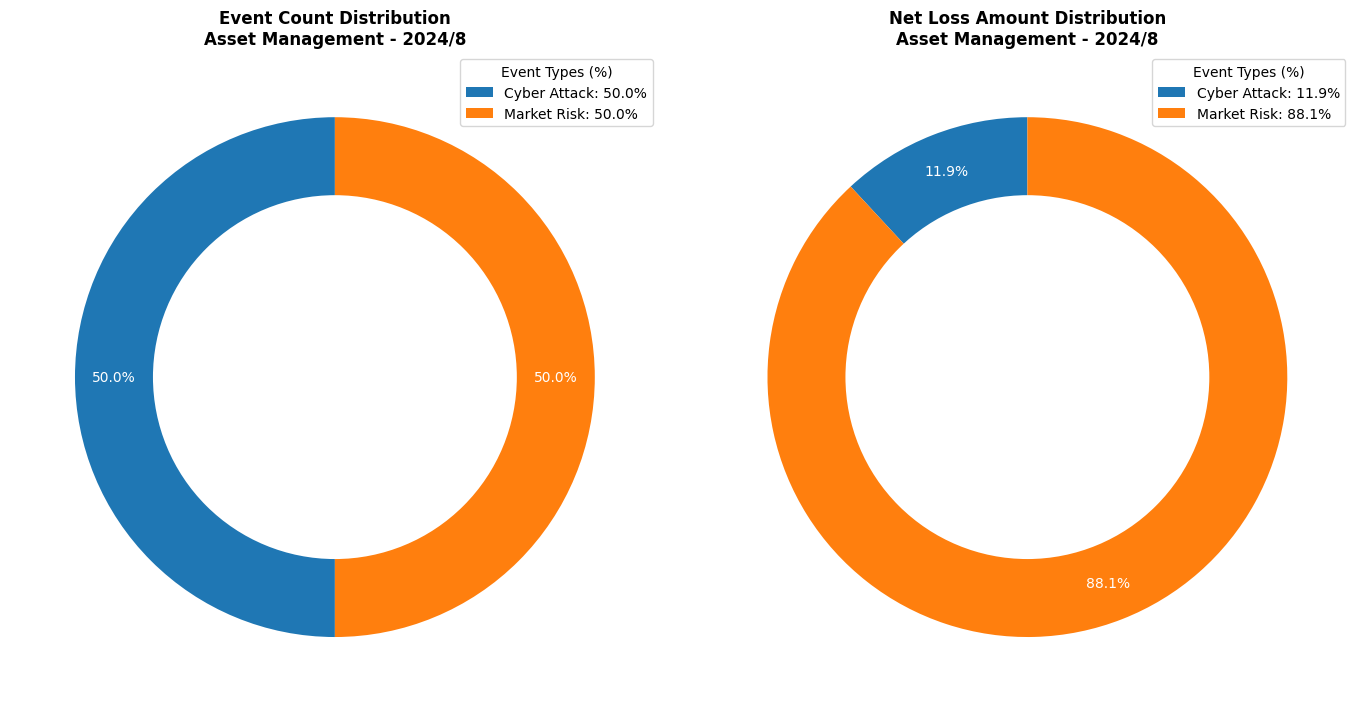

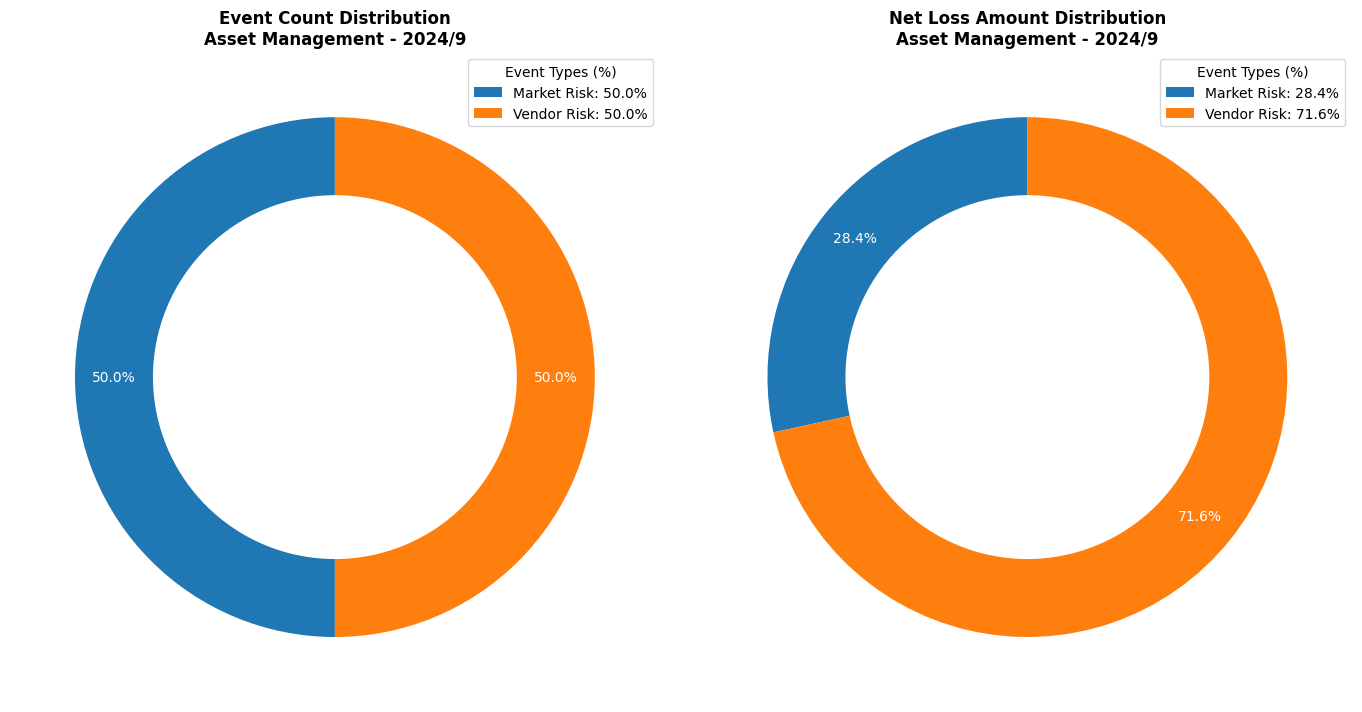

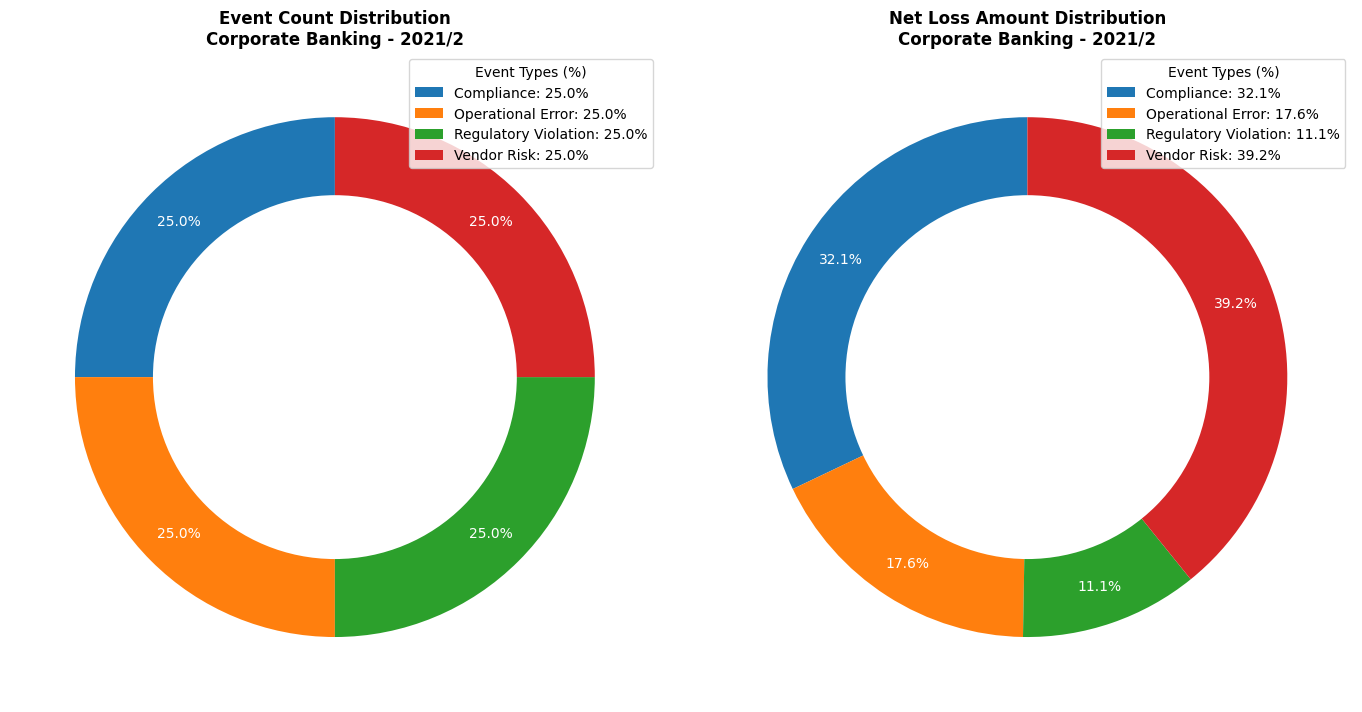

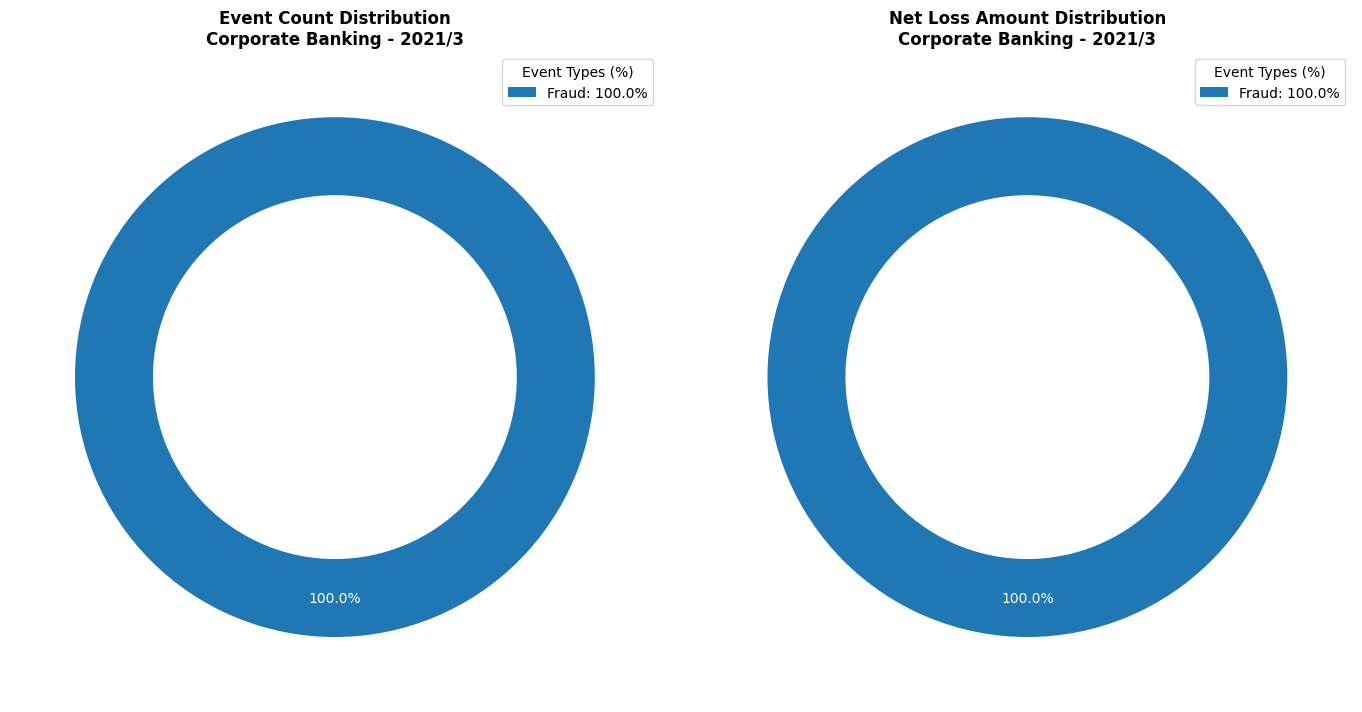

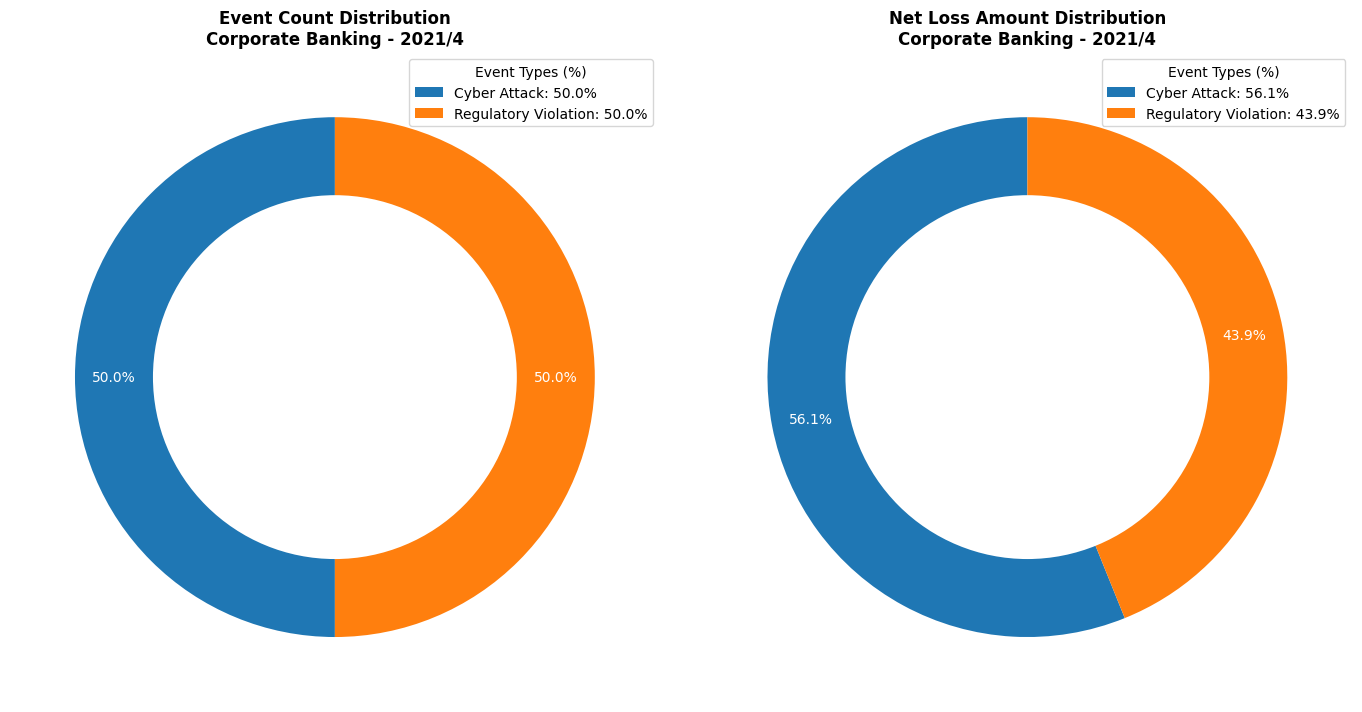

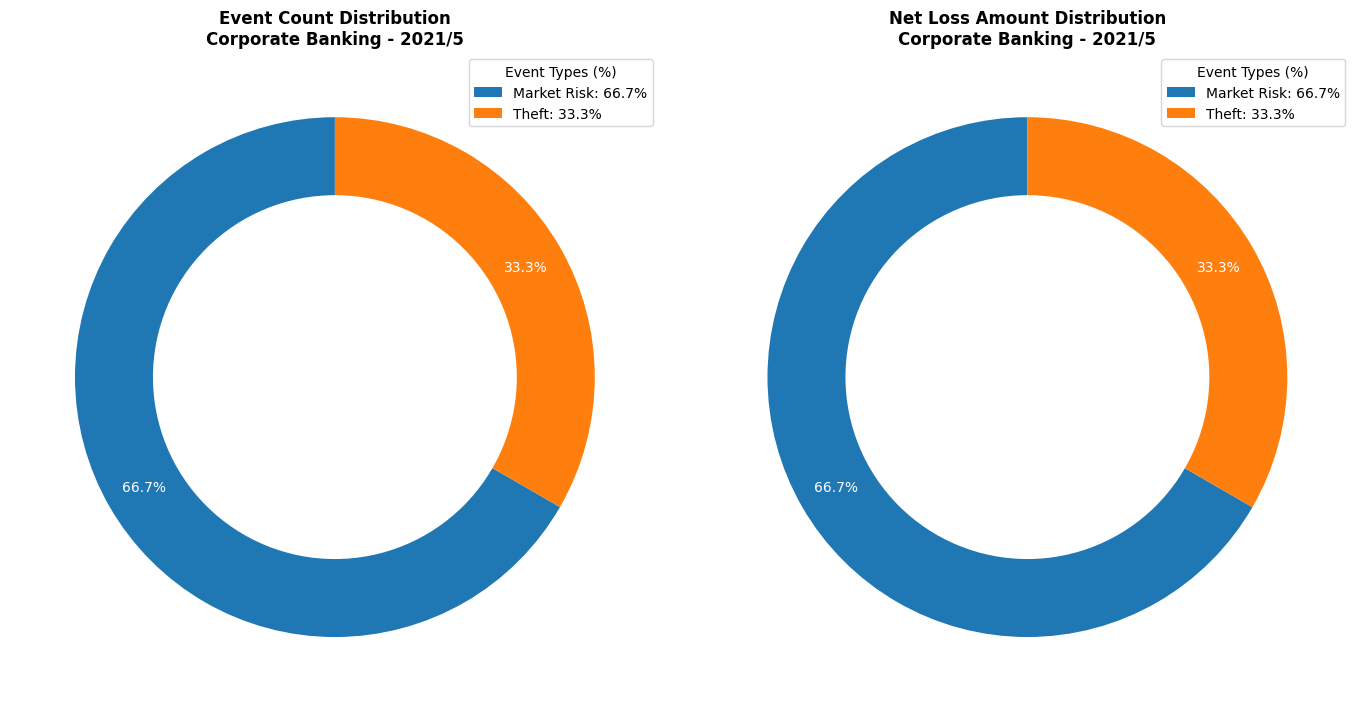

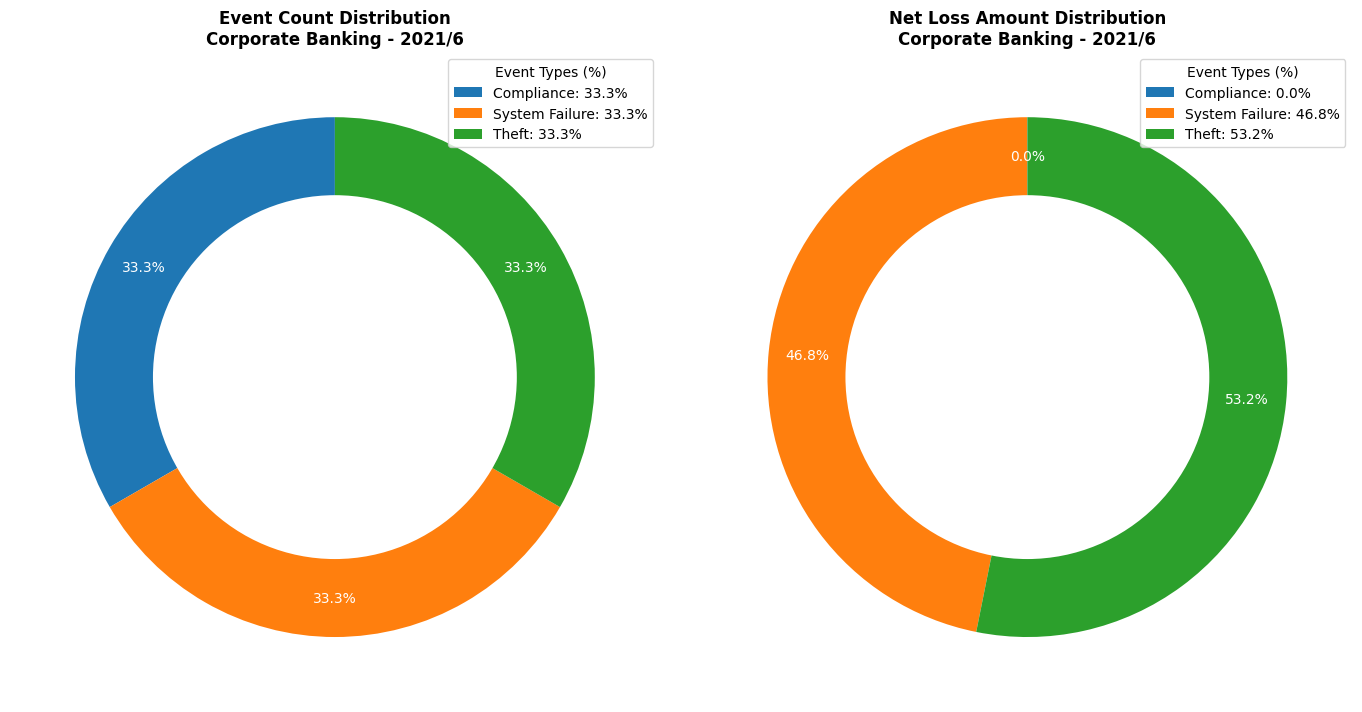

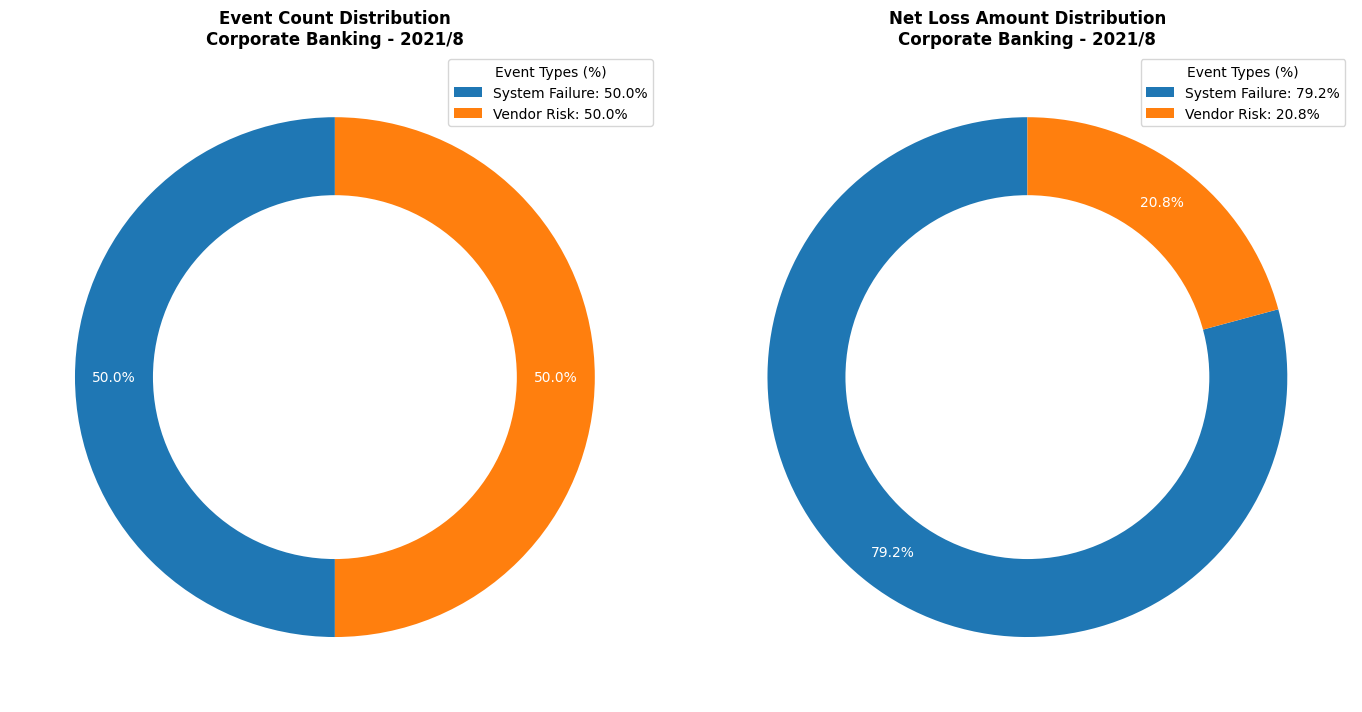

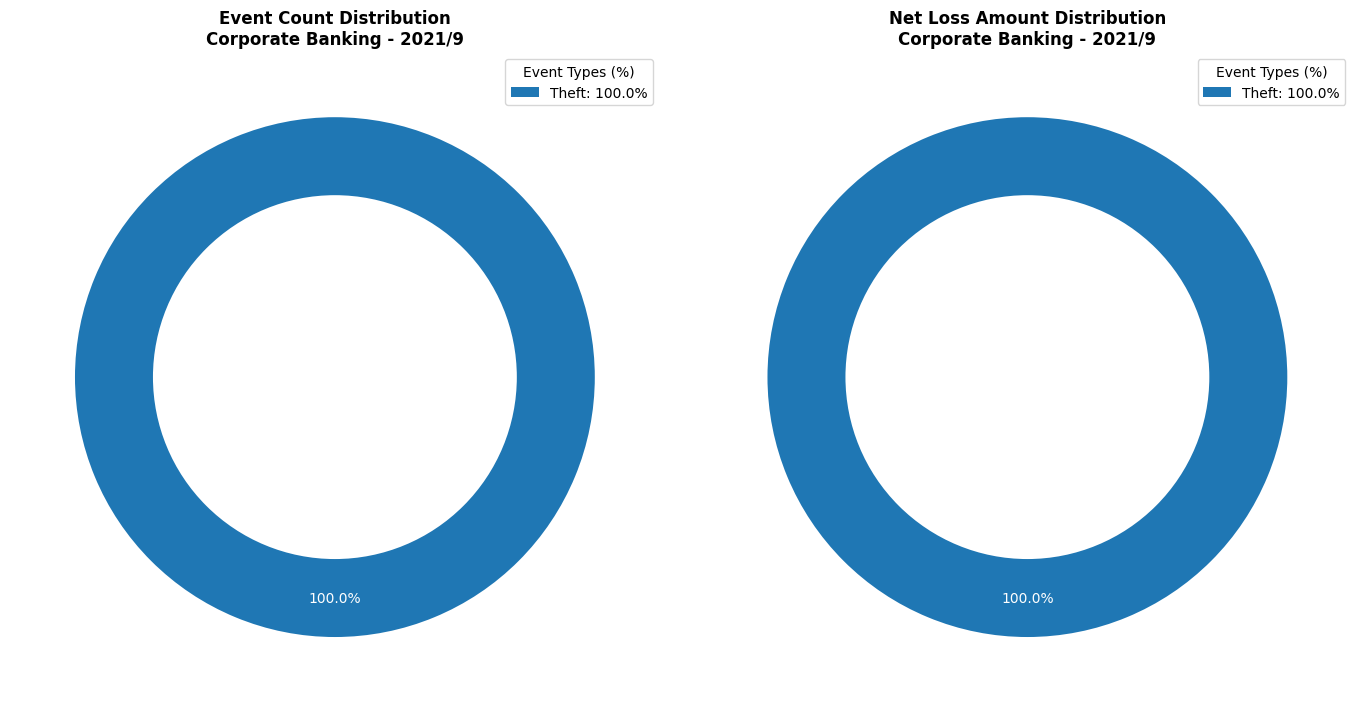

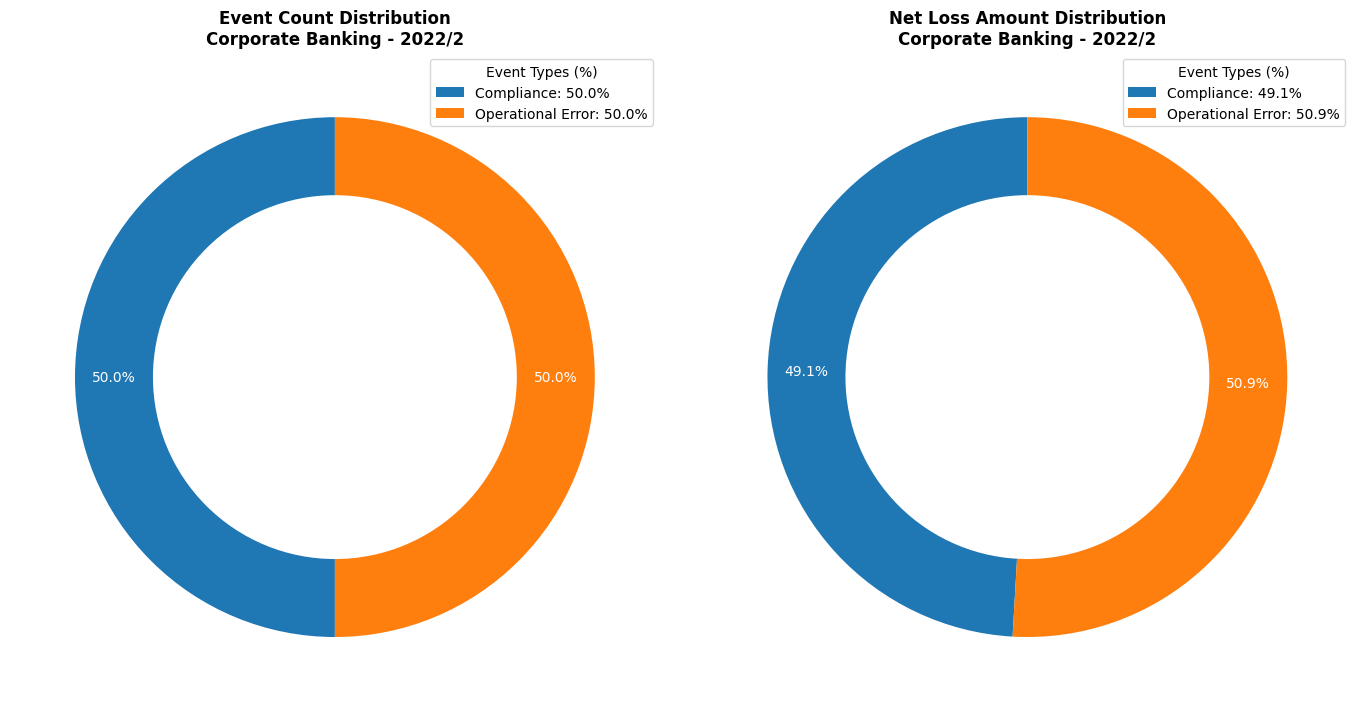

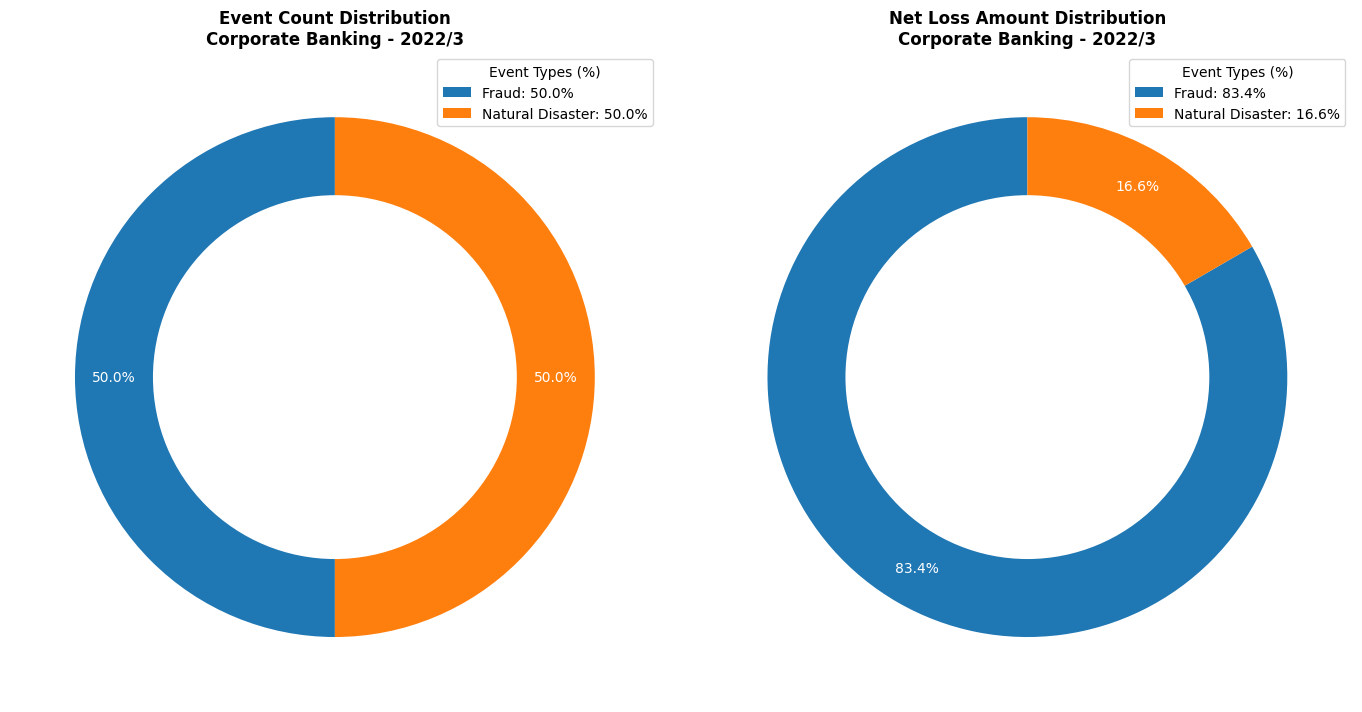

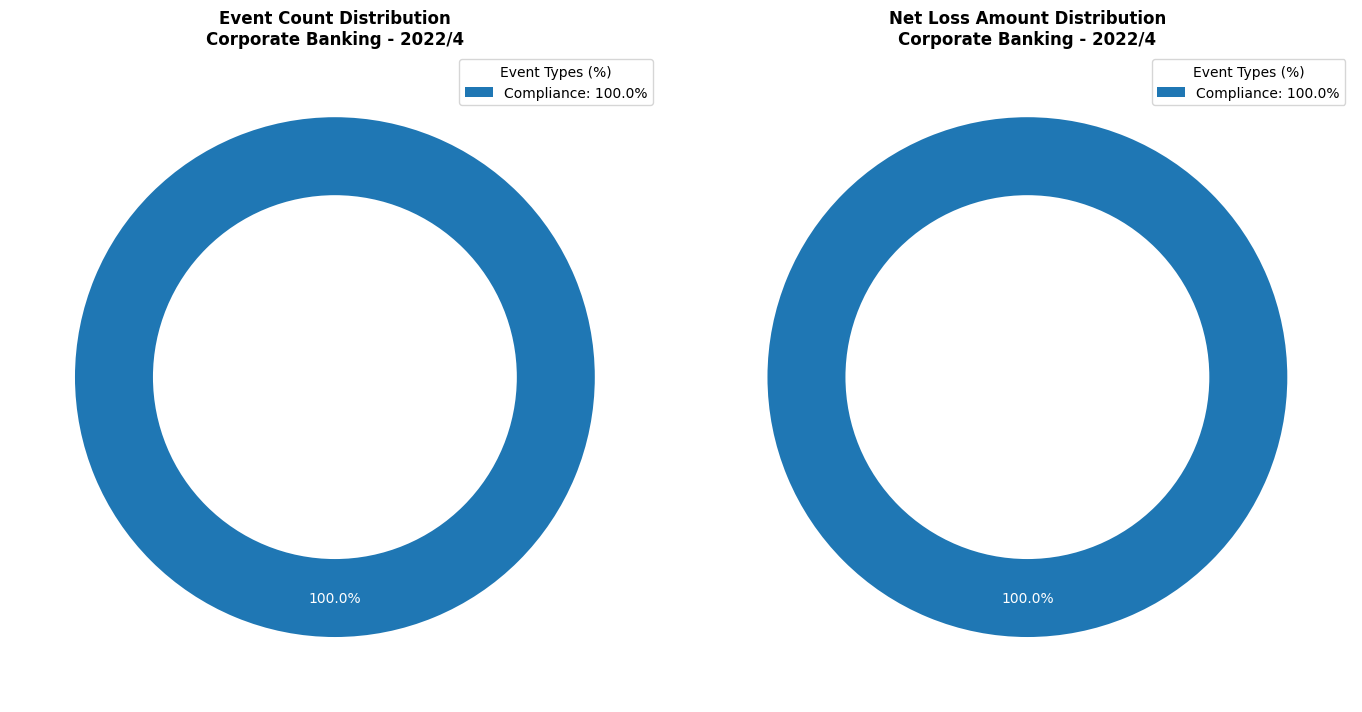

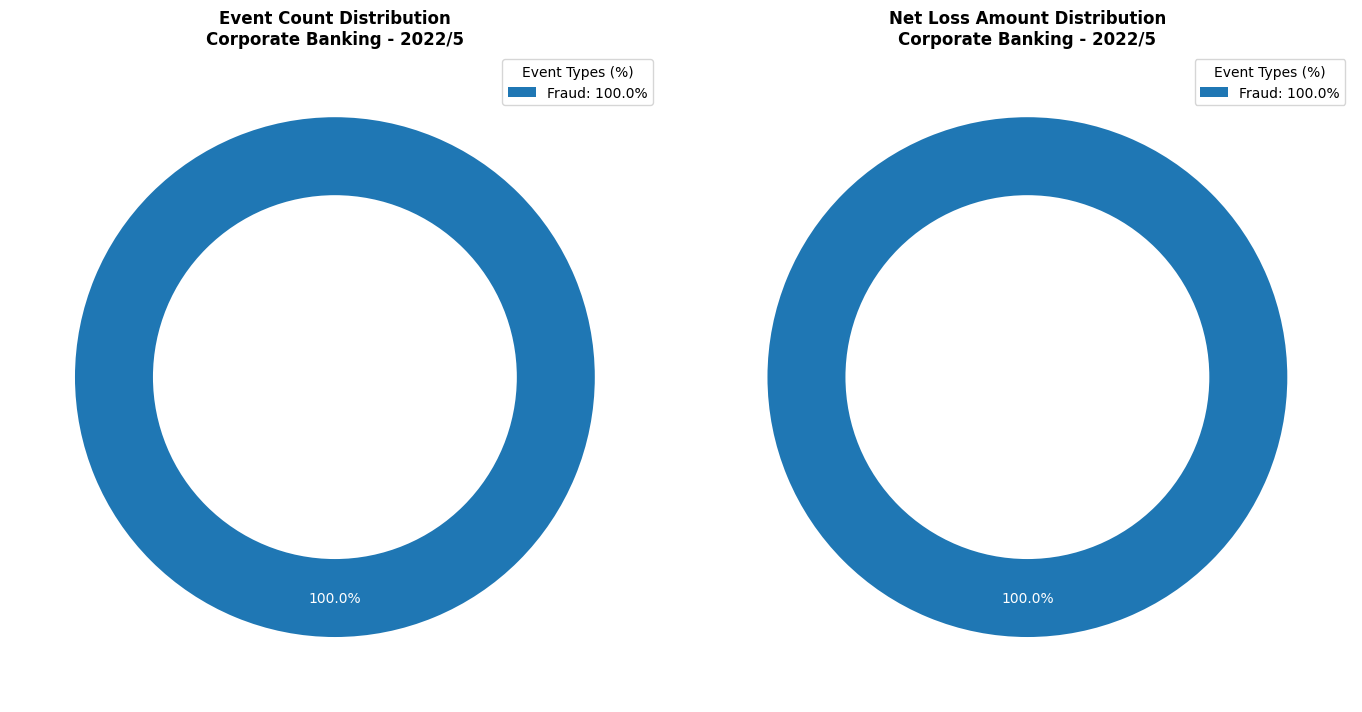

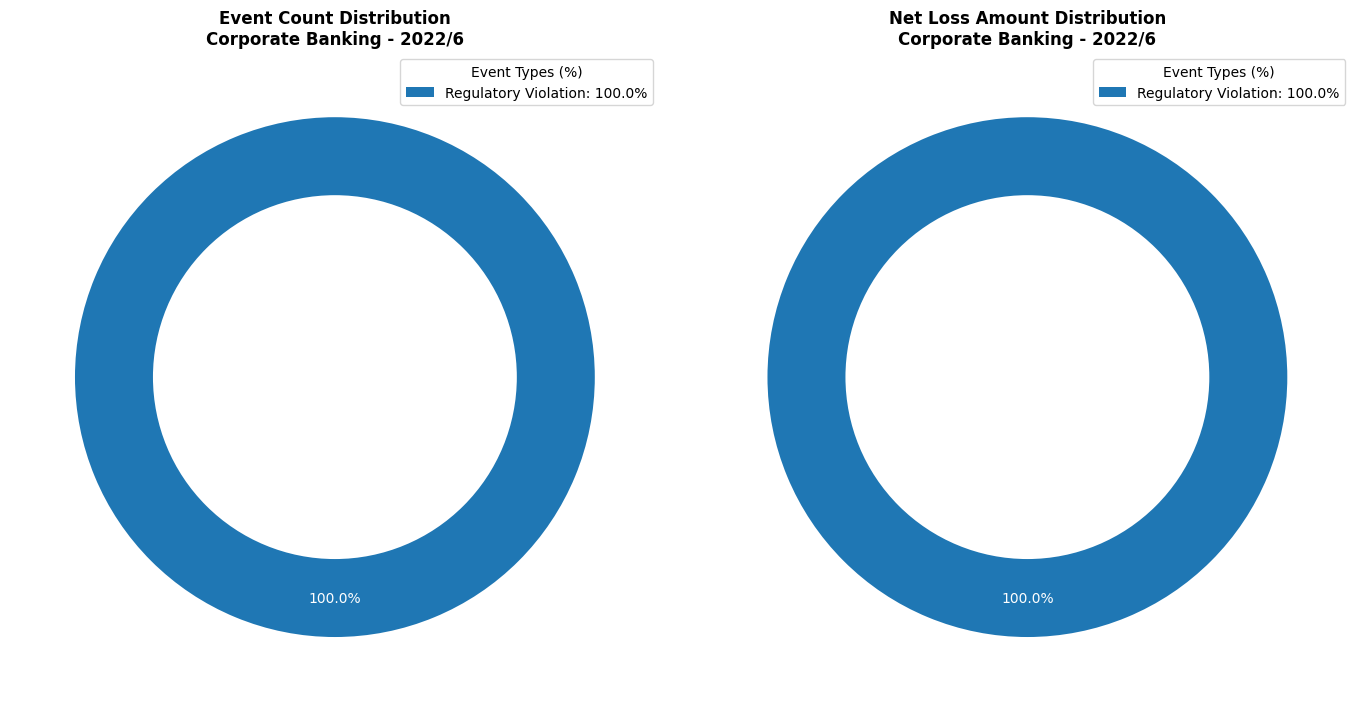

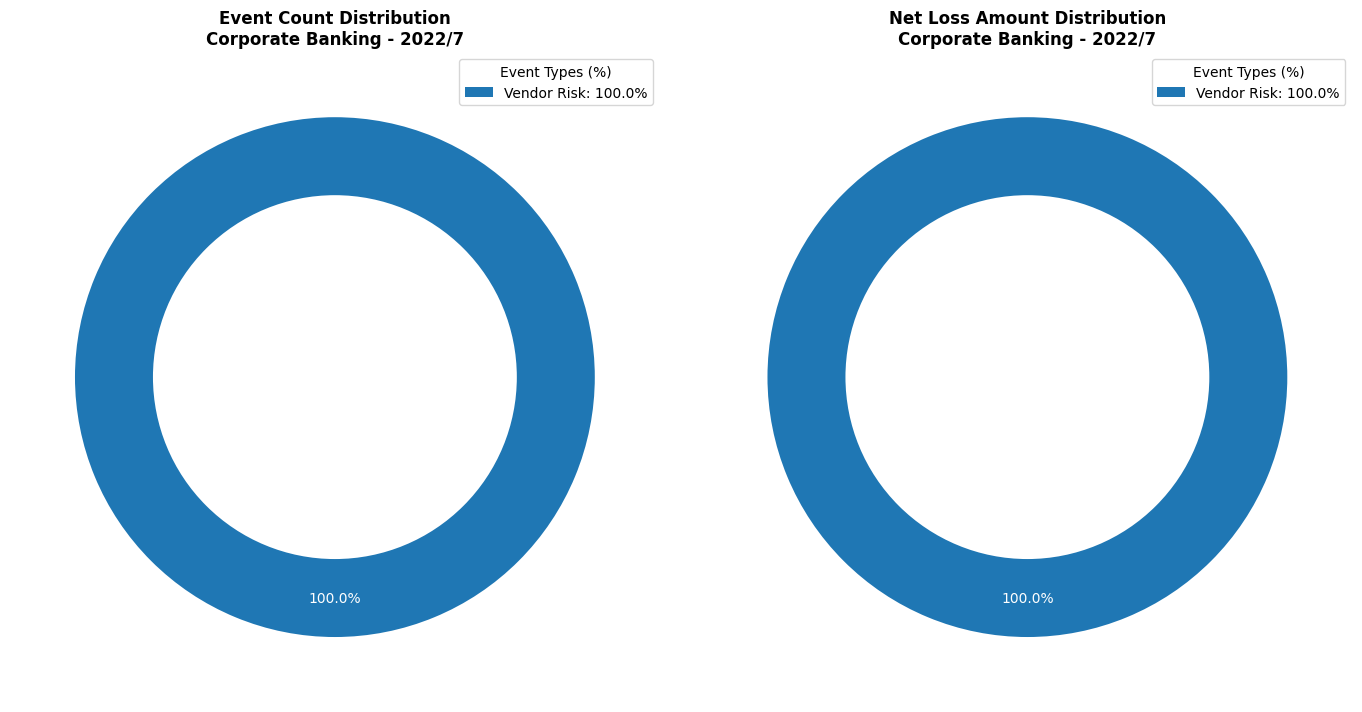

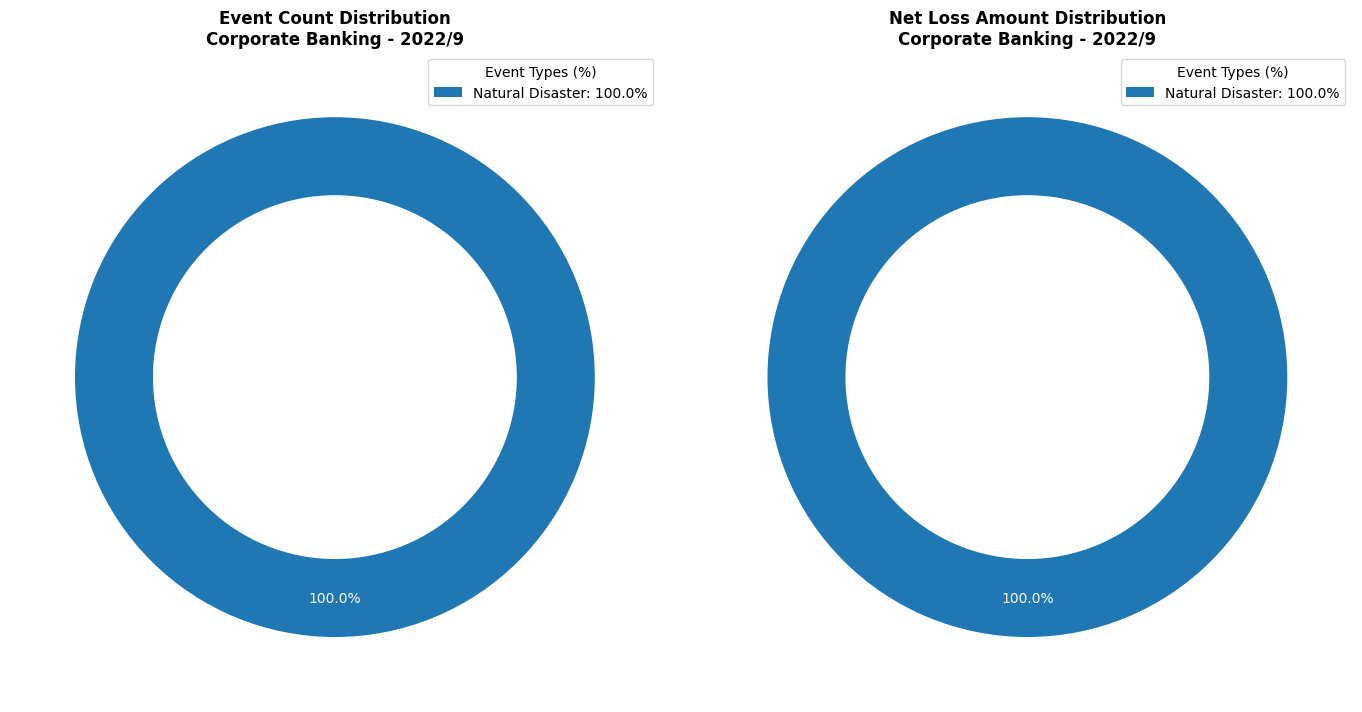

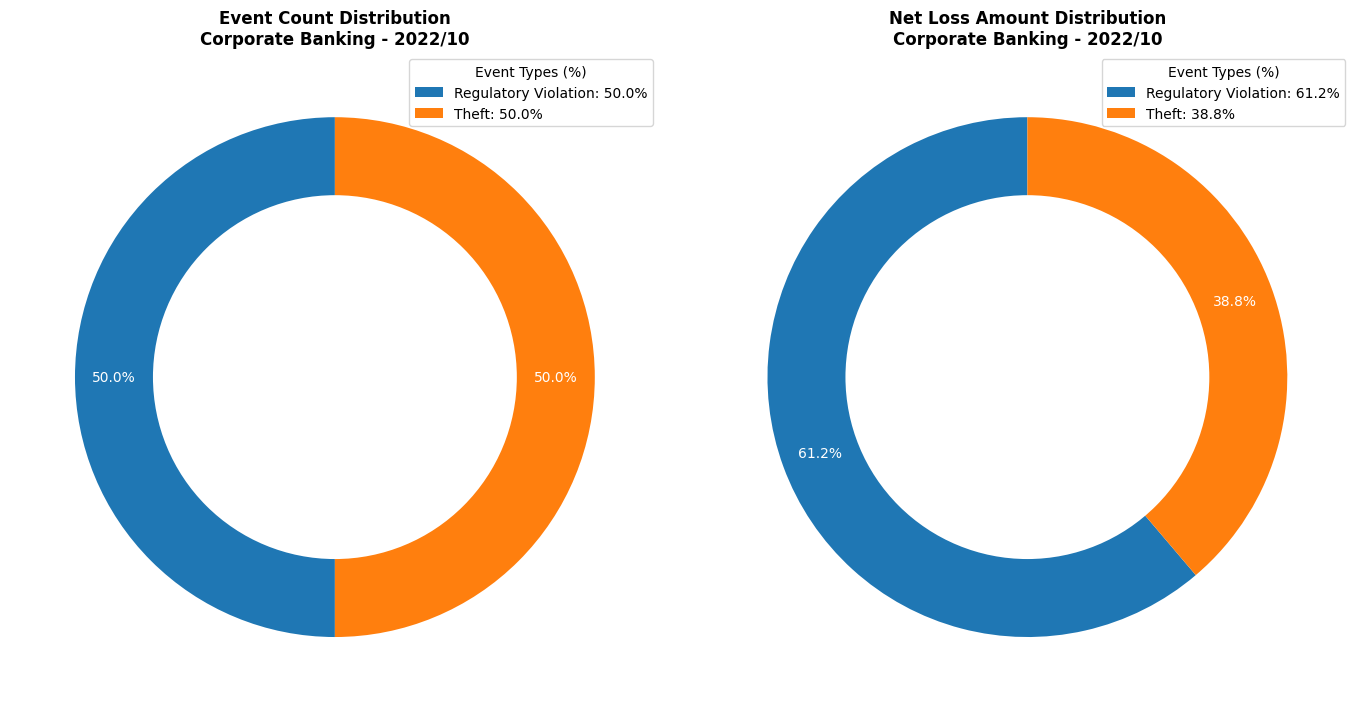

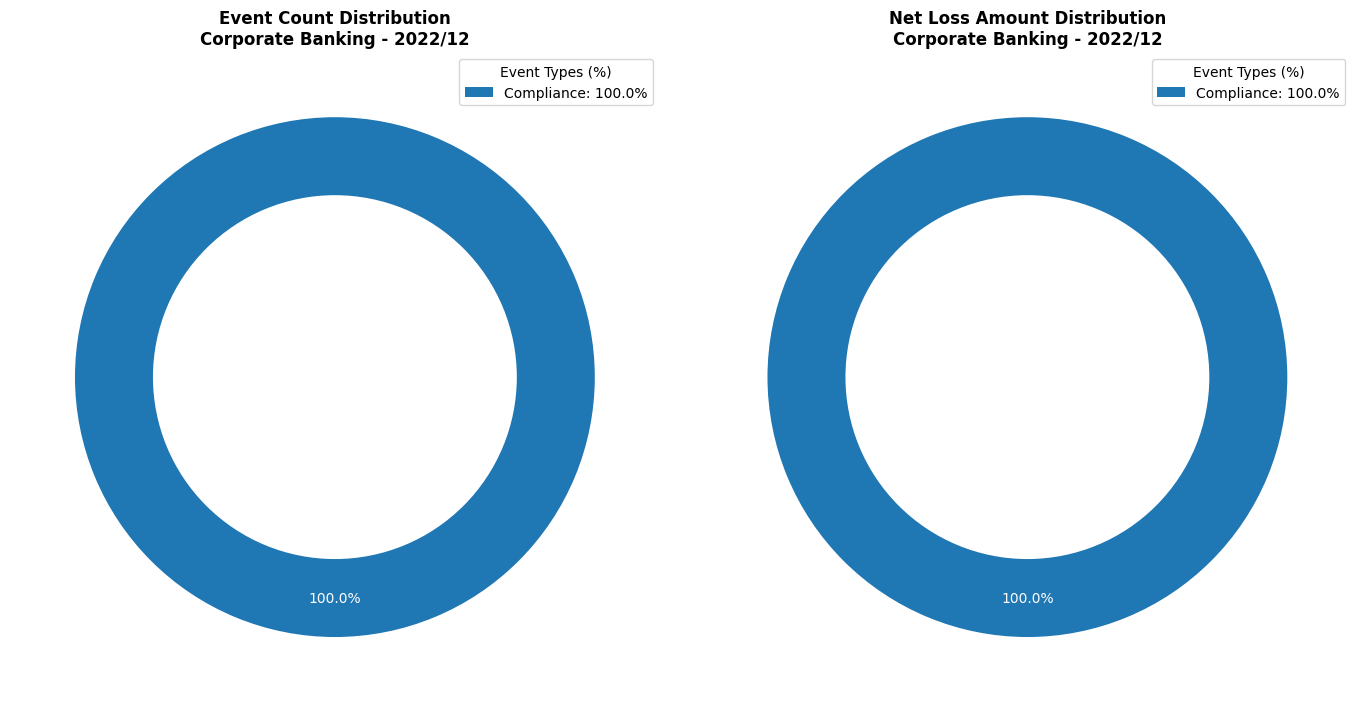

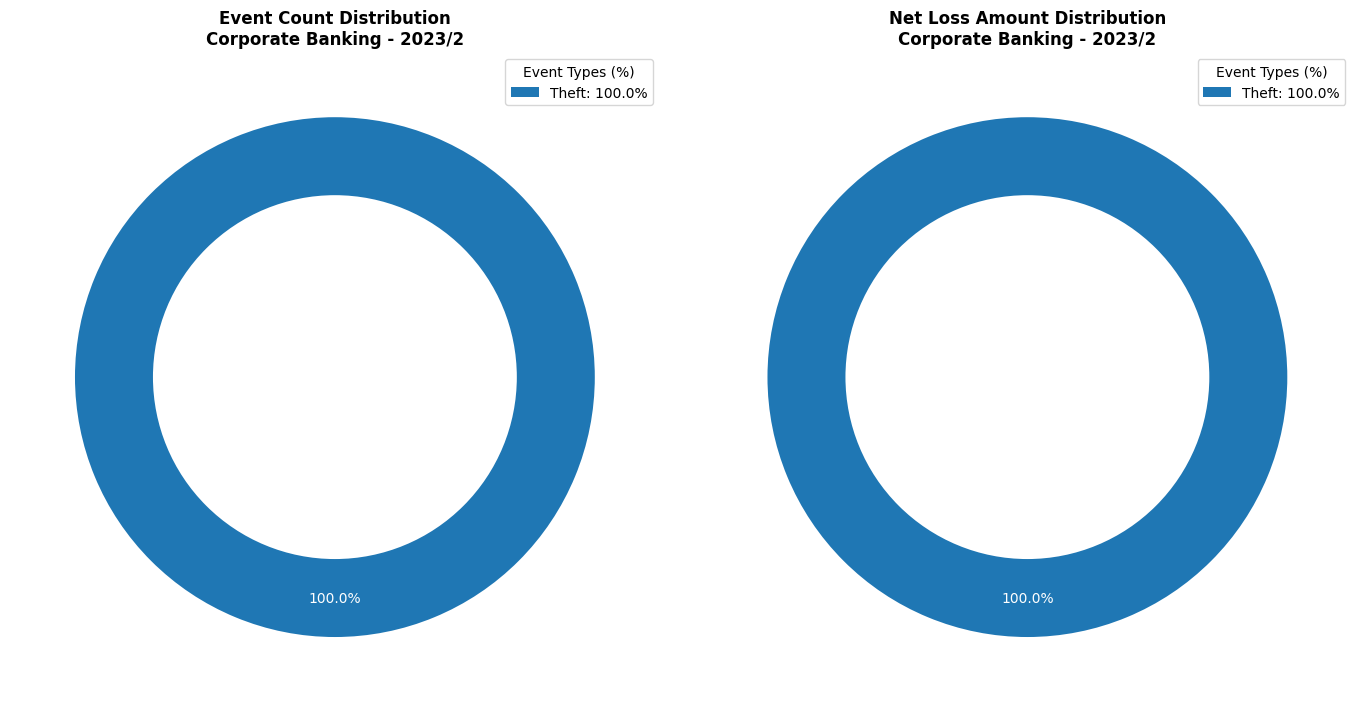

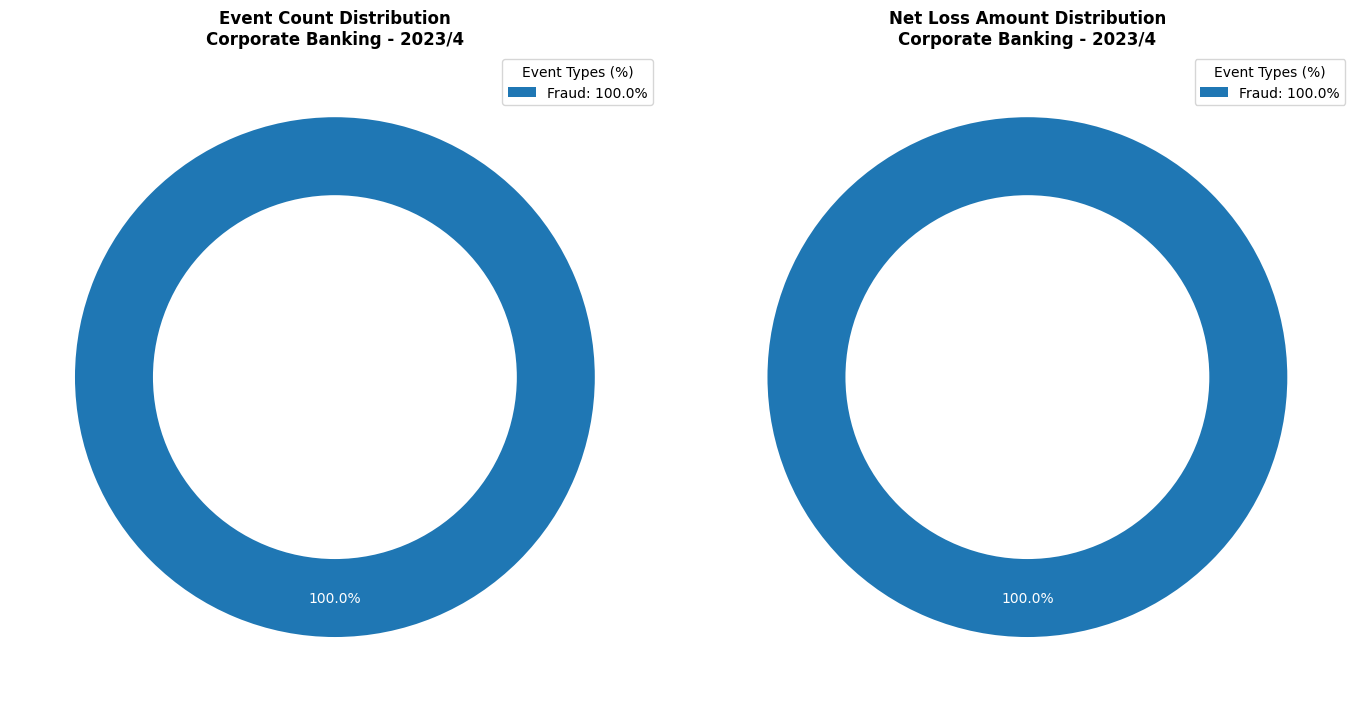

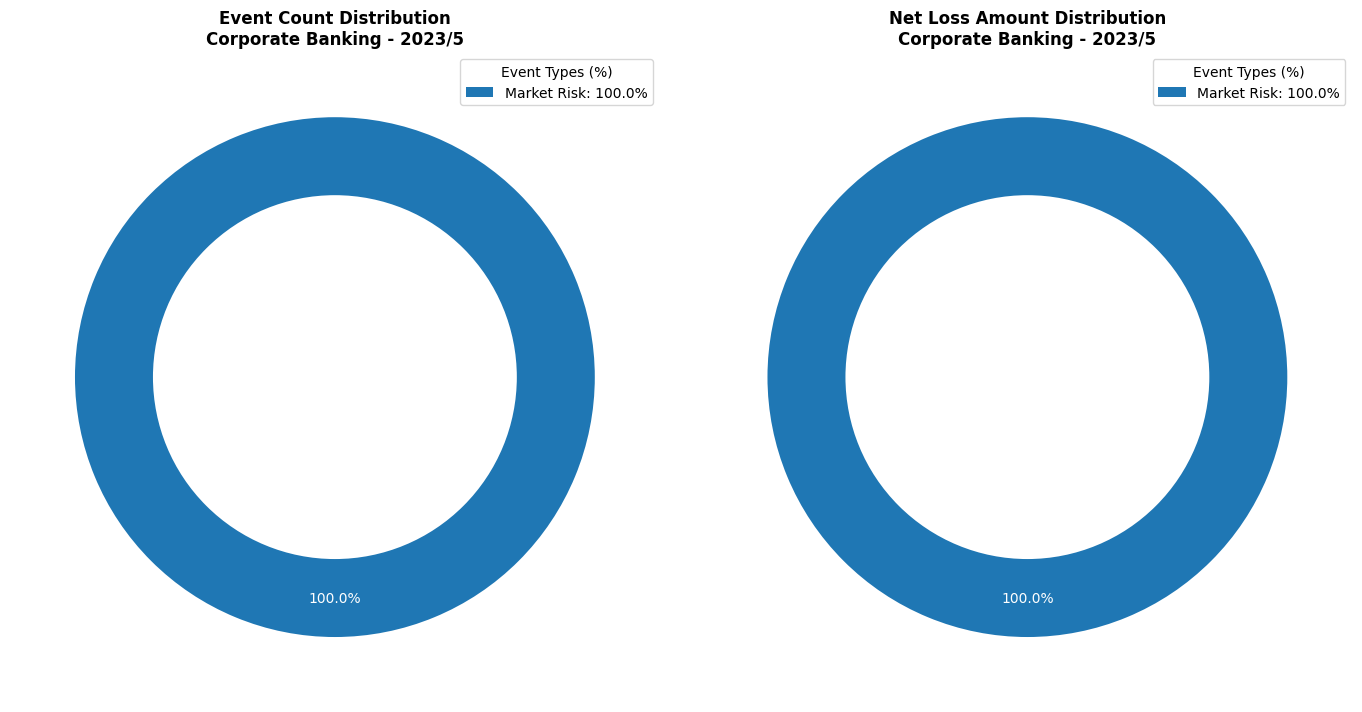

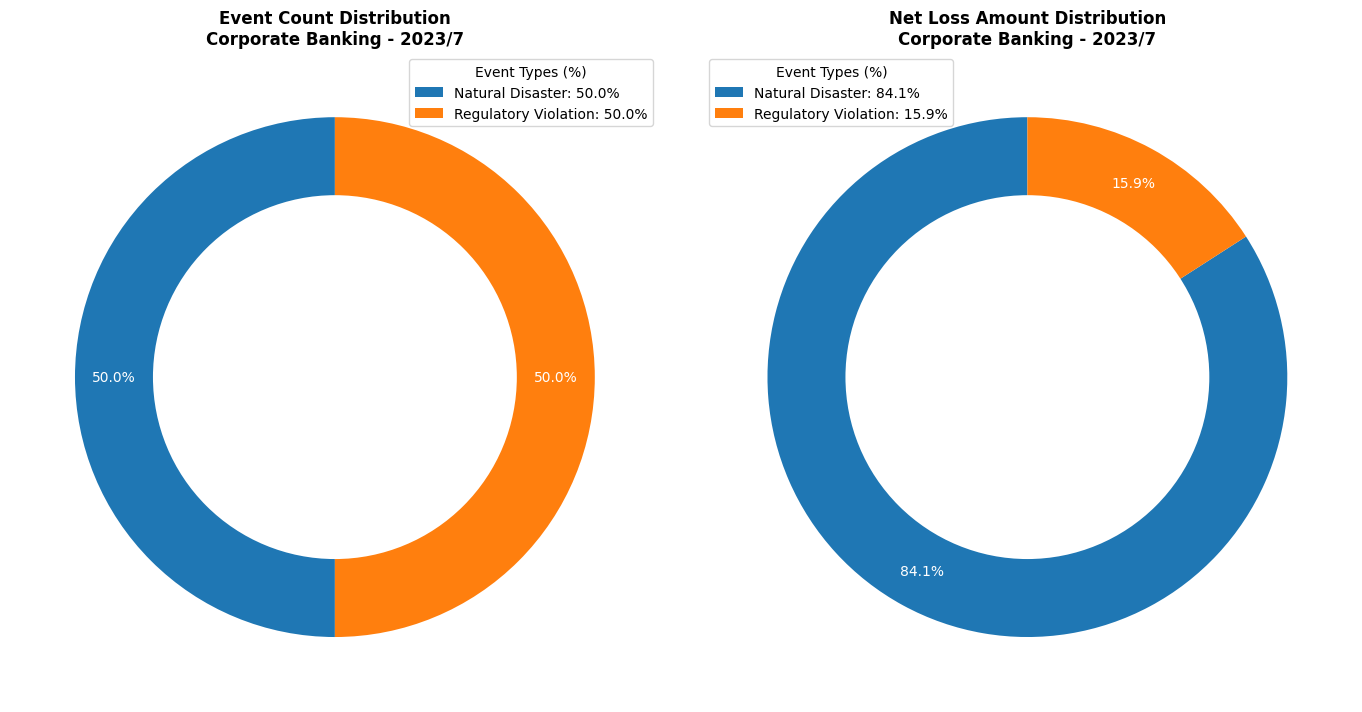

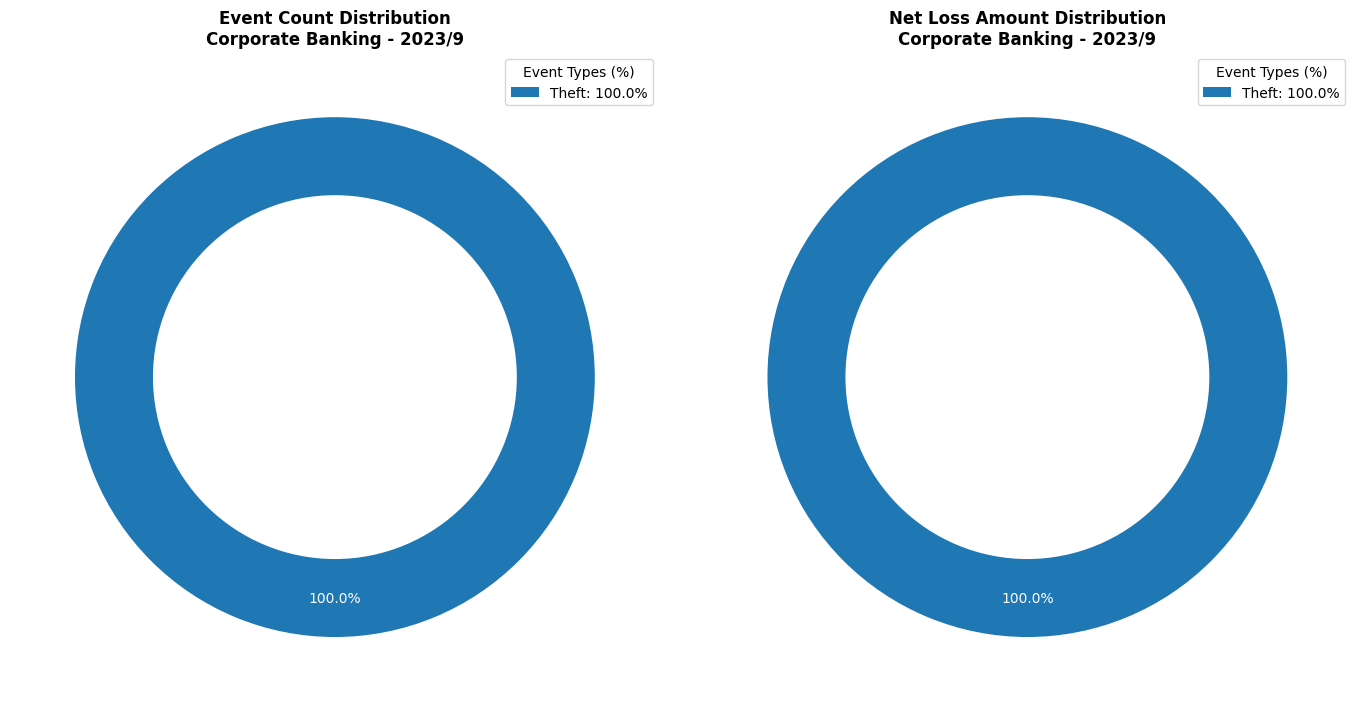

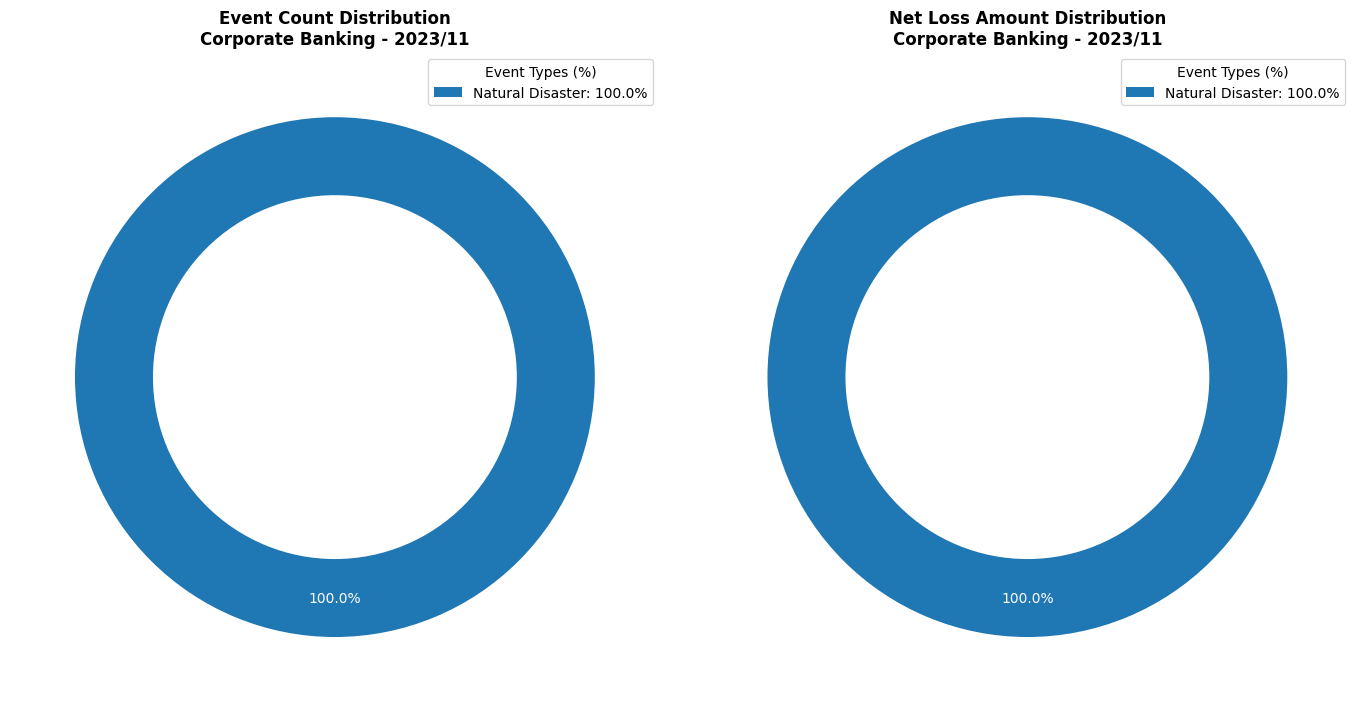

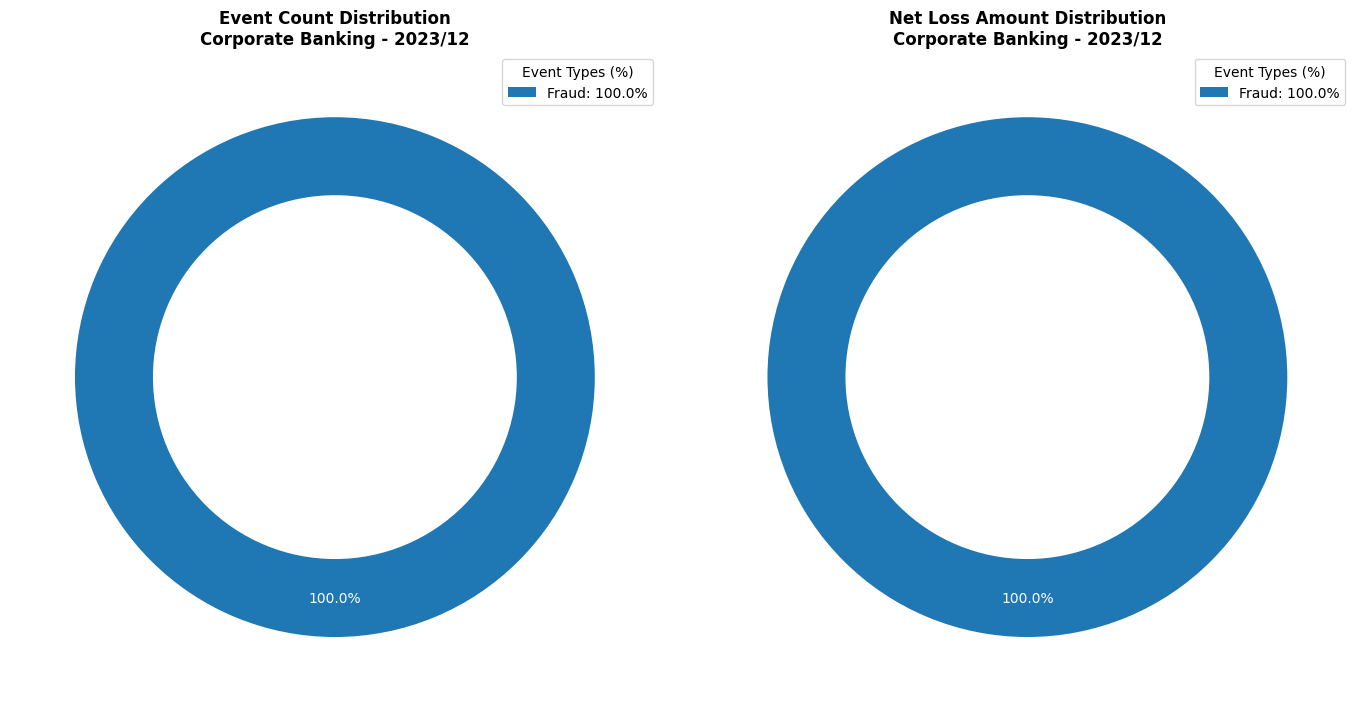

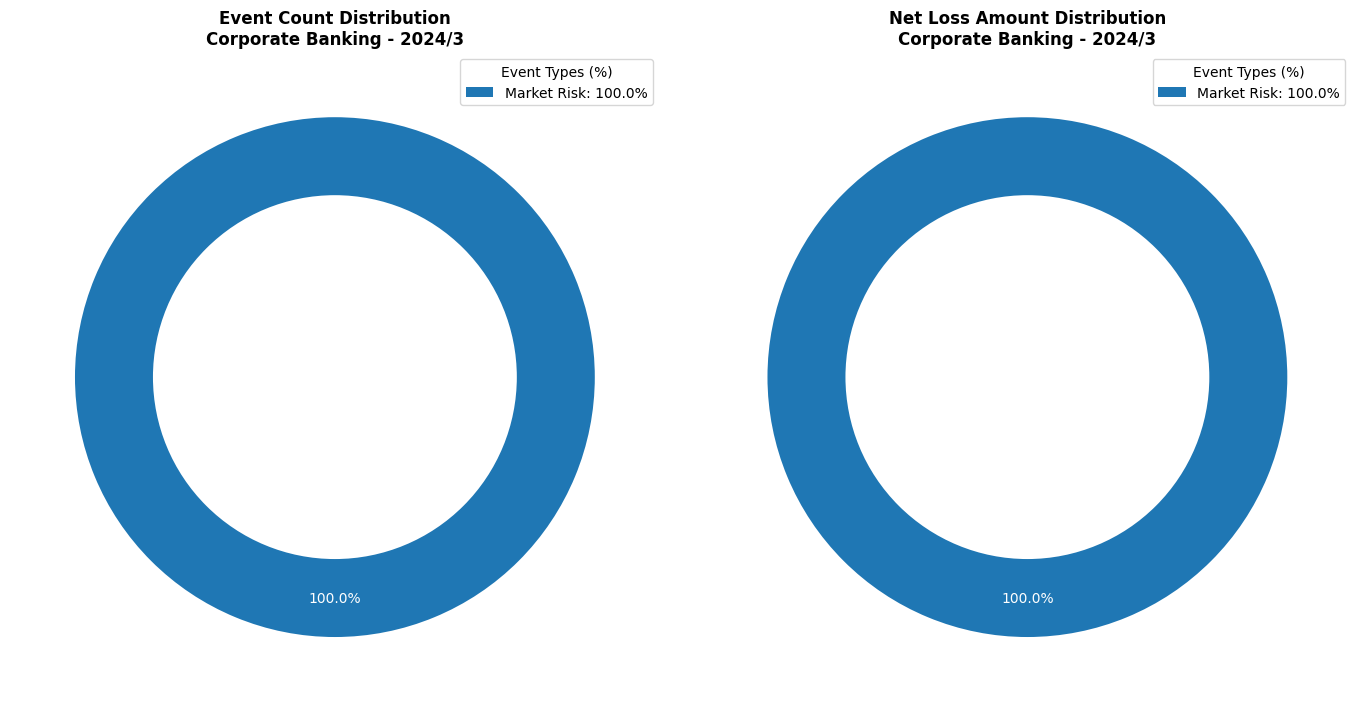

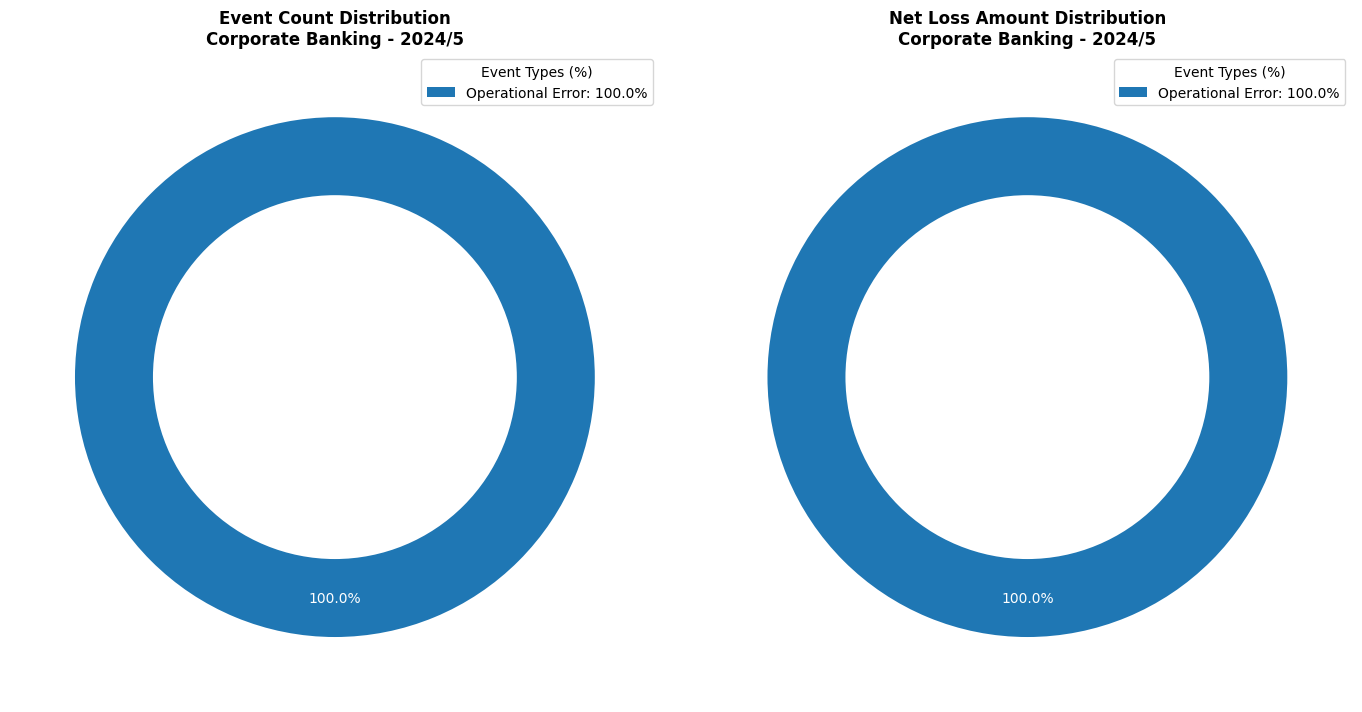

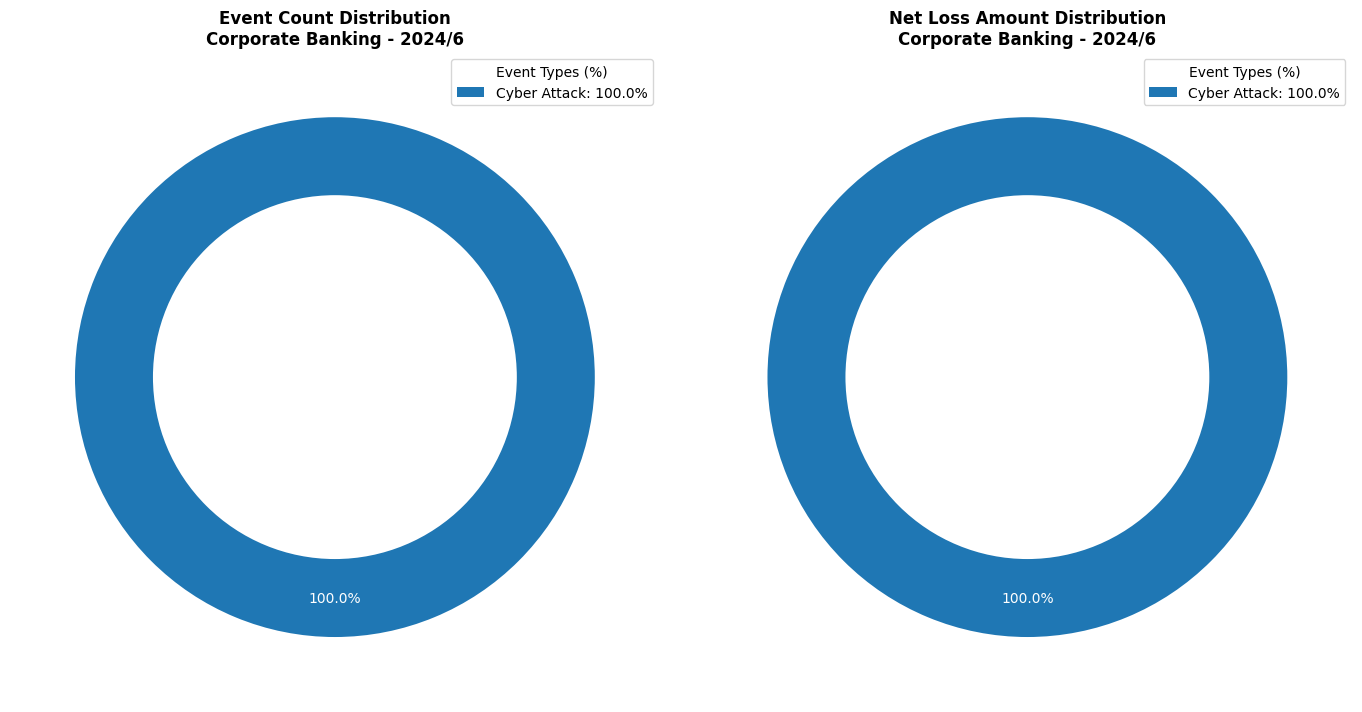

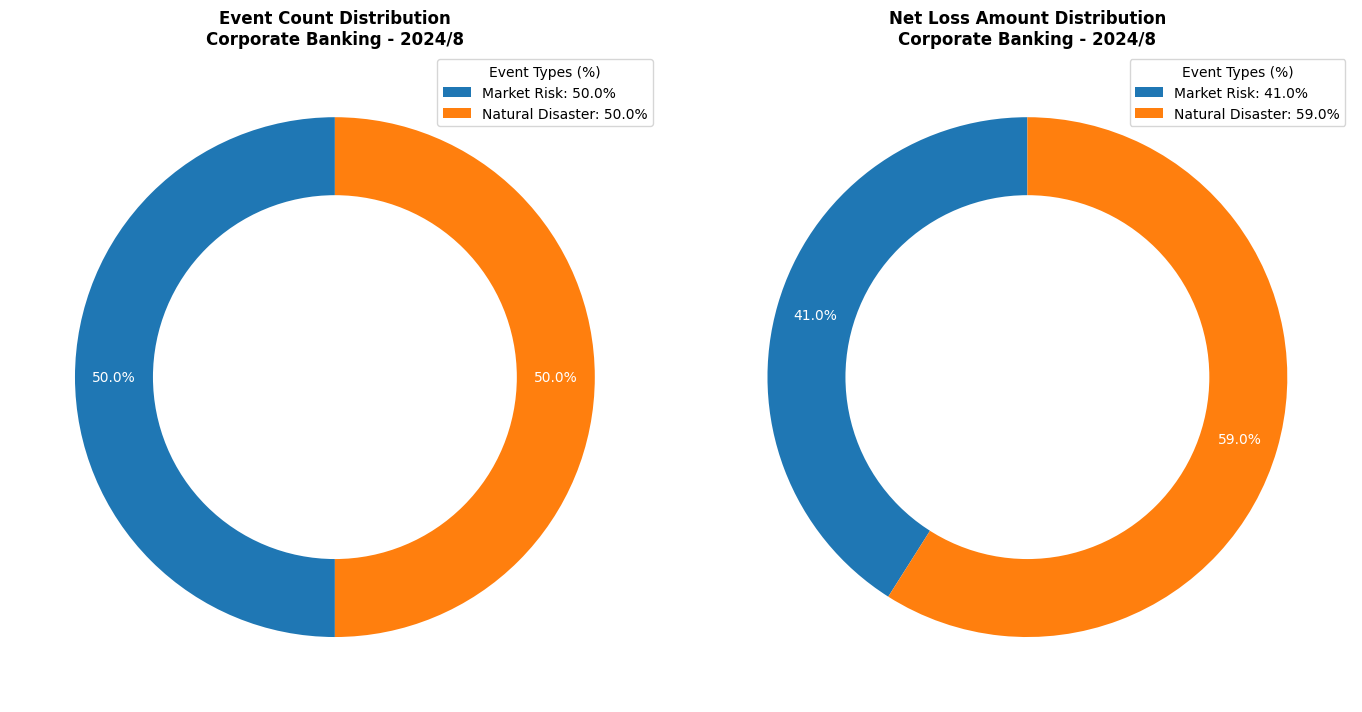

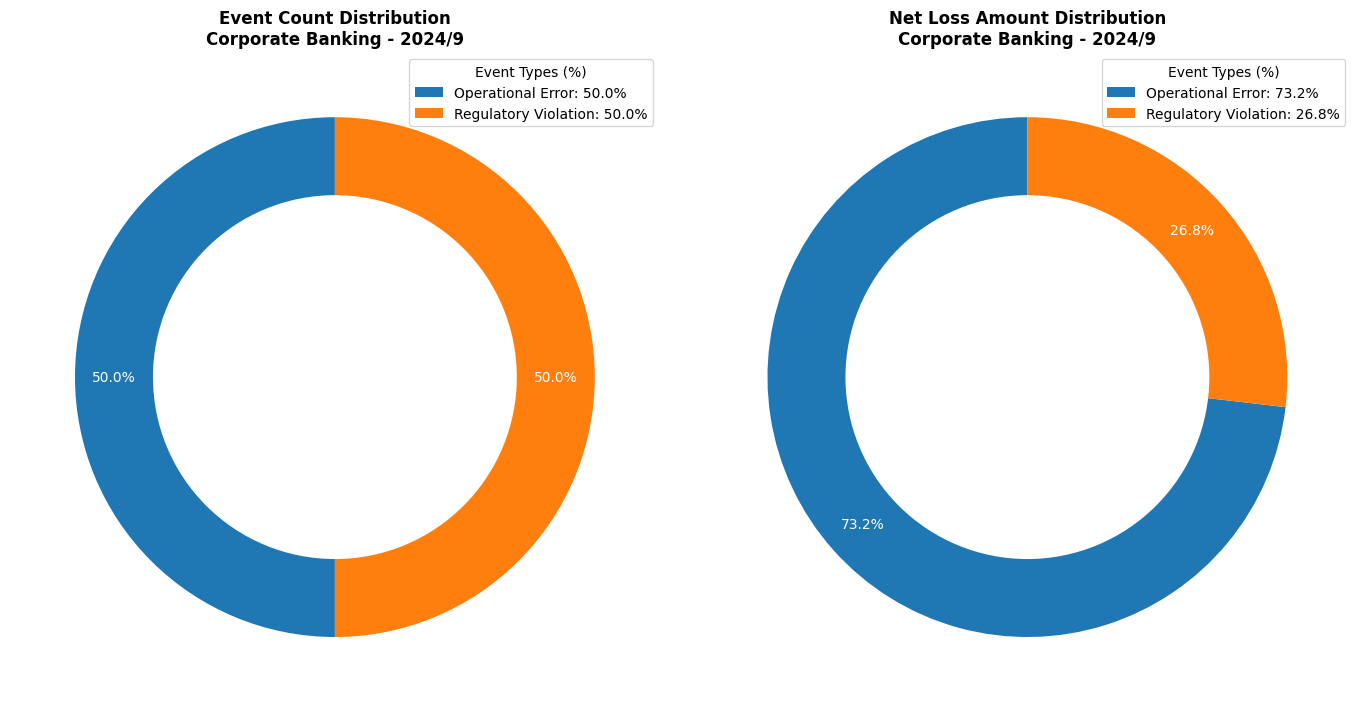

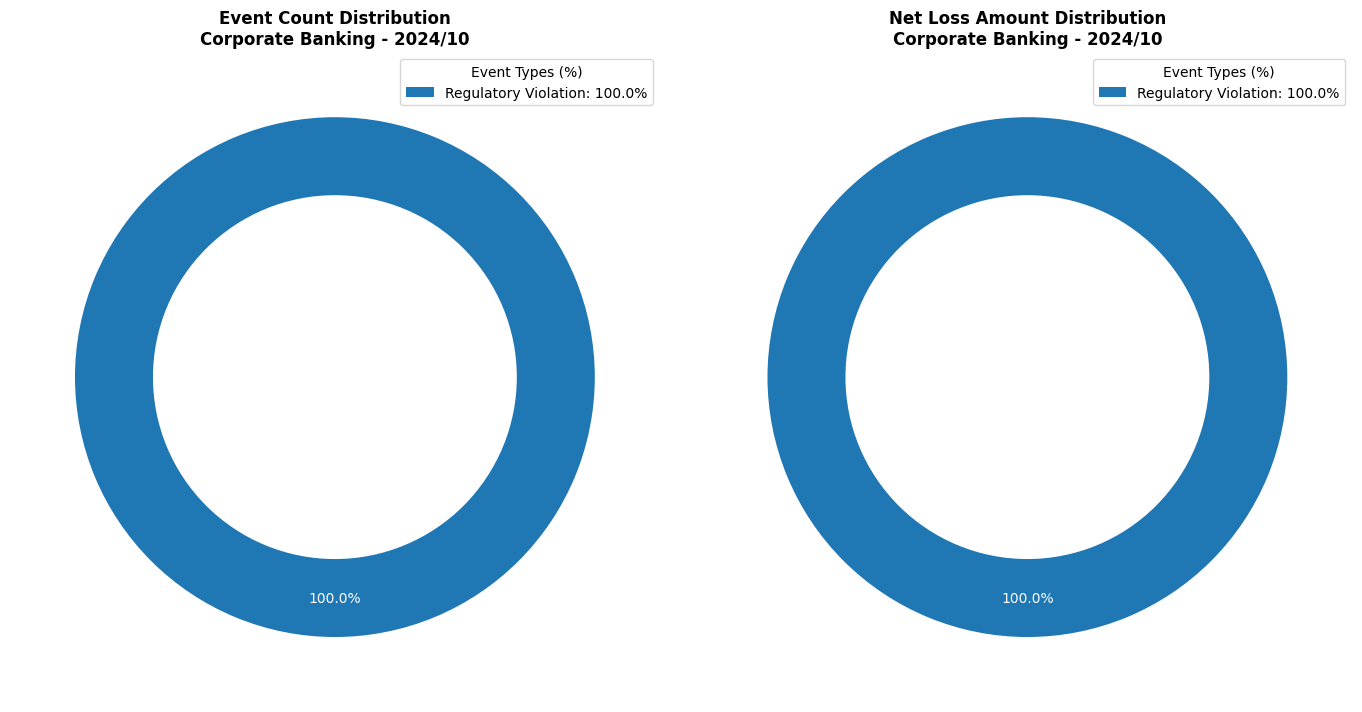

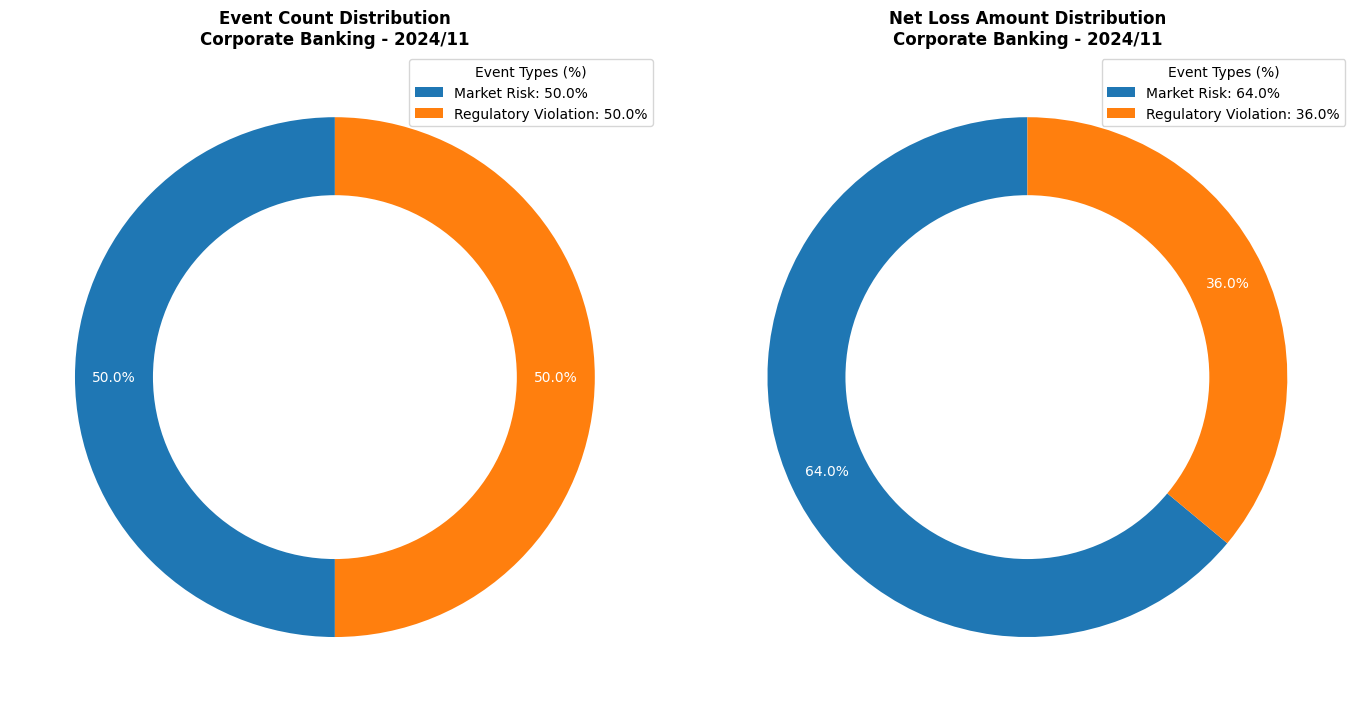

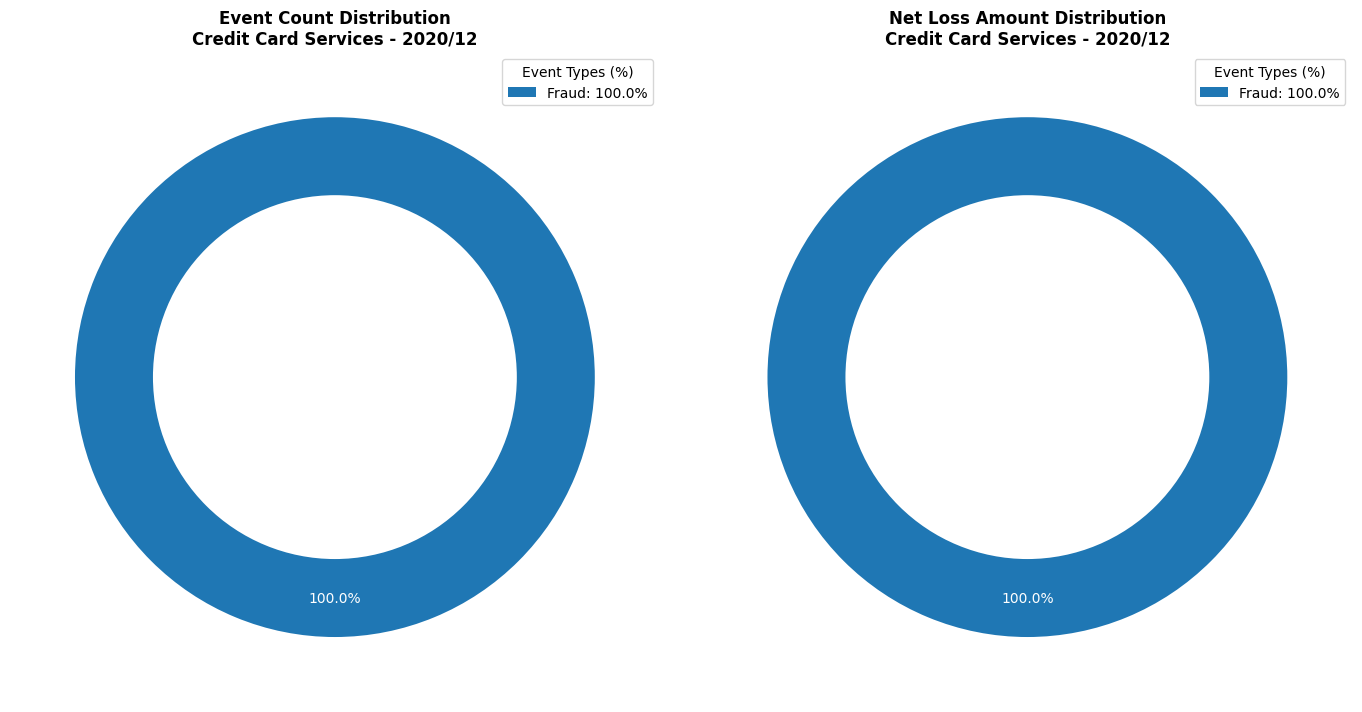

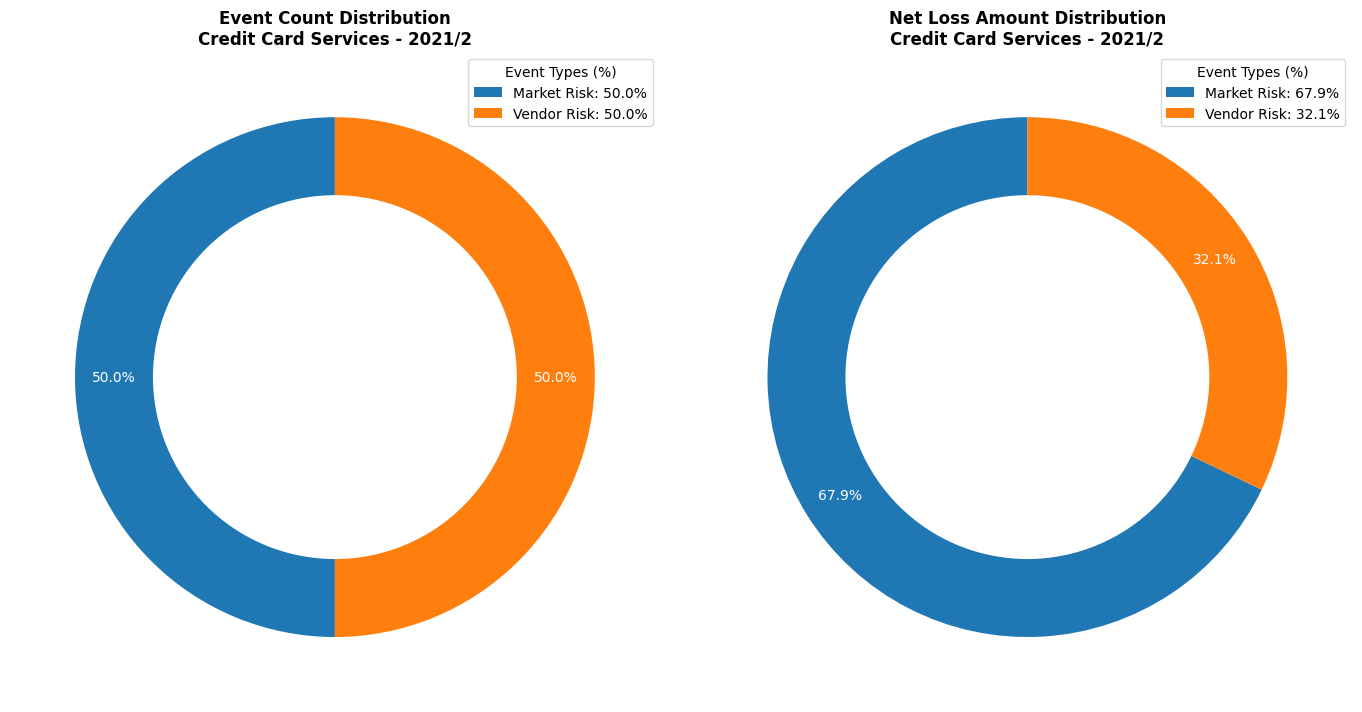

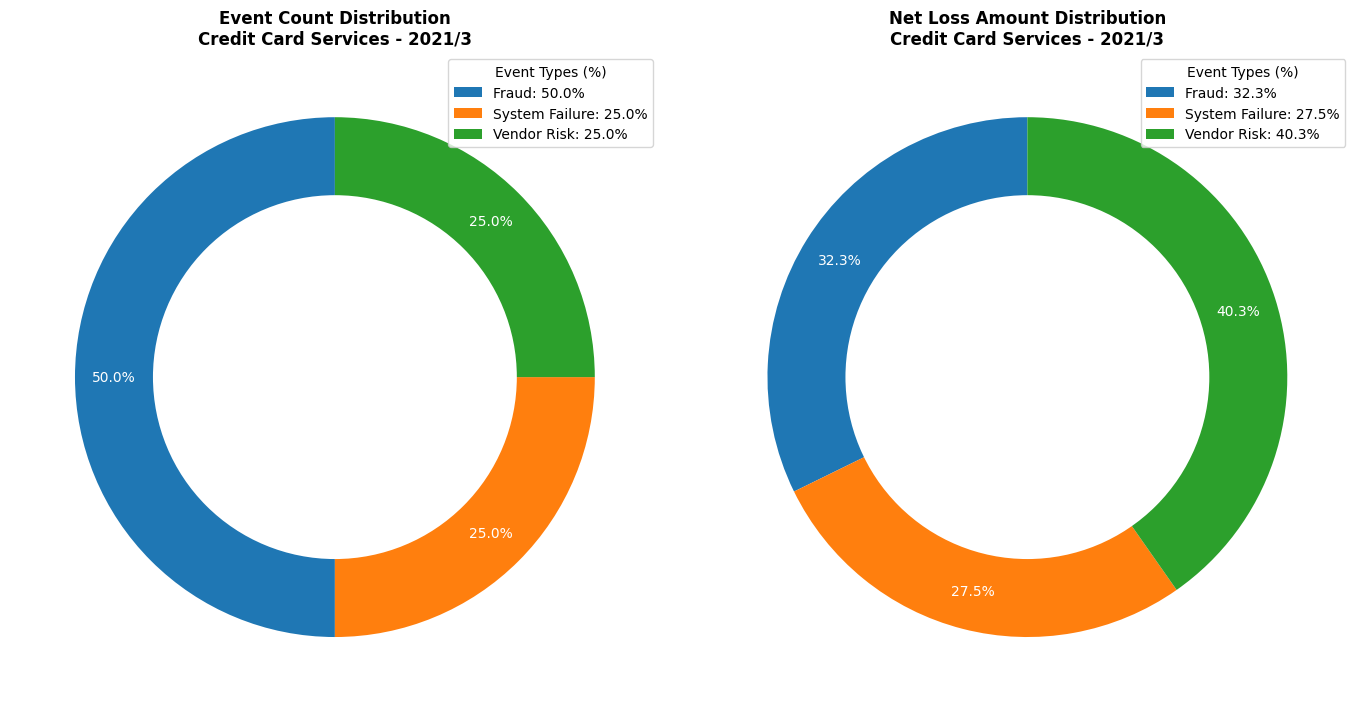

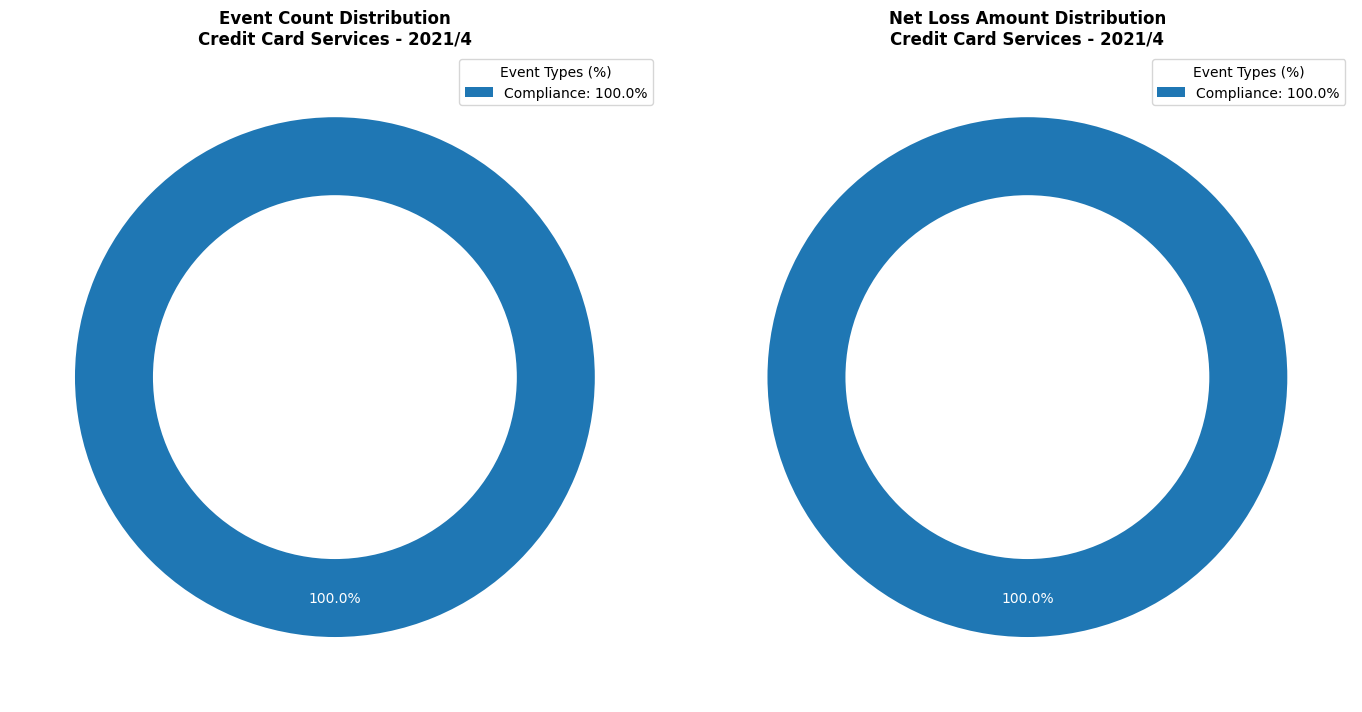

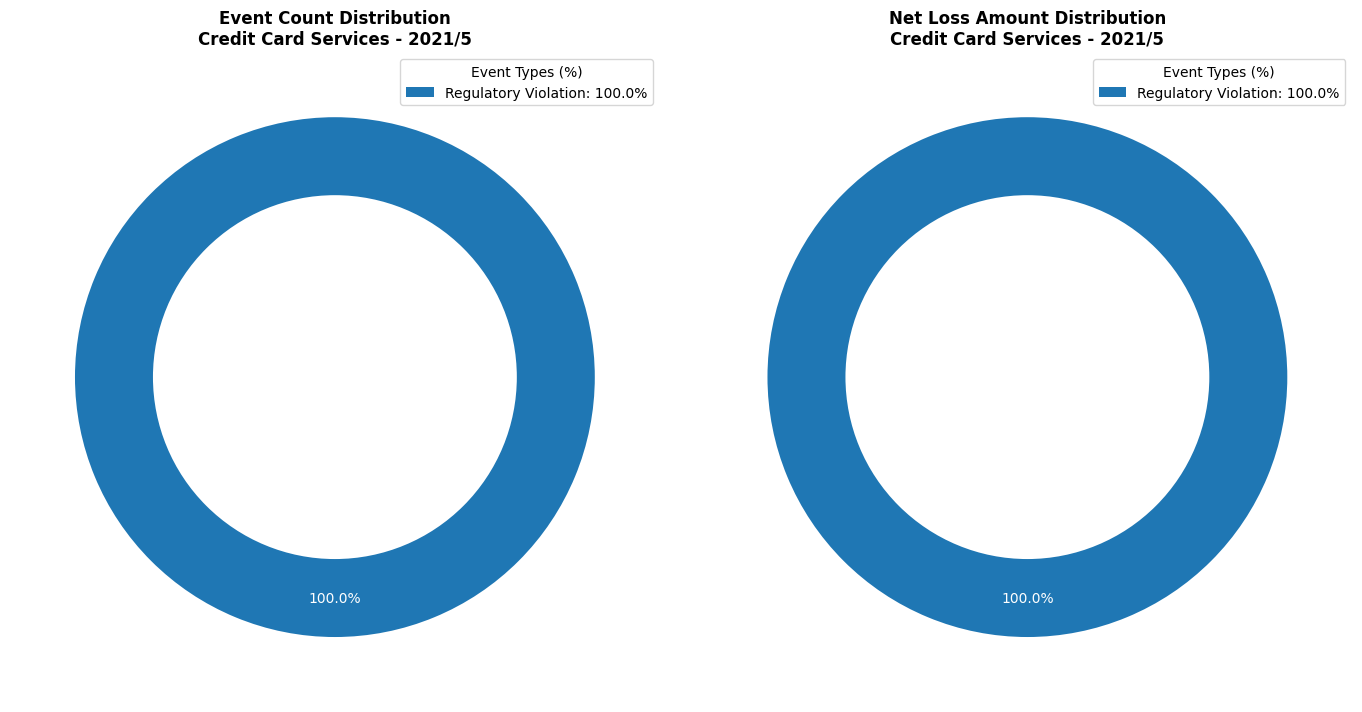

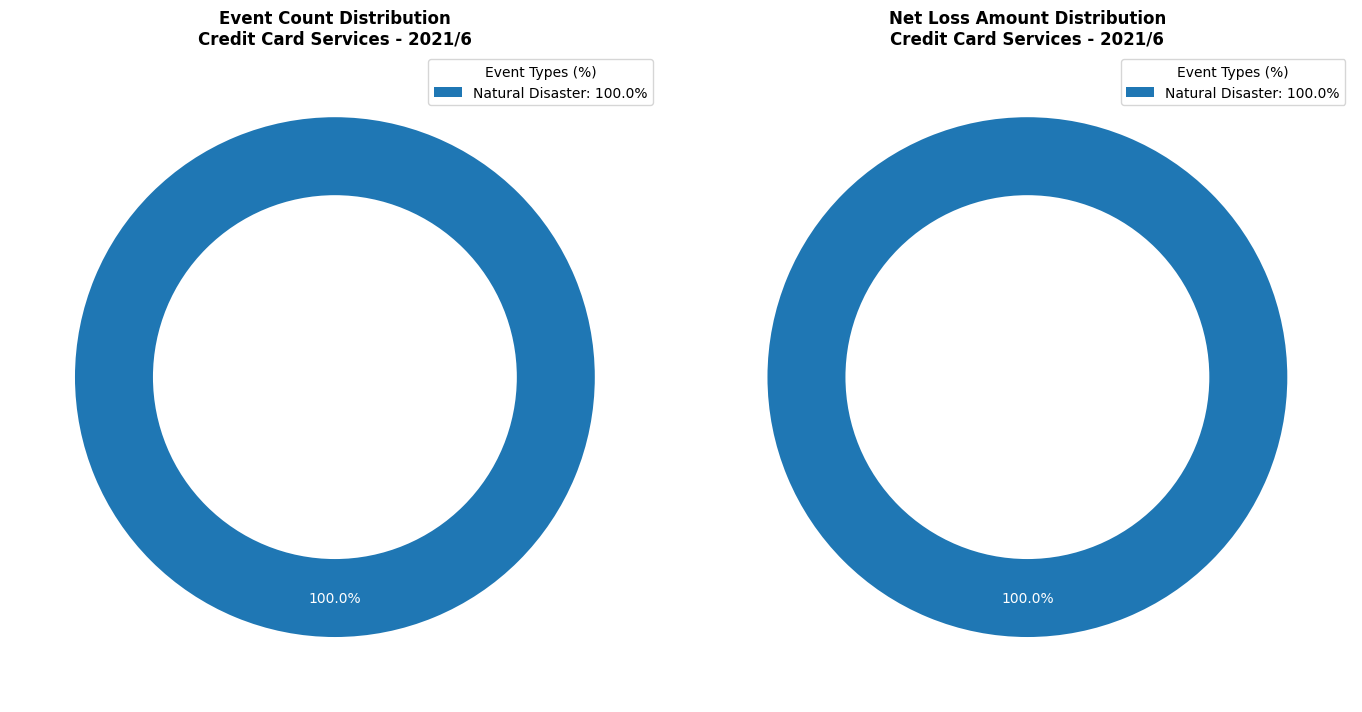

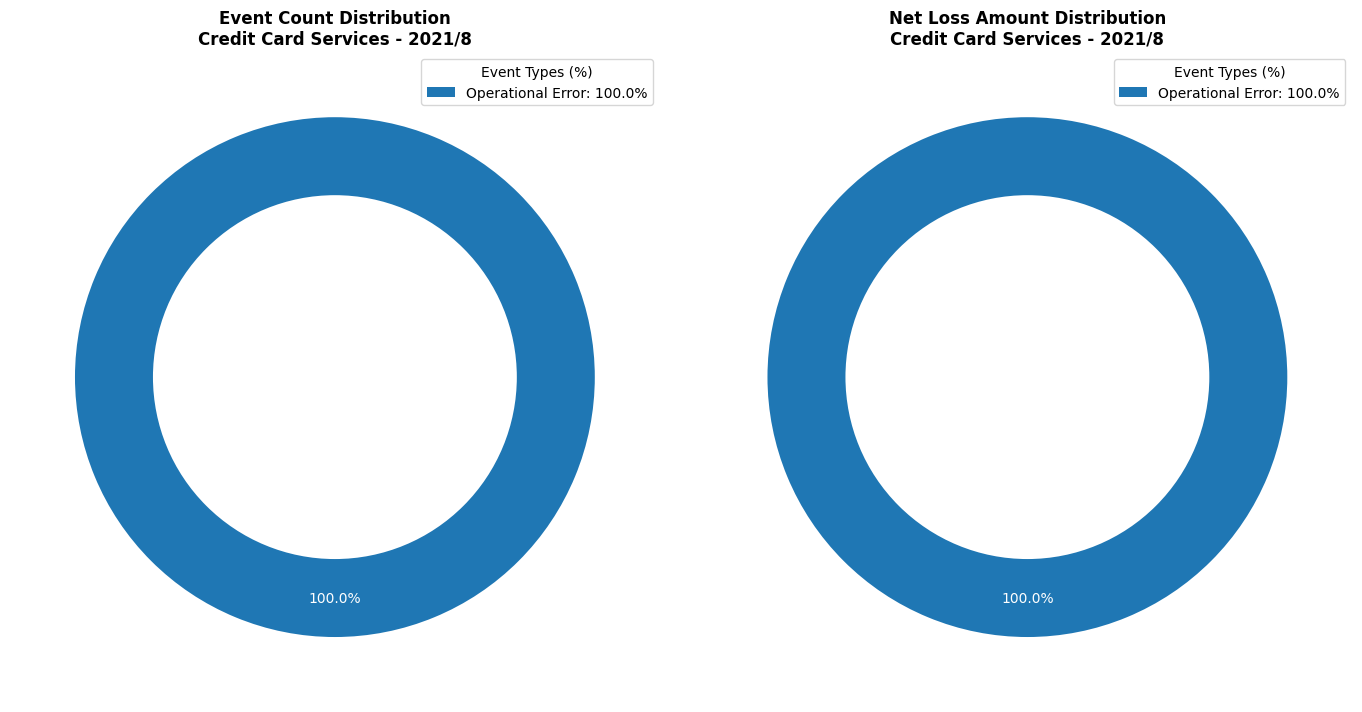

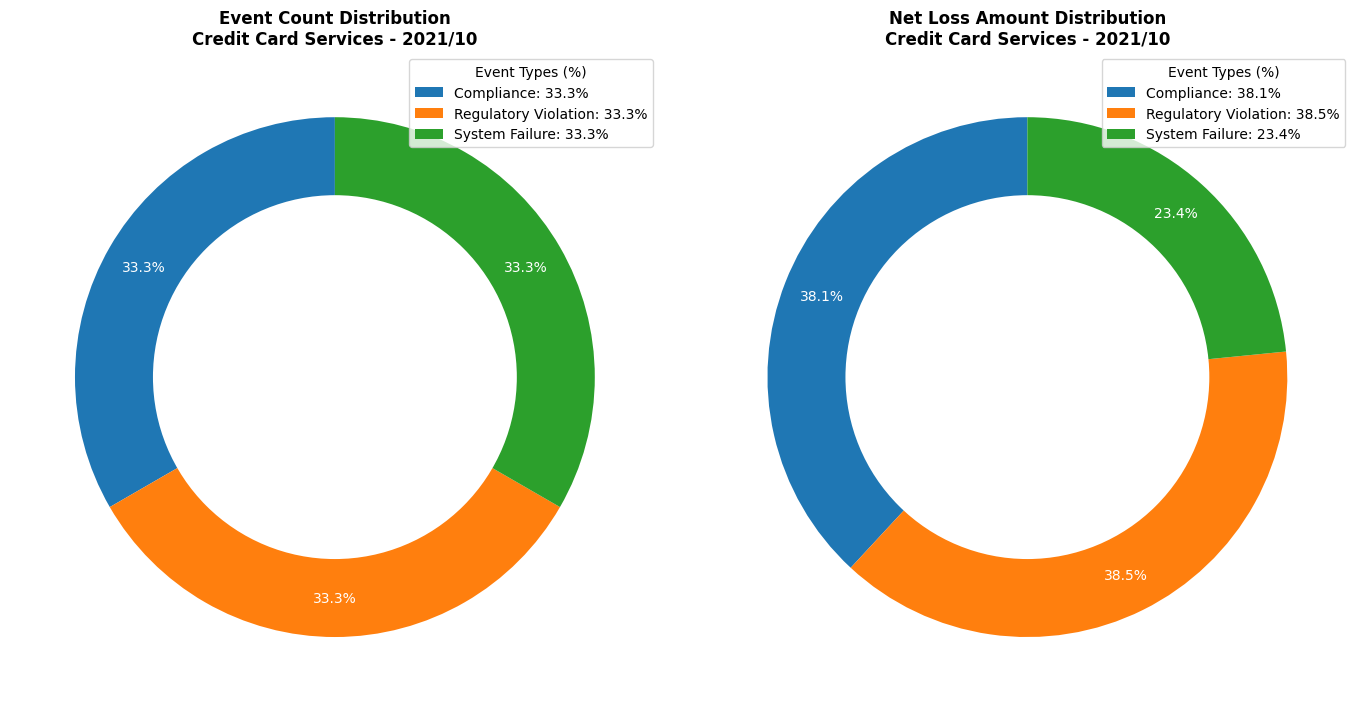

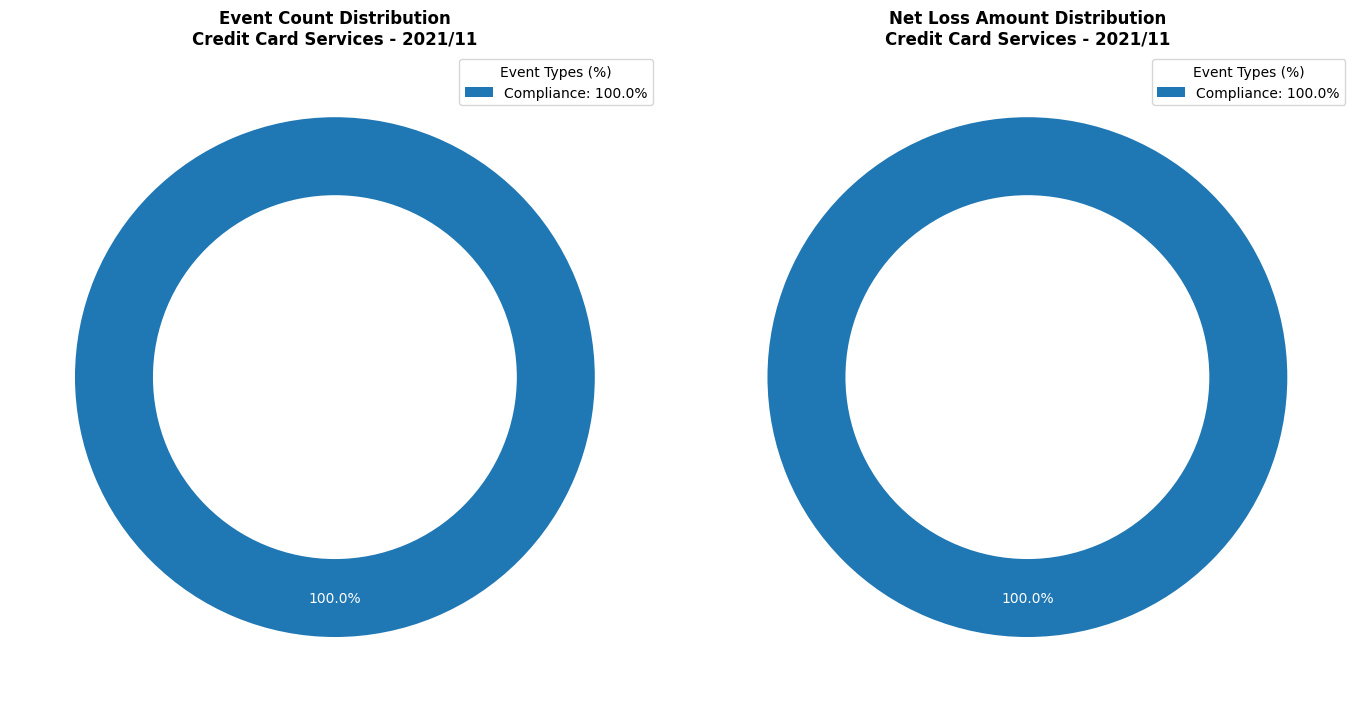

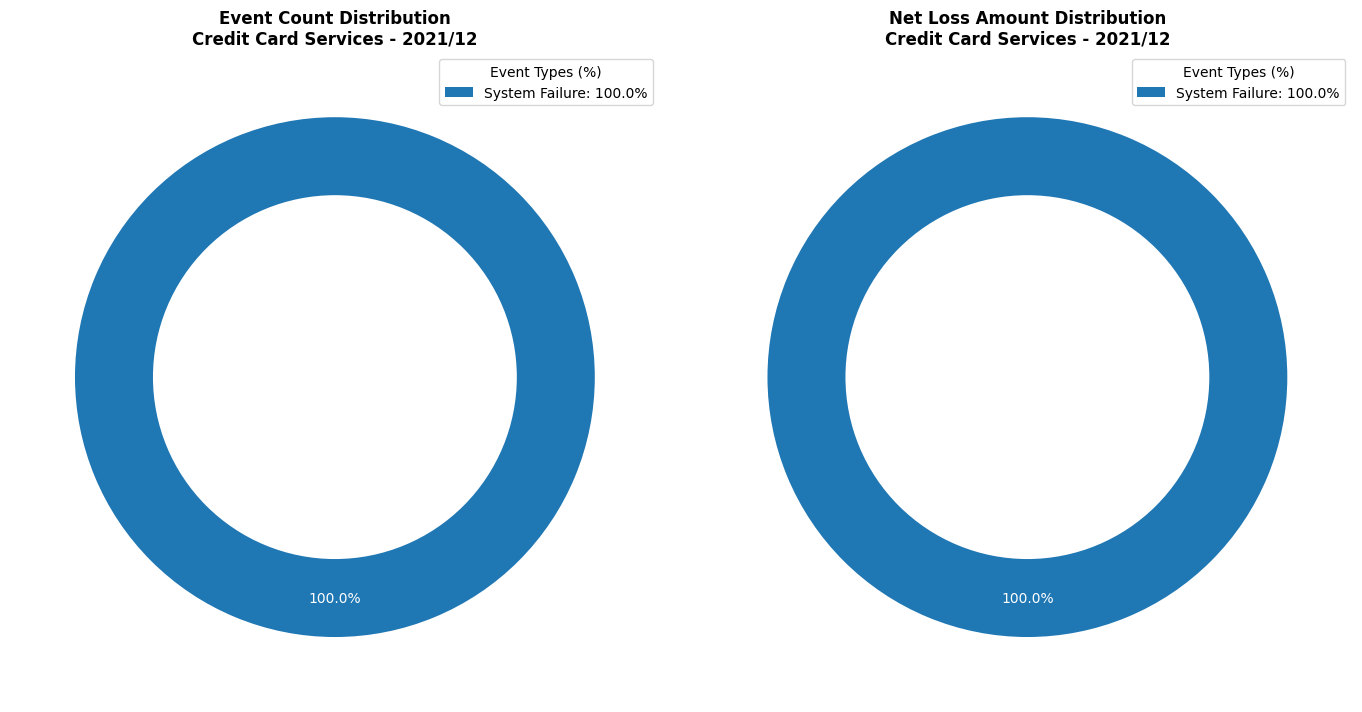

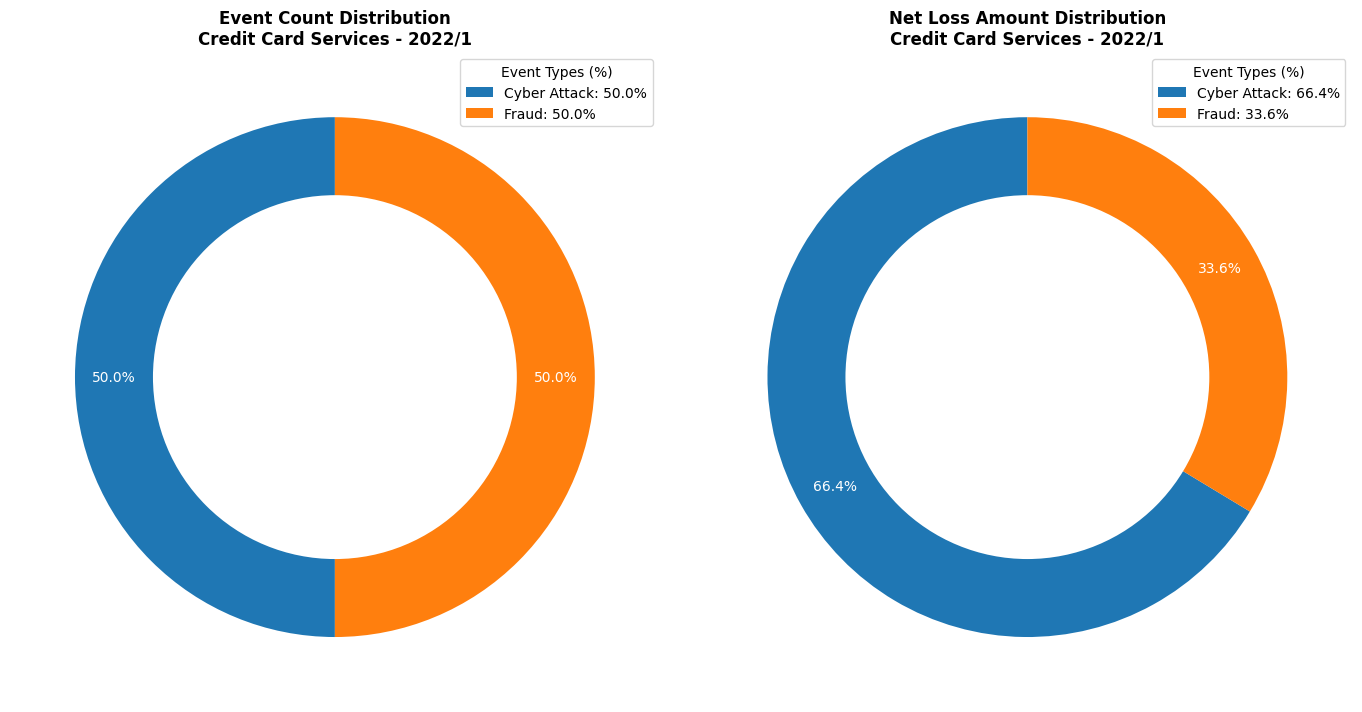

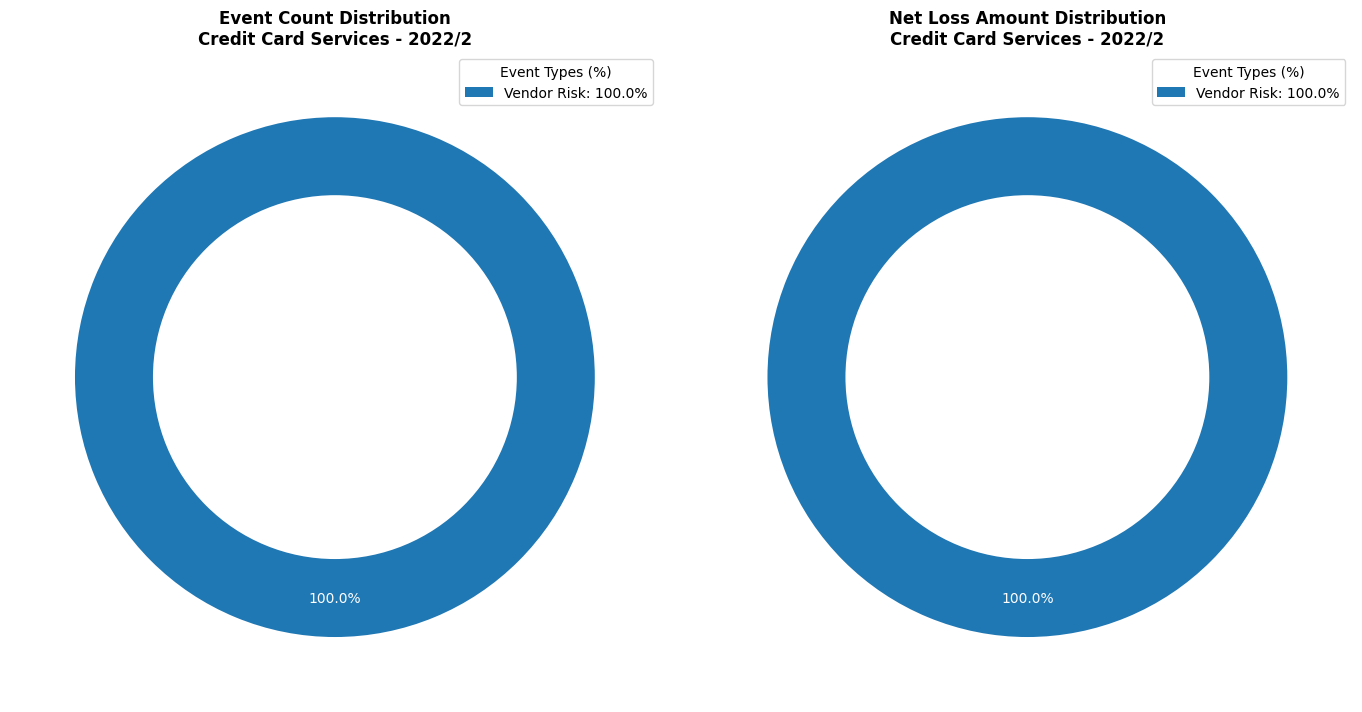

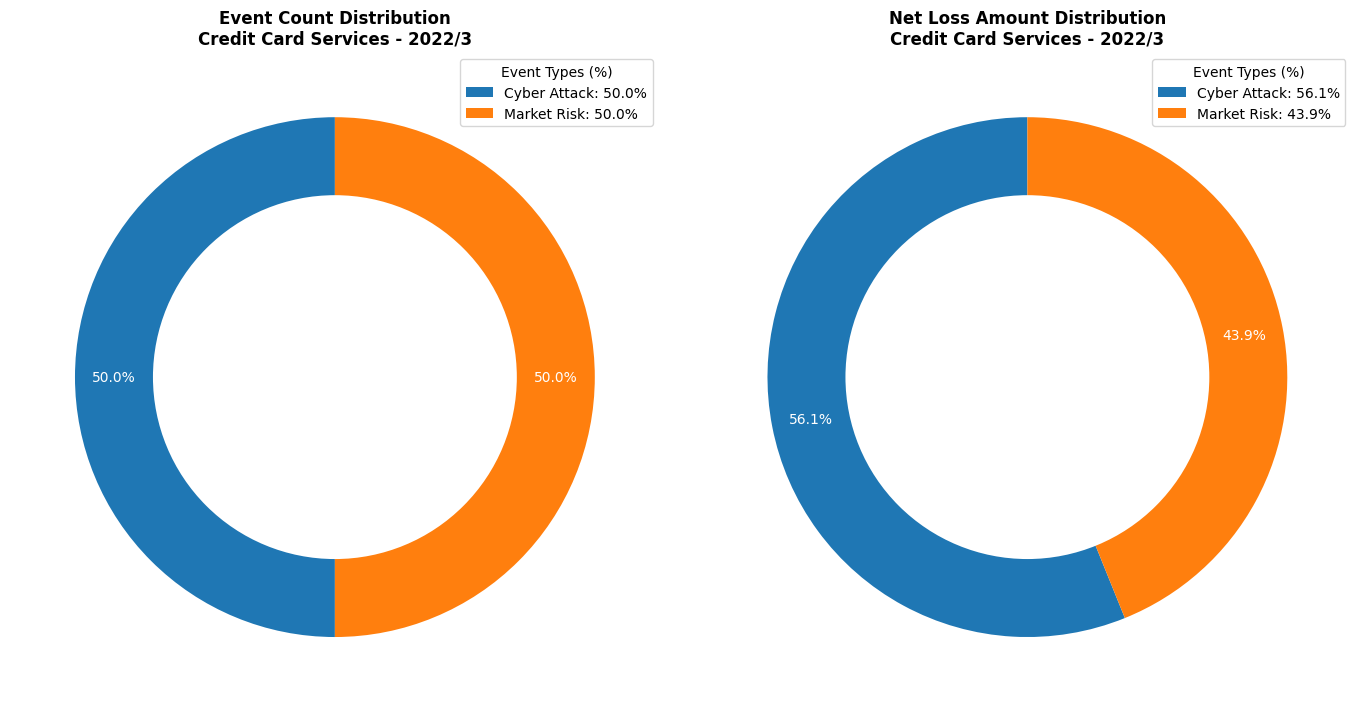

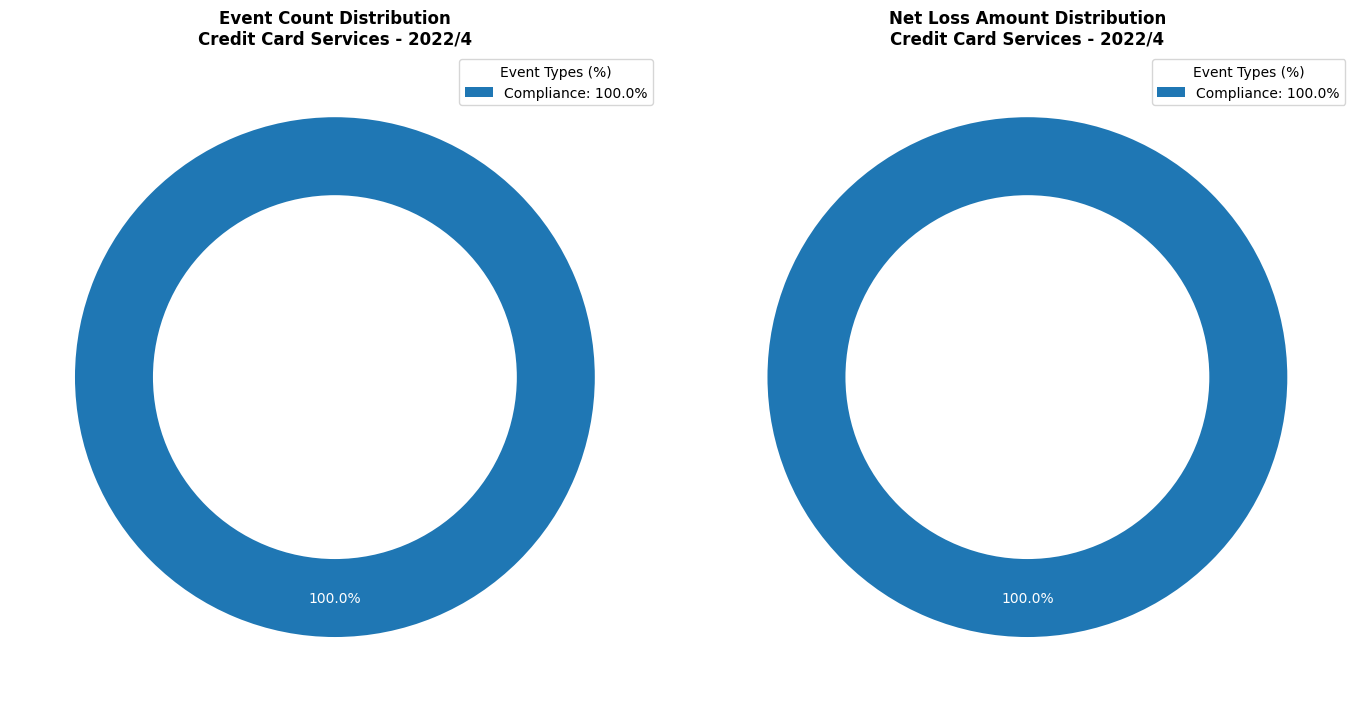

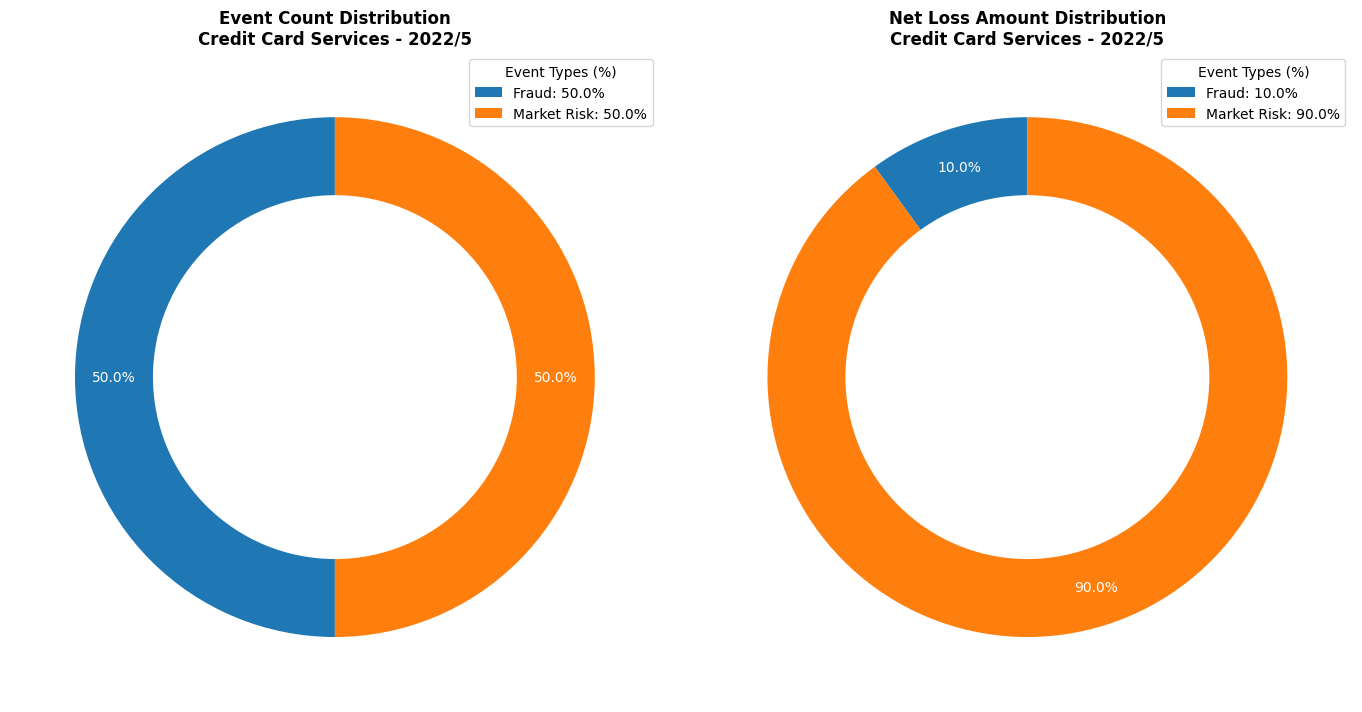

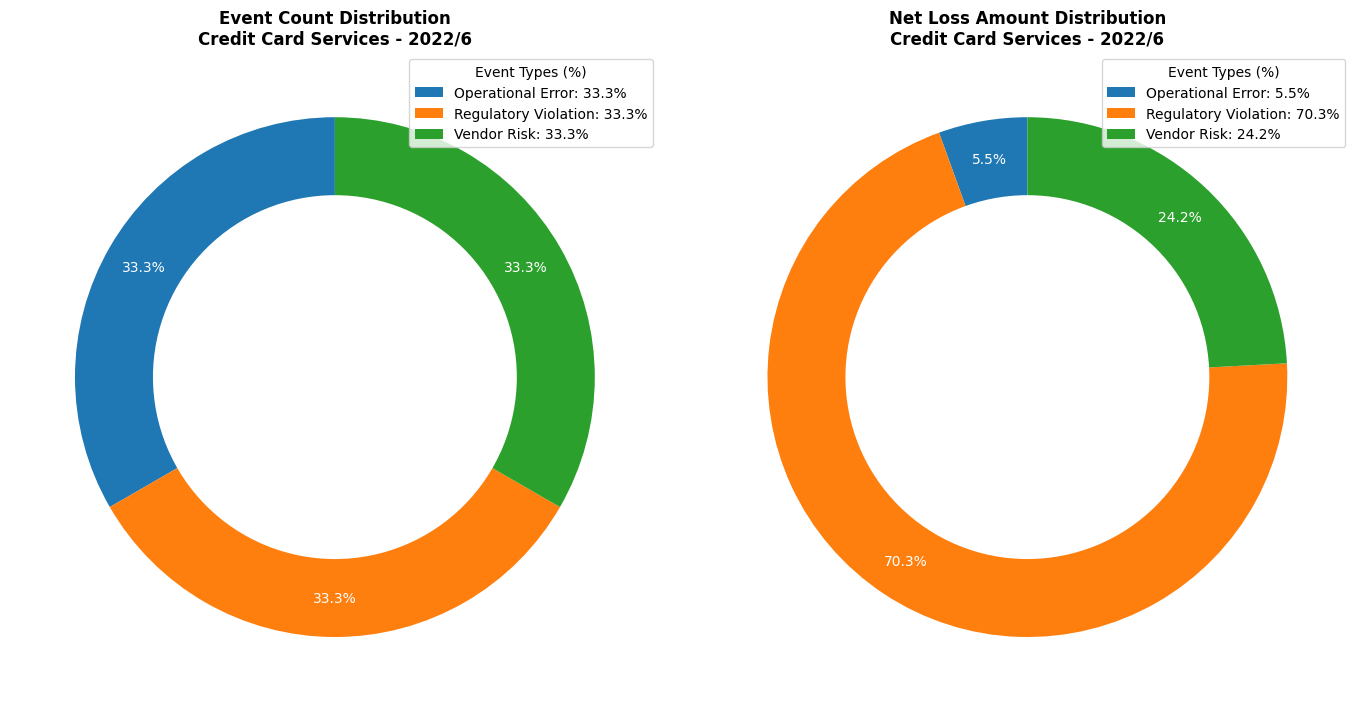

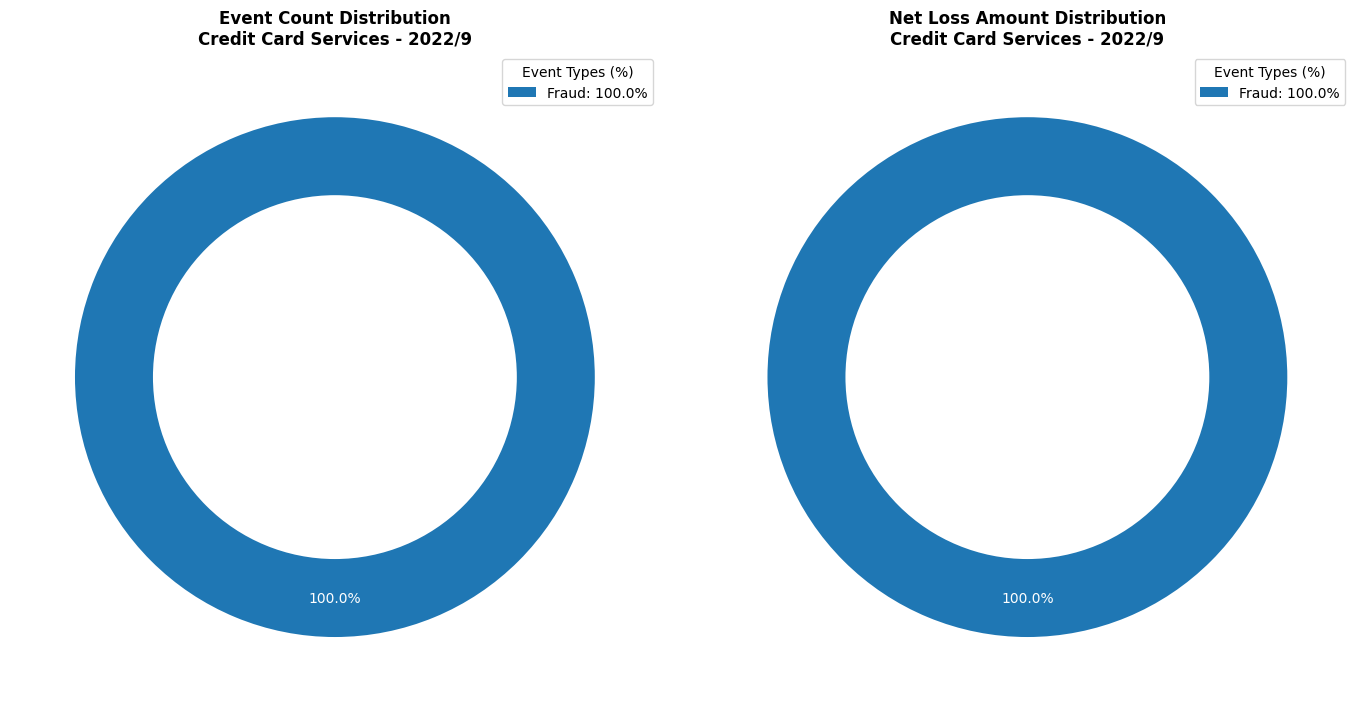

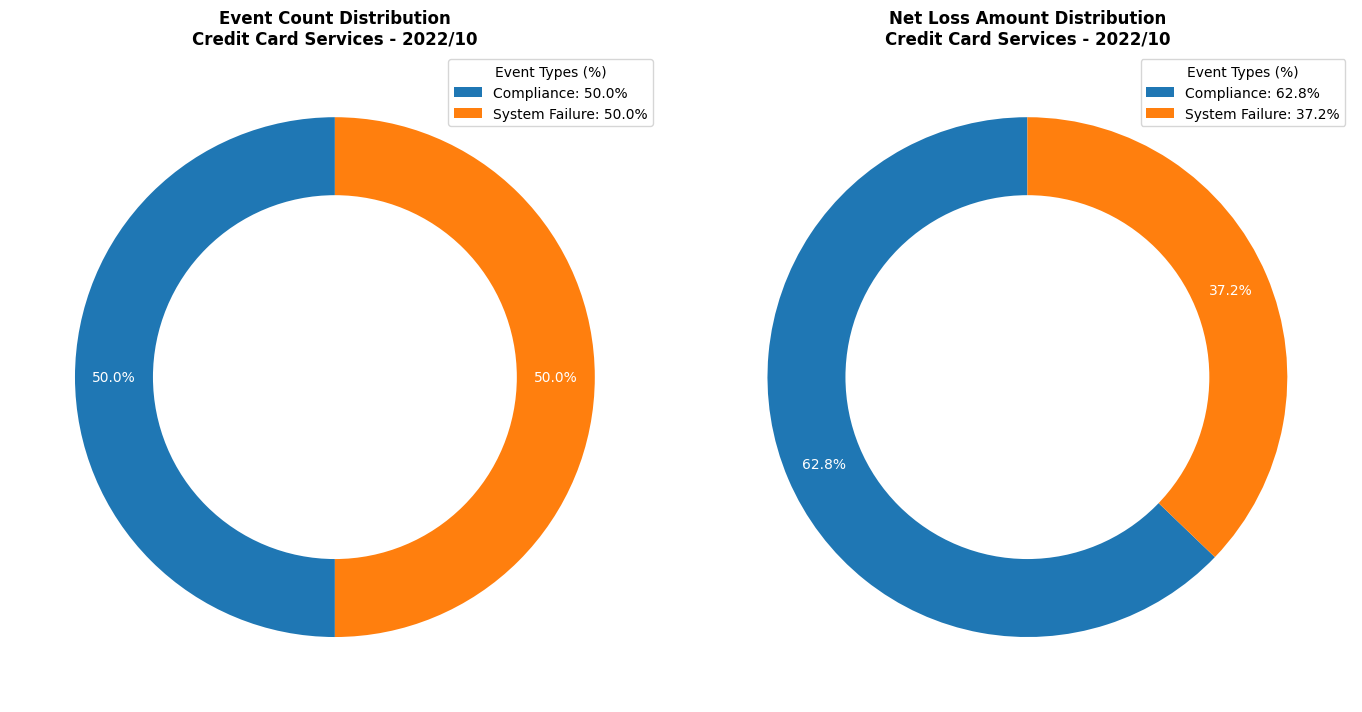

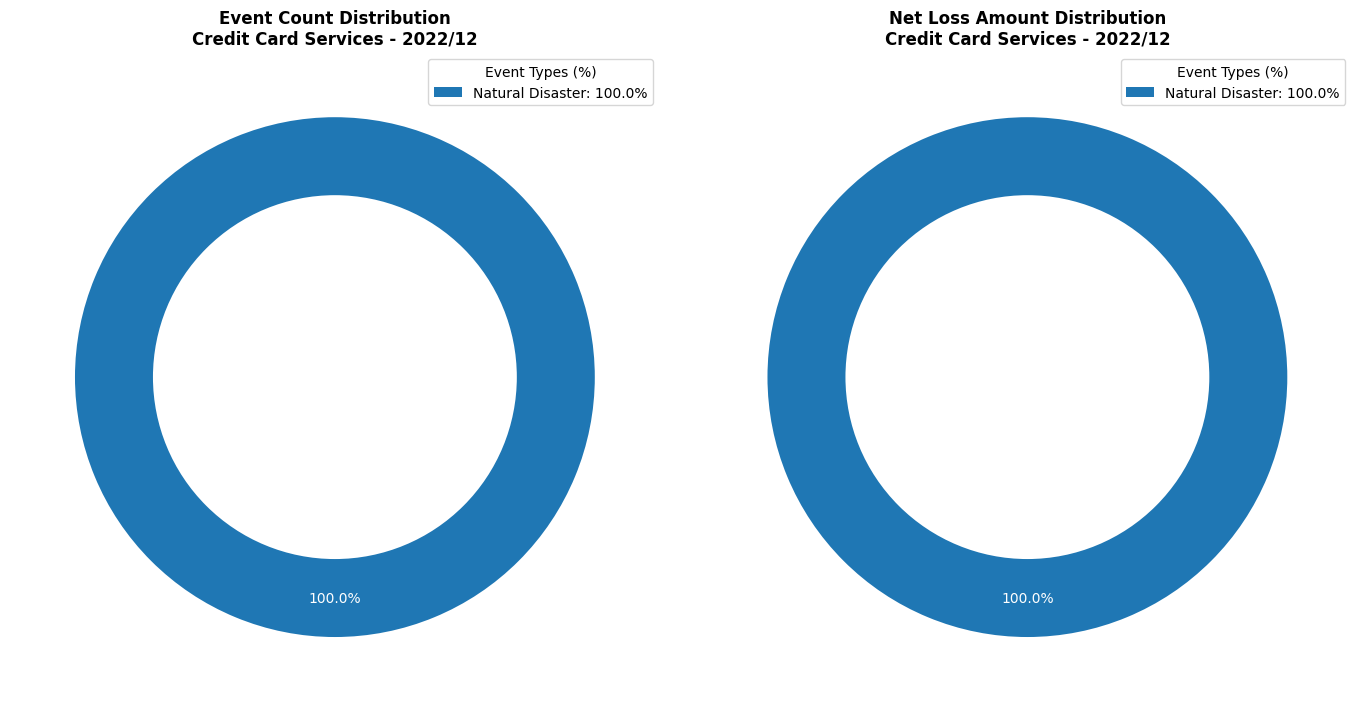

In [ ]:
#only percetage donut cgart legend busines --> event typoe for 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 1000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Add Year and Month columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter negative Net Loss Amount values
df = df[df['Net Loss Amount'] > 0]

# Group data by Business Line, Year, Month, and Event Type
grouped = df.groupby(['Business Line', 'Year', 'Month', 'Event Type']).agg({
    'Unique Event ID': 'count',  # Event Count
    'Net Loss Amount': 'sum'    # Net Loss Amount
}).reset_index()
grouped.rename(columns={'Unique Event ID': 'Event Count'}, inplace=True)

# Iterate through each business line and generate charts
business_lines = grouped['Business Line'].unique()
for business_line in business_lines:
    business_line_data = grouped[grouped['Business Line'] == business_line]
    
    # Iterate through each year
    years = business_line_data['Year'].unique()
    for year in years:
        year_data = business_line_data[business_line_data['Year'] == year]
        
        # Iterate through each month
        months = year_data['Month'].unique()
        for month in months:
            month_data = year_data[year_data['Month'] == month]

            # Prepare data for charts
            labels = month_data['Event Type']
            sizes_event = month_data['Event Count']
            sizes_loss = month_data['Net Loss Amount']

            if len(labels) == 0:
                continue  # Skip empty data

            # Create subplots for Event Count and Net Loss Amount
            fig, axes = plt.subplots(1, 2, figsize=(14, 7))

            # Prepare legend labels with percentages for Event Count
            total_event = sizes_event.sum()
            legend_event = [
                f"{label}: {value / total_event:.1%}"
                for label, value in zip(labels, sizes_event)
            ]

            # Donut chart for Event Count
            wedges_event, texts_event, autotexts_event = axes[0].pie(
                sizes_event, labels=None, autopct=lambda pct: f"{pct:.1f}%",
                startangle=90, pctdistance=0.85, textprops=dict(color="w")
            )
            center_circle_event = plt.Circle((0, 0), 0.70, fc='white')
            axes[0].add_artist(center_circle_event)
            axes[0].set_title(f"Event Count Distribution\n{business_line} - {year}/{month}", fontsize=12, fontweight='bold')

            # Add legend for Event Count
            axes[0].legend(wedges_event, legend_event, title="Event Types (%)", loc="best", fontsize=10)

            # Prepare legend labels with percentages for Net Loss Amount
            total_loss = sizes_loss.sum()
            legend_loss = [
                f"{label}: {value / total_loss:.1%}"
                for label, value in zip(labels, sizes_loss)
            ]

            # Donut chart for Net Loss Amount
            wedges_loss, texts_loss, autotexts_loss = axes[1].pie(
                sizes_loss, labels=None, autopct=lambda pct: f"{pct:.1f}%",
                startangle=90, pctdistance=0.85, textprops=dict(color="w")
            )
            center_circle_loss = plt.Circle((0, 0), 0.70, fc='white')
            axes[1].add_artist(center_circle_loss)
            axes[1].set_title(f"Net Loss Amount Distribution\n{business_line} - {year}/{month}", fontsize=12, fontweight='bold')

            # Add legend for Net Loss Amount
            axes[1].legend(wedges_loss, legend_loss, title="Event Types (%)", loc="best", fontsize=10)

            # Adjust layout and display
            plt.tight_layout()
            plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_28620\1191329928.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_line_data['Event Count Percentage'] = business_line_data['Event Count'] / total_event_count * 100
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_28620\1191329928.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_line_data['Net Loss Amount Percentage'] = business_line_data['Net Loss Amount (Adjusted)'] / total_net_loss * 100


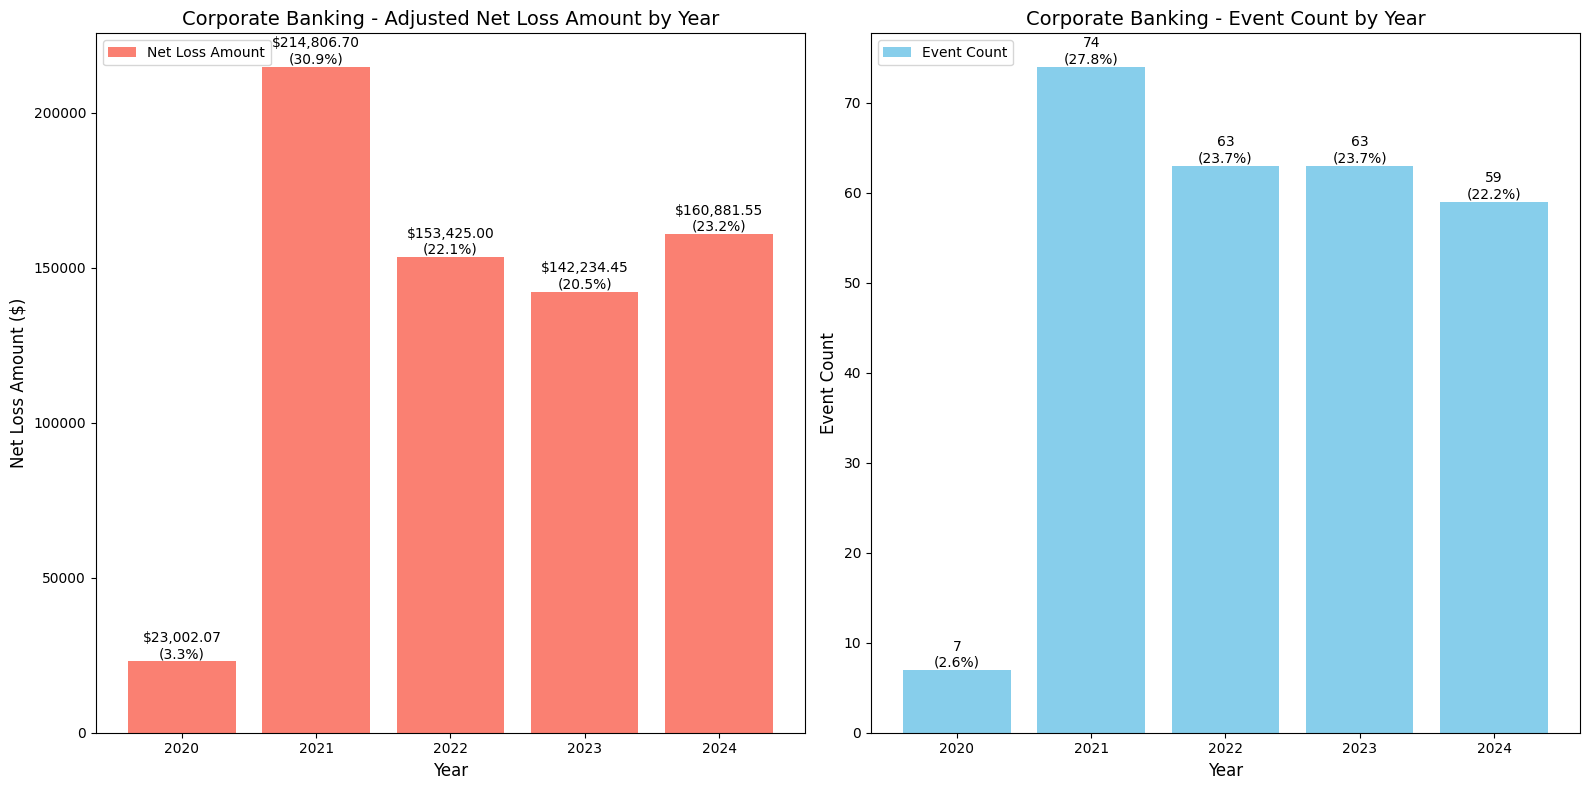

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_28620\1191329928.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_line_data['Event Count Percentage'] = business_line_data['Event Count'] / total_event_count * 100
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_28620\1191329928.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_line_data['Net Loss Amount Percentage'] = business_line_data['Net Loss Amount (Adjusted)'] / total_net_loss * 100


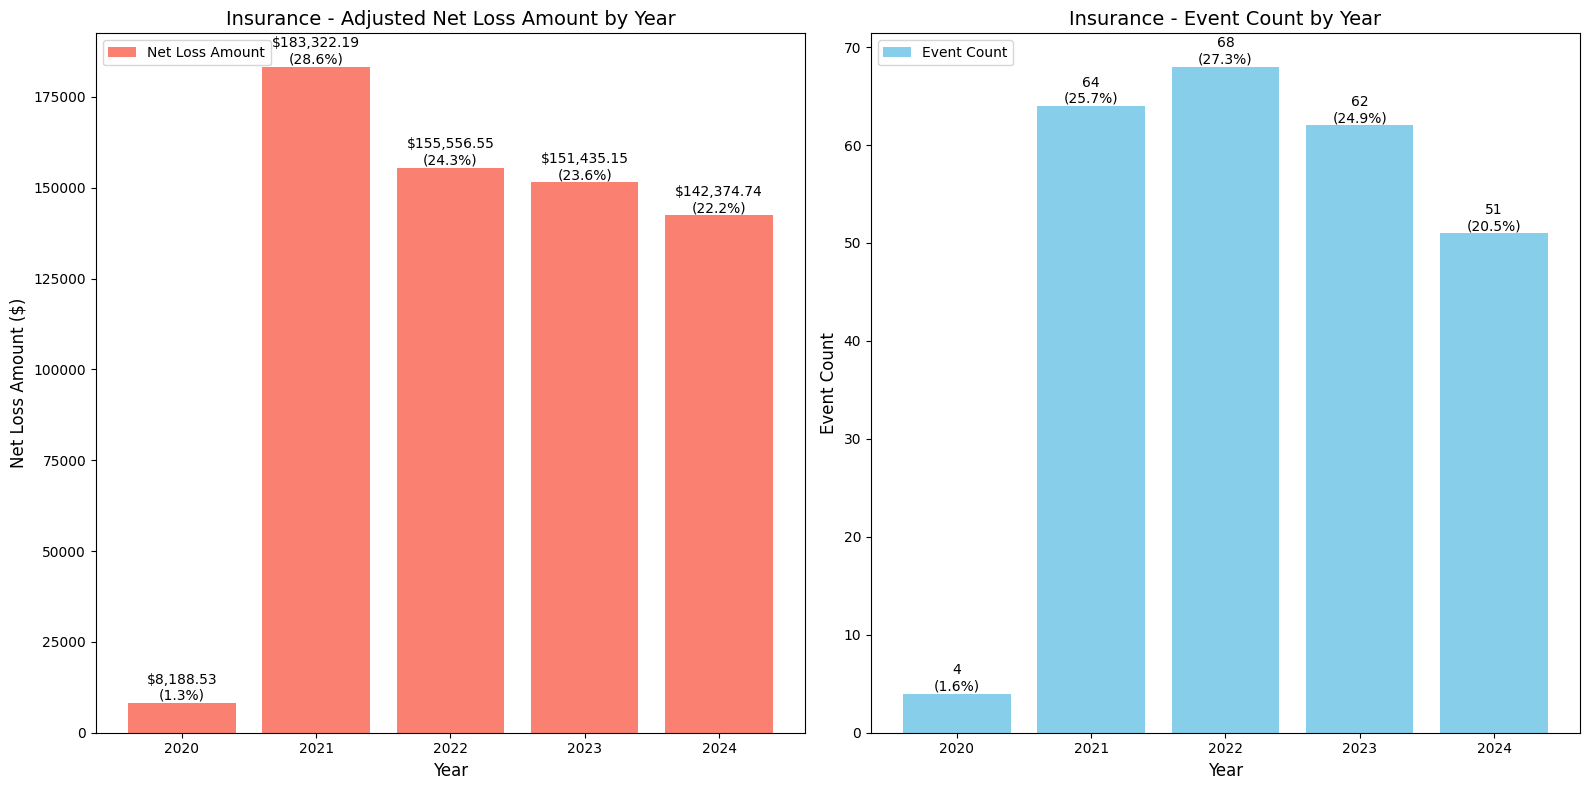

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_28620\1191329928.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_line_data['Event Count Percentage'] = business_line_data['Event Count'] / total_event_count * 100
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_28620\1191329928.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_line_data['Net Loss Amount Percentage'] = business_line_data['Net Loss Amount (Adjusted)'] / total_net_loss * 100


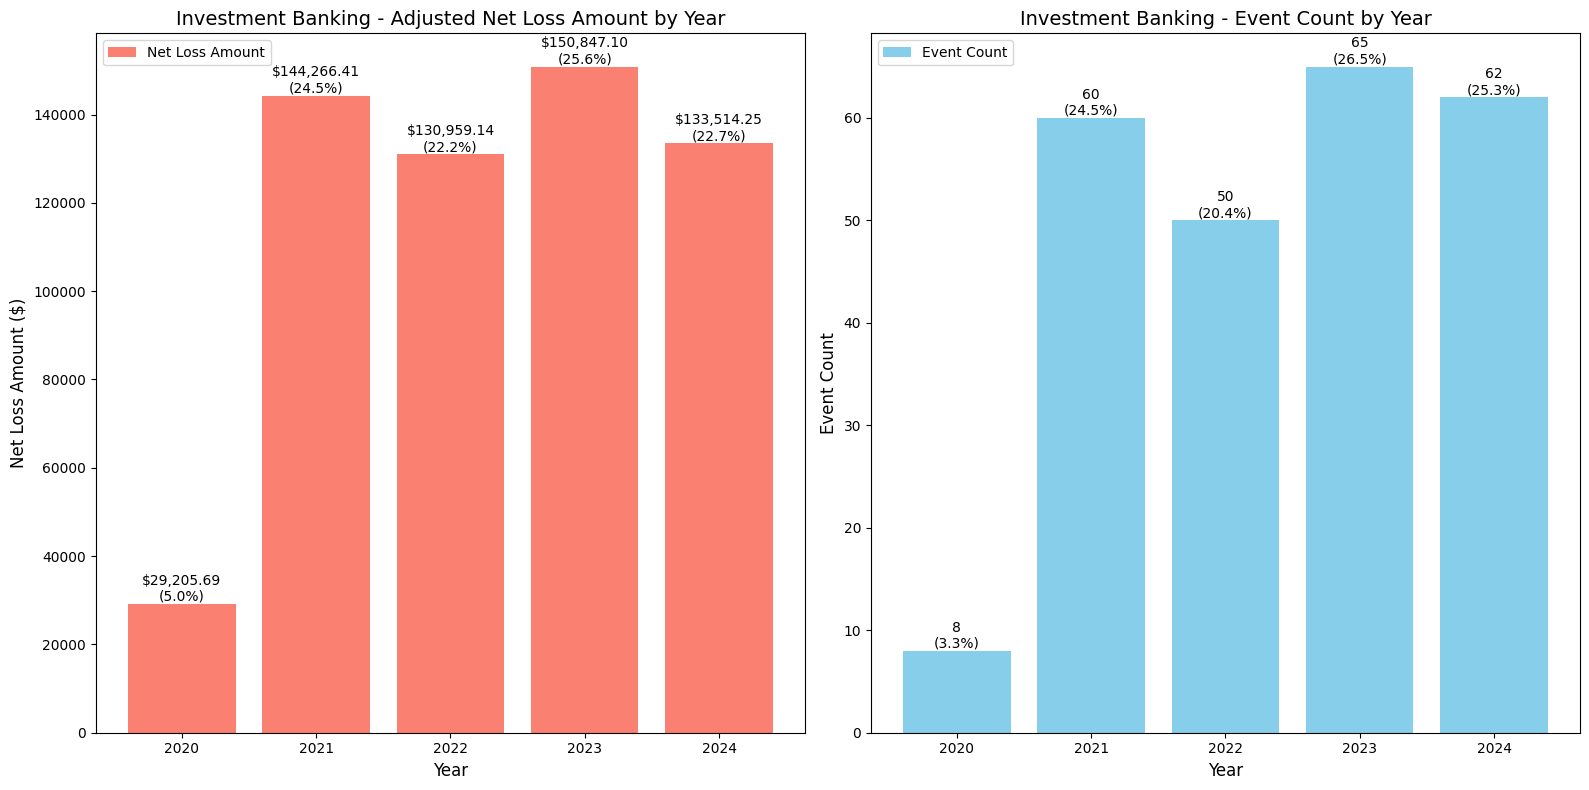

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_28620\1191329928.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_line_data['Event Count Percentage'] = business_line_data['Event Count'] / total_event_count * 100
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_28620\1191329928.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_line_data['Net Loss Amount Percentage'] = business_line_data['Net Loss Amount (Adjusted)'] / total_net_loss * 100


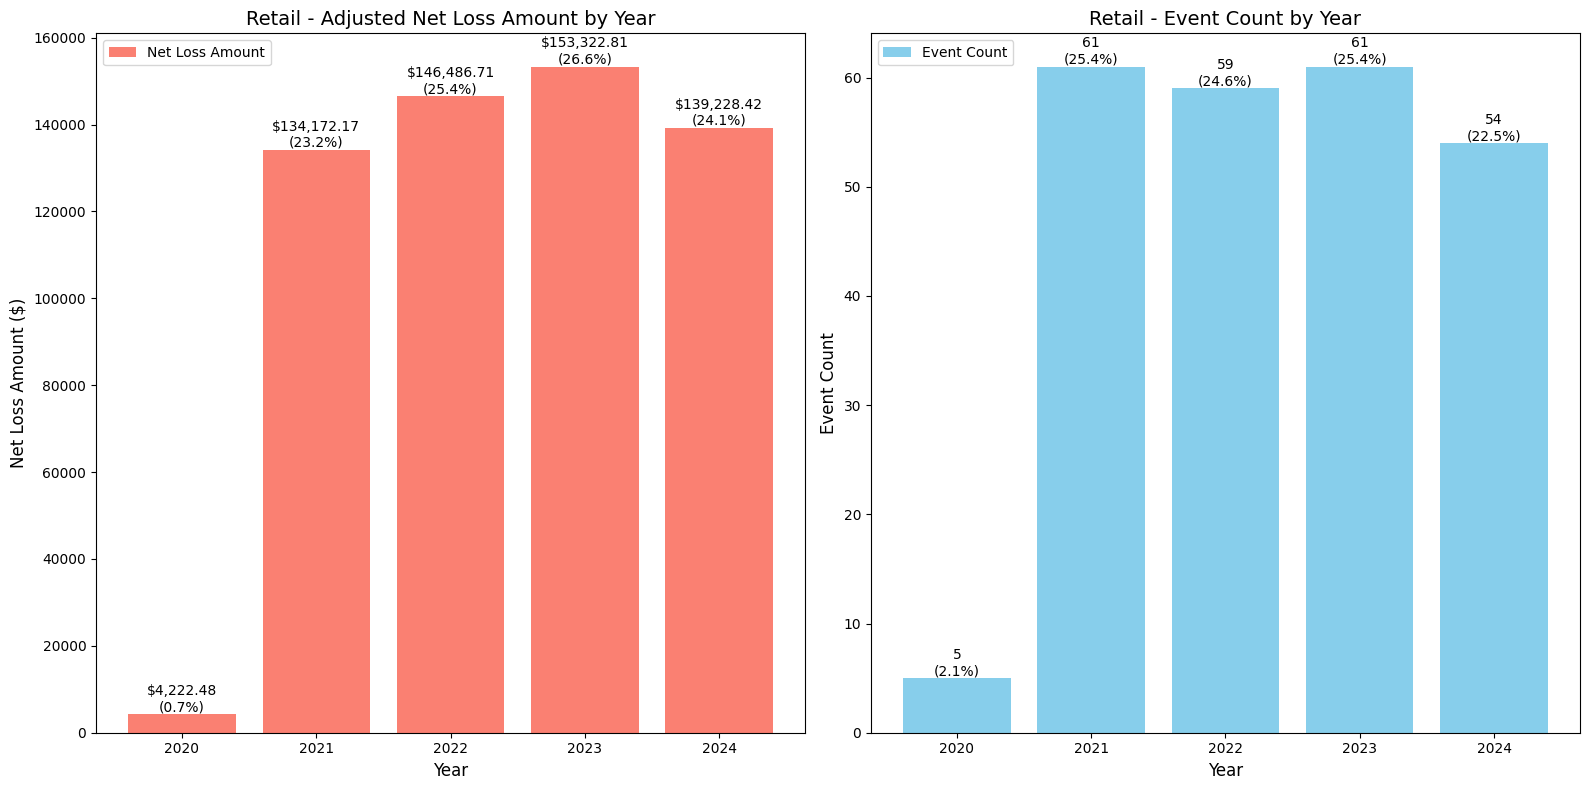

In [2]:
#yearly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 1000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

business_lines = ["Retail", "Corporate Banking", "Investment Banking", "Insurance"]
event_types = ["Fraud", "System Failure", "Theft", "Compliance"]

# Generate synthetic data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Net Loss Amount": np.random.uniform(-10000, 10000, num_records)
}
df = pd.DataFrame(data)
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Handle negative Net Loss Amount
df['Net Loss Amount (Adjusted)'] = df['Net Loss Amount'].apply(lambda x: max(x, 0))  # Replace negative losses with 0

# Group by Business Line and Year with adjusted losses
grouped = df.groupby(['Business Line', 'Year']).agg({
    'Unique Event ID': 'count',  # Event Count
    'Net Loss Amount (Adjusted)': 'sum'  # Adjusted Net Loss Amount
}).reset_index()

# Rename columns for clarity
grouped.rename(columns={'Unique Event ID': 'Event Count'}, inplace=True)

# Iterate through each business line and generate bar charts
business_lines = grouped['Business Line'].unique()

for business_line in business_lines:
    business_line_data = grouped[grouped['Business Line'] == business_line]
    
    # Calculate total counts and losses for percentage calculation
    total_event_count = business_line_data['Event Count'].sum()
    total_net_loss = business_line_data['Net Loss Amount (Adjusted)'].sum()
    
    # Calculate percentages
    business_line_data['Event Count Percentage'] = business_line_data['Event Count'] / total_event_count * 100
    business_line_data['Net Loss Amount Percentage'] = business_line_data['Net Loss Amount (Adjusted)'] / total_net_loss * 100
    
    # Create subplots for Adjusted Net Loss Amount and Event Count
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Bar chart for Adjusted Net Loss Amount
    axes[0].bar(business_line_data['Year'], business_line_data['Net Loss Amount (Adjusted)'], color='salmon', label='Net Loss Amount')
    for i, value in enumerate(business_line_data['Net Loss Amount (Adjusted)']):
        axes[0].text(
            business_line_data['Year'].iloc[i], value, 
            f'${value:,.2f}\n({business_line_data["Net Loss Amount Percentage"].iloc[i]:.1f}%)', 
            ha='center', va='bottom'
        )
    axes[0].set_title(f"{business_line} - Adjusted Net Loss Amount by Year", fontsize=14)
    axes[0].set_xlabel('Year', fontsize=12)
    axes[0].set_ylabel('Net Loss Amount ($)', fontsize=12)
    axes[0].legend(loc='upper left', fontsize=10)

    # Bar chart for Event Count
    axes[1].bar(business_line_data['Year'], business_line_data['Event Count'], color='skyblue', label='Event Count')
    for i, value in enumerate(business_line_data['Event Count']):
        axes[1].text(
            business_line_data['Year'].iloc[i], value, 
            f'{value}\n({business_line_data["Event Count Percentage"].iloc[i]:.1f}%)', 
            ha='center', va='bottom'
        )
    axes[1].set_title(f"{business_line} - Event Count by Year", fontsize=14)
    axes[1].set_xlabel('Year', fontsize=12)
    axes[1].set_ylabel('Event Count', fontsize=12)
    axes[1].legend(loc='upper left', fontsize=10)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_28620\3521293008.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


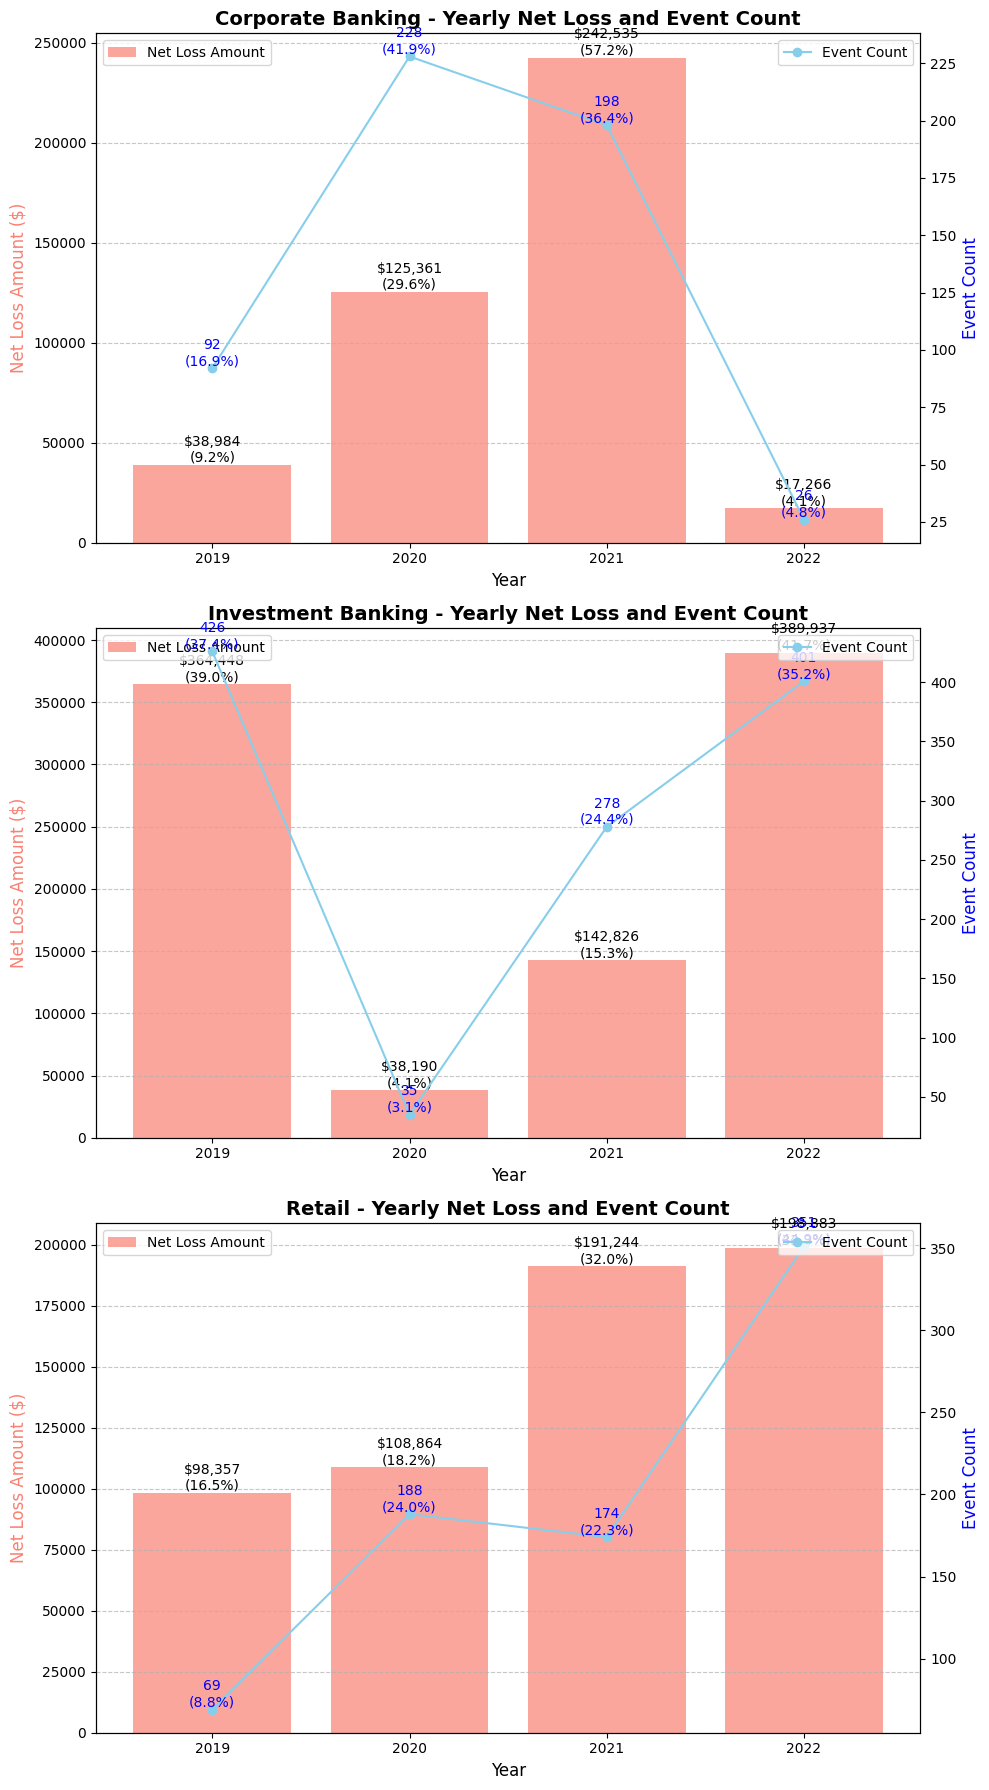

In [3]:
#yearly simngle grapgh both 
#in single grapgh both value and percentage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data generation (as per your dataset structure)
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(['Retail', 'Corporate Banking', 'Investment Banking'], size=48),
    'Event Count': np.random.randint(1, 100, size=48),
    'Net Loss Amount': np.random.randint(-10000, 100000, size=48)  # Includes negative values
}
df = pd.DataFrame(data)

# Adjust negative Net Loss Amounts to zero (or use absolute values based on your need)
df['Net Loss Amount'] = df['Net Loss Amount'].clip(lower=0)

# Extract year and group by year and business line
df['Year'] = df['Date'].dt.year
yearly_data = df.groupby(['Business Line', 'Year']).agg({
    'Event Count': 'sum',
    'Net Loss Amount': 'sum'
}).reset_index()

# Calculate percentages for Net Loss and Event Count using transform for alignment
yearly_data['Net Loss Amount Percentage'] = (
    yearly_data['Net Loss Amount'] / yearly_data.groupby('Business Line')['Net Loss Amount'].transform('sum') * 100
)
yearly_data['Event Count Percentage'] = (
    yearly_data['Event Count'] / yearly_data.groupby('Business Line')['Event Count'].transform('sum') * 100
)

# Plotting for each business line
business_lines = yearly_data['Business Line'].unique()
fig, axes = plt.subplots(len(business_lines), 1, figsize=(10, 6 * len(business_lines)))

for idx, business_line in enumerate(business_lines):
    ax = axes[idx]
    ax2 = ax.twinx()

    # Filter data for the current business line
    business_line_data = yearly_data[yearly_data['Business Line'] == business_line]

    # Plot Net Loss Amount (left y-axis)
    ax.bar(
        business_line_data['Year'], 
        business_line_data['Net Loss Amount'], 
        color='salmon', alpha=0.7, label='Net Loss Amount'
    )
    for i, value in enumerate(business_line_data['Net Loss Amount']):
        ax.text(
            business_line_data['Year'].iloc[i], value, 
            f"${value:,.0f}\n({business_line_data['Net Loss Amount Percentage'].iloc[i]:.1f}%)", 
            ha='center', va='bottom', fontsize=10
        )

    # Plot Event Count (right y-axis)
    ax2.plot(
        business_line_data['Year'], 
        business_line_data['Event Count'], 
        marker='o', color='skyblue', label='Event Count'
    )
    for i, value in enumerate(business_line_data['Event Count']):
        ax2.text(
            business_line_data['Year'].iloc[i], value, 
            f"{value}\n({business_line_data['Event Count Percentage'].iloc[i]:.1f}%)", 
            ha='center', va='bottom', fontsize=10, color='blue'
        )

    # Titles and labels
    ax.set_title(f"{business_line} - Yearly Net Loss and Event Count", fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Net Loss Amount ($)', fontsize=12, color='salmon')
    ax2.set_ylabel('Event Count', fontsize=12, color='blue')

    # Fix x-axis to show only years
    ax.set_xticks(business_line_data['Year'])
    ax.set_xticklabels(business_line_data['Year'], fontsize=10)

    # Legends
    ax.legend(loc='upper left', fontsize=10)
    ax2.legend(loc='upper right', fontsize=10)

    # Grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()
